File Counts:
+---------------------------------------------+---------+
| Category                                    |   Count |
+=============================================+=========+
| Total Repositories Scanned                  |     463 |
+---------------------------------------------+---------+
| Total Repositories Skipped                  |      37 |
+---------------------------------------------+---------+
| Total Number of Files Scanned               |    6947 |
+---------------------------------------------+---------+
| Files Accessed                              |    6098 |
+---------------------------------------------+---------+
| Files with No Imports out of Files Accessed |     421 |
+---------------------------------------------+---------+
| Files Not Accessed Due to Errors            |     428 |
+---------------------------------------------+---------+


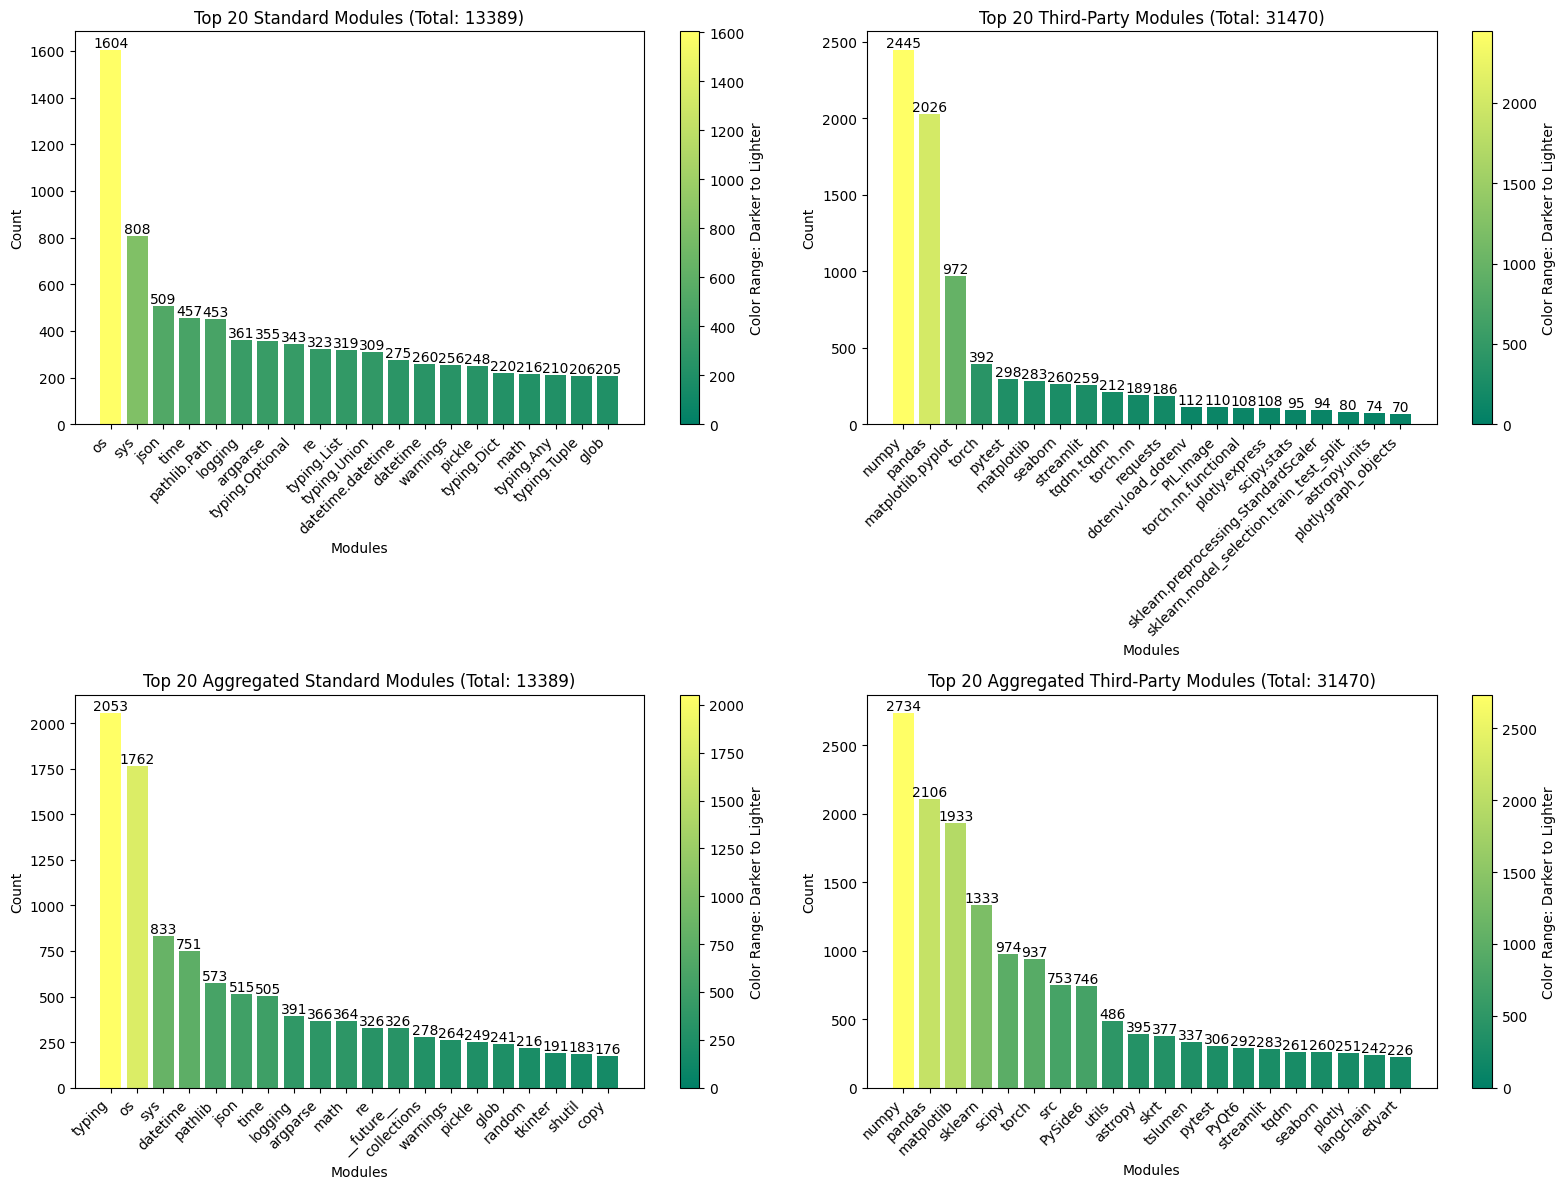

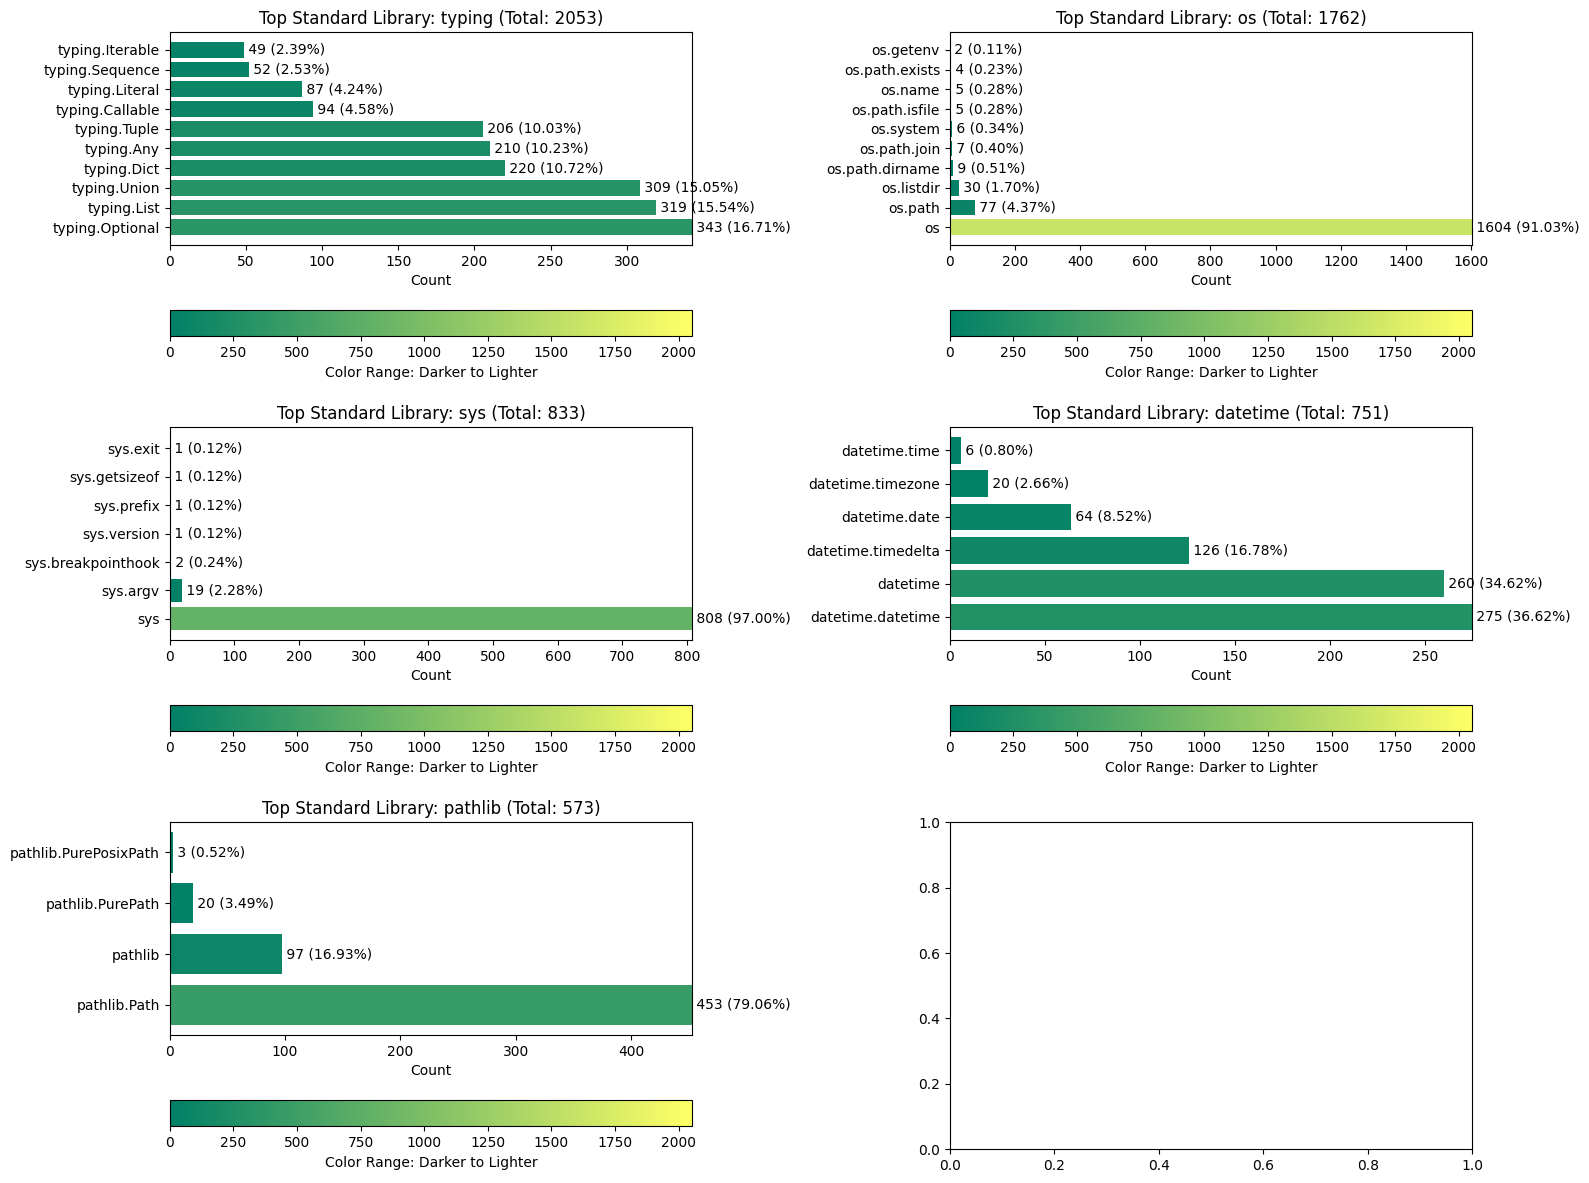

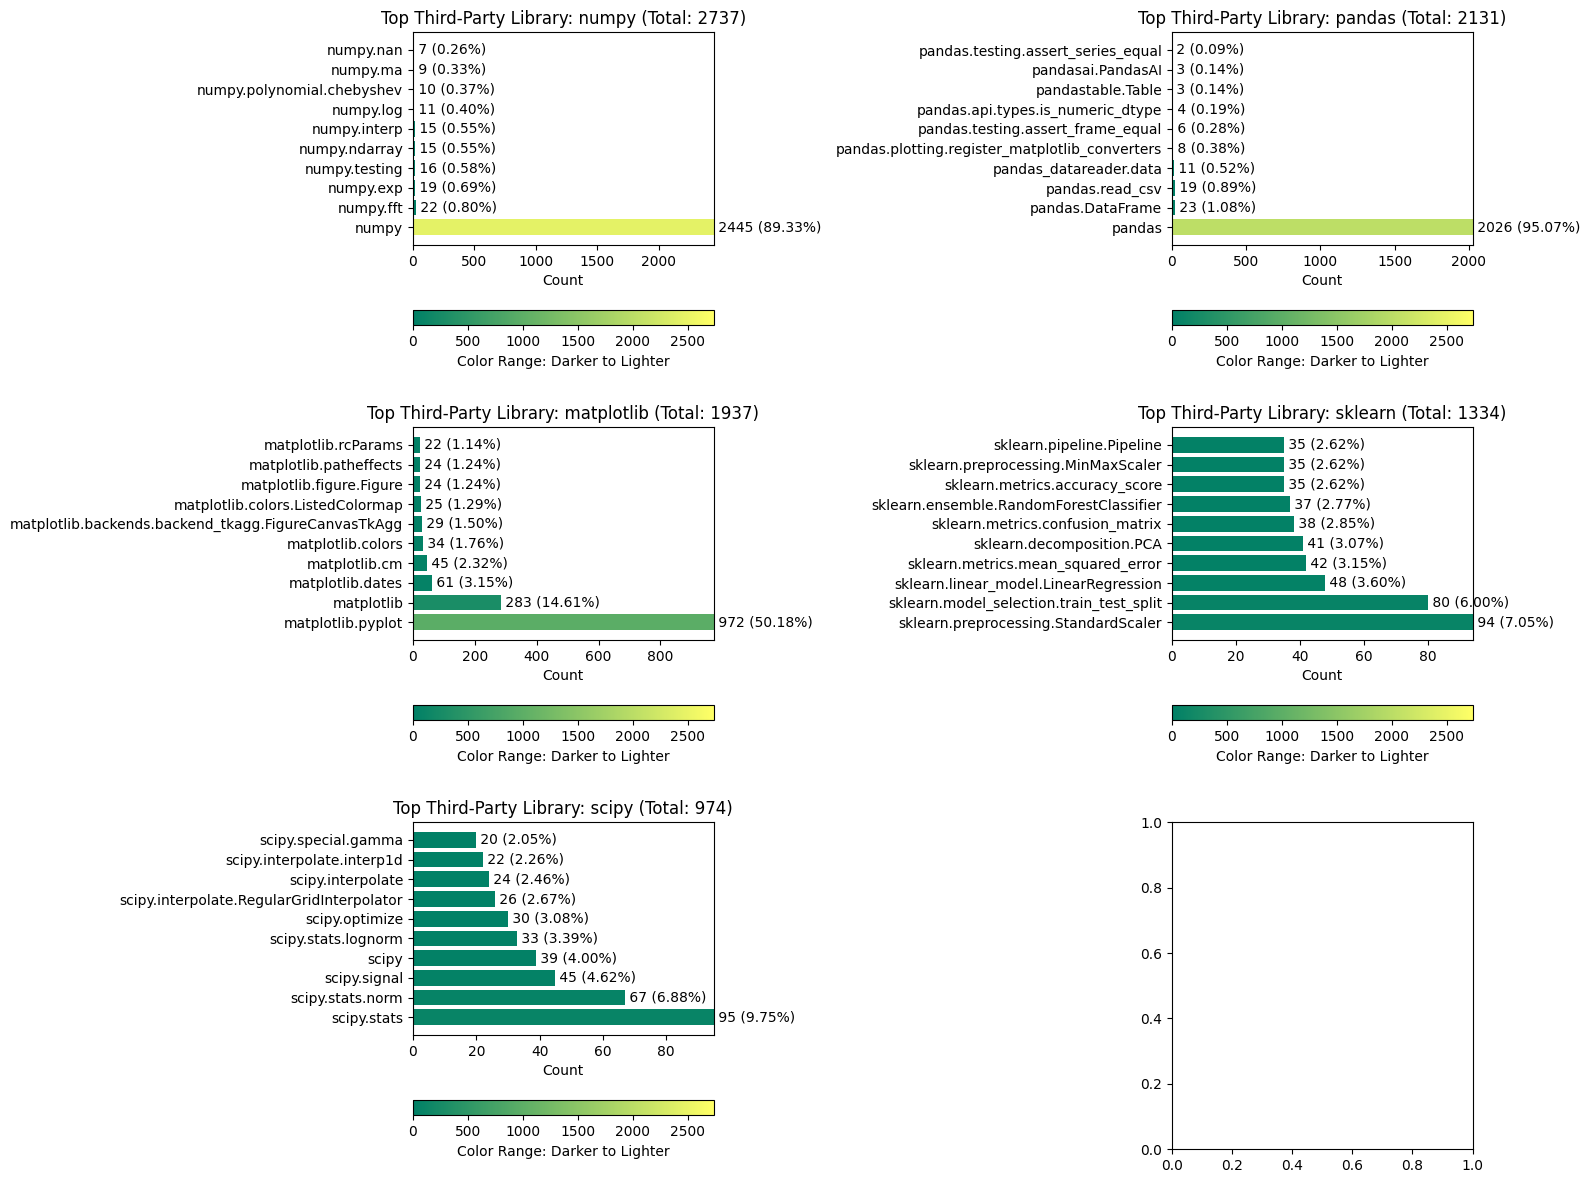

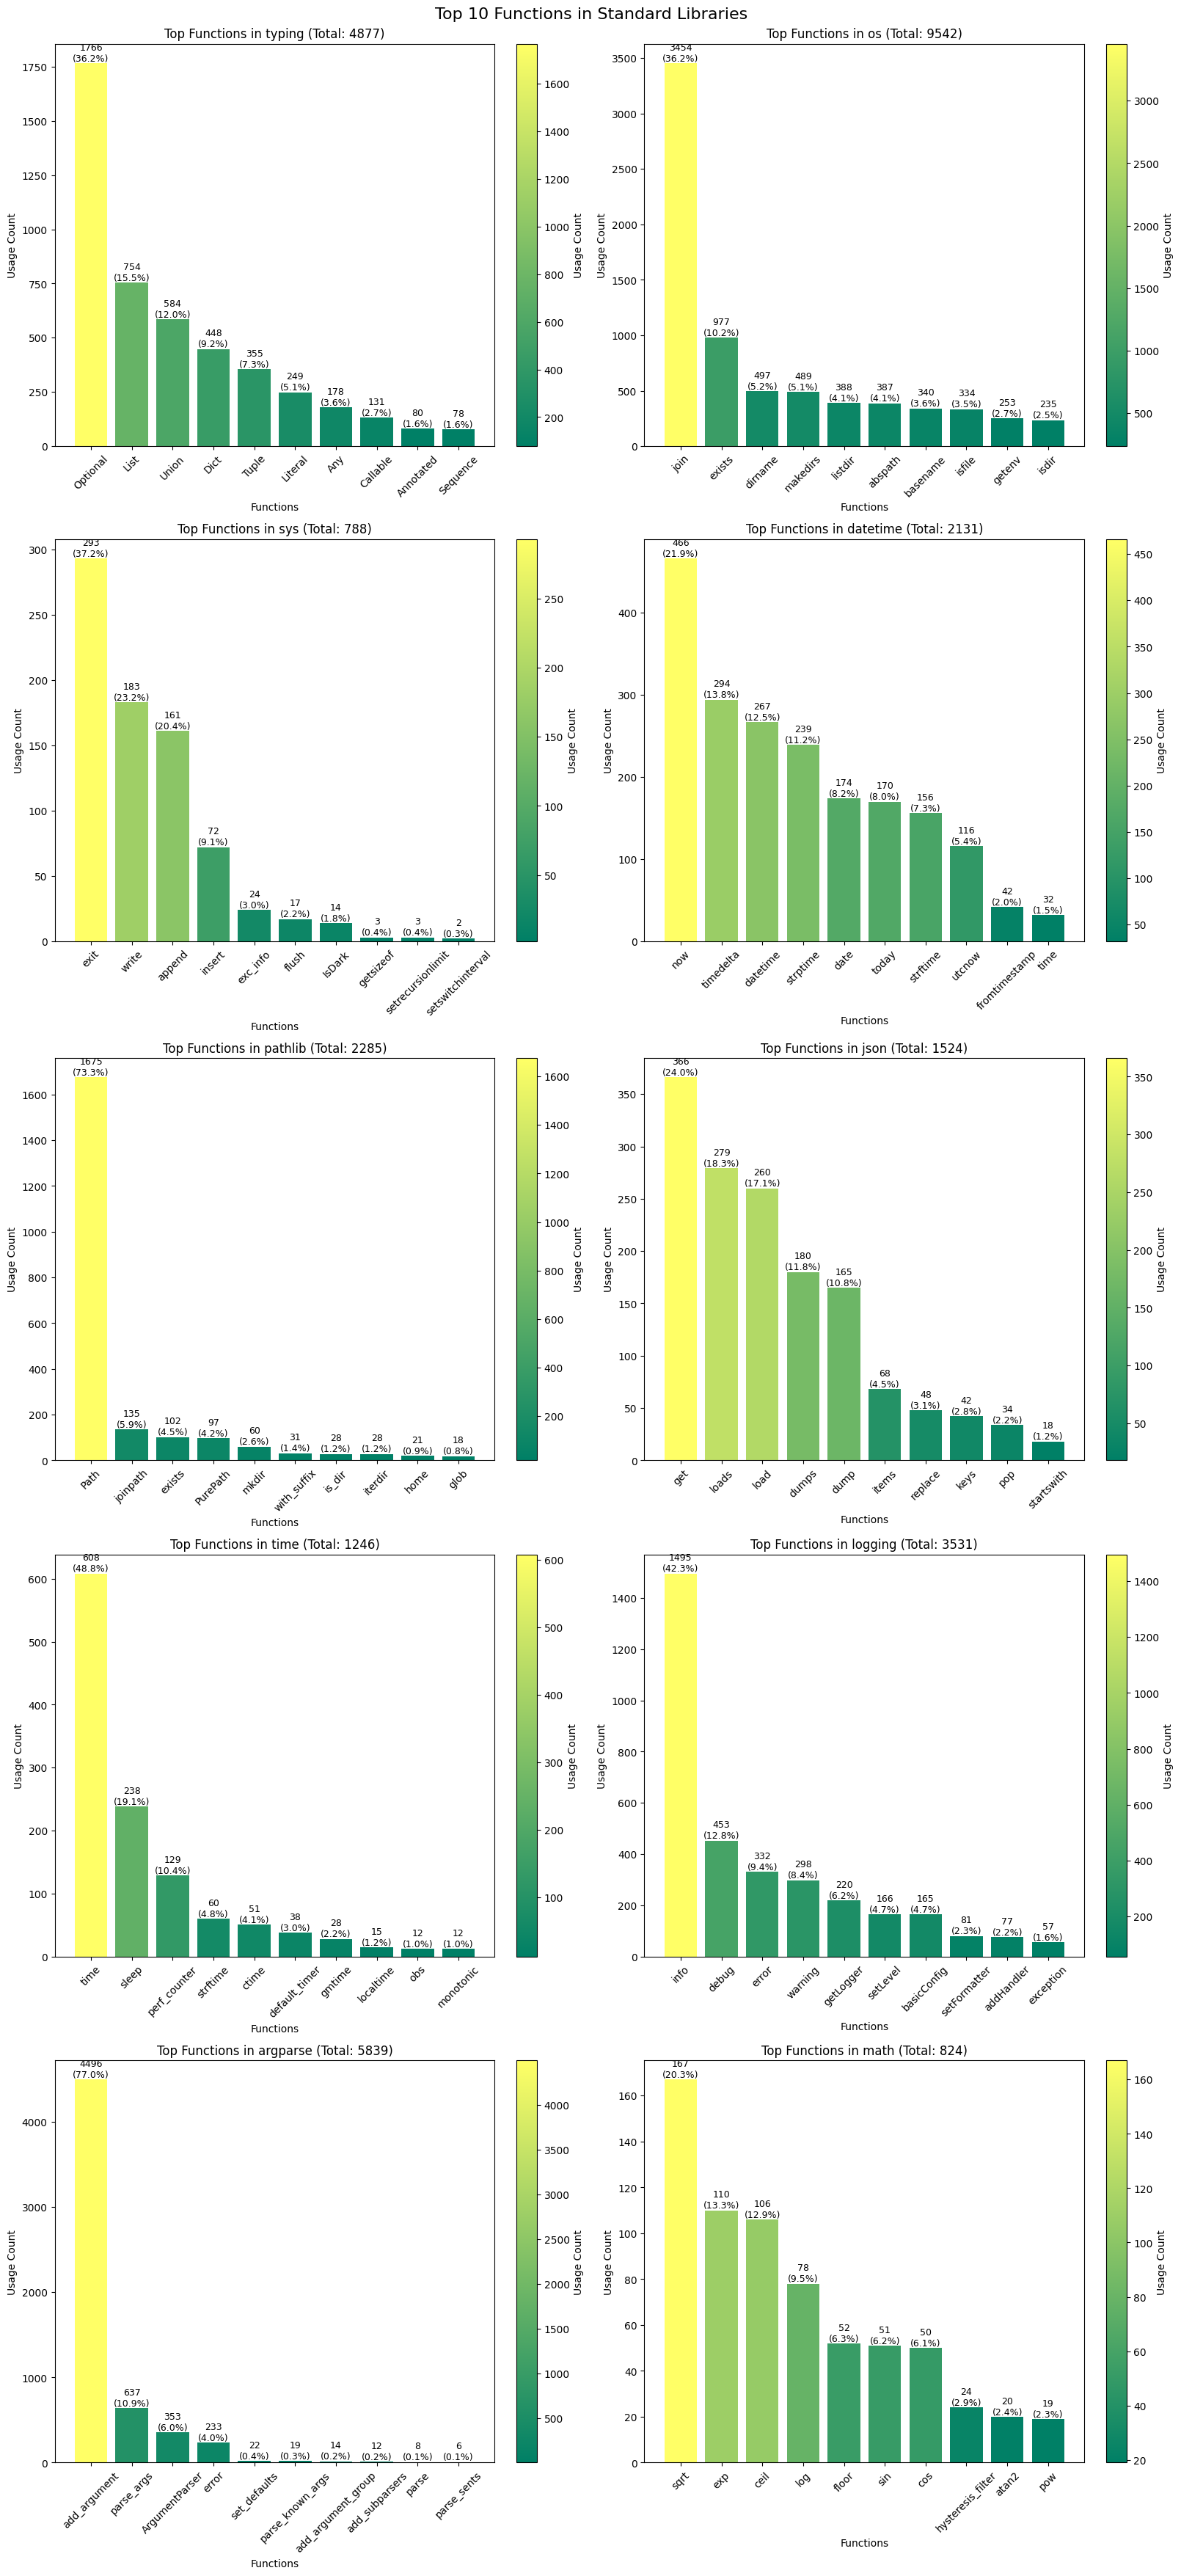

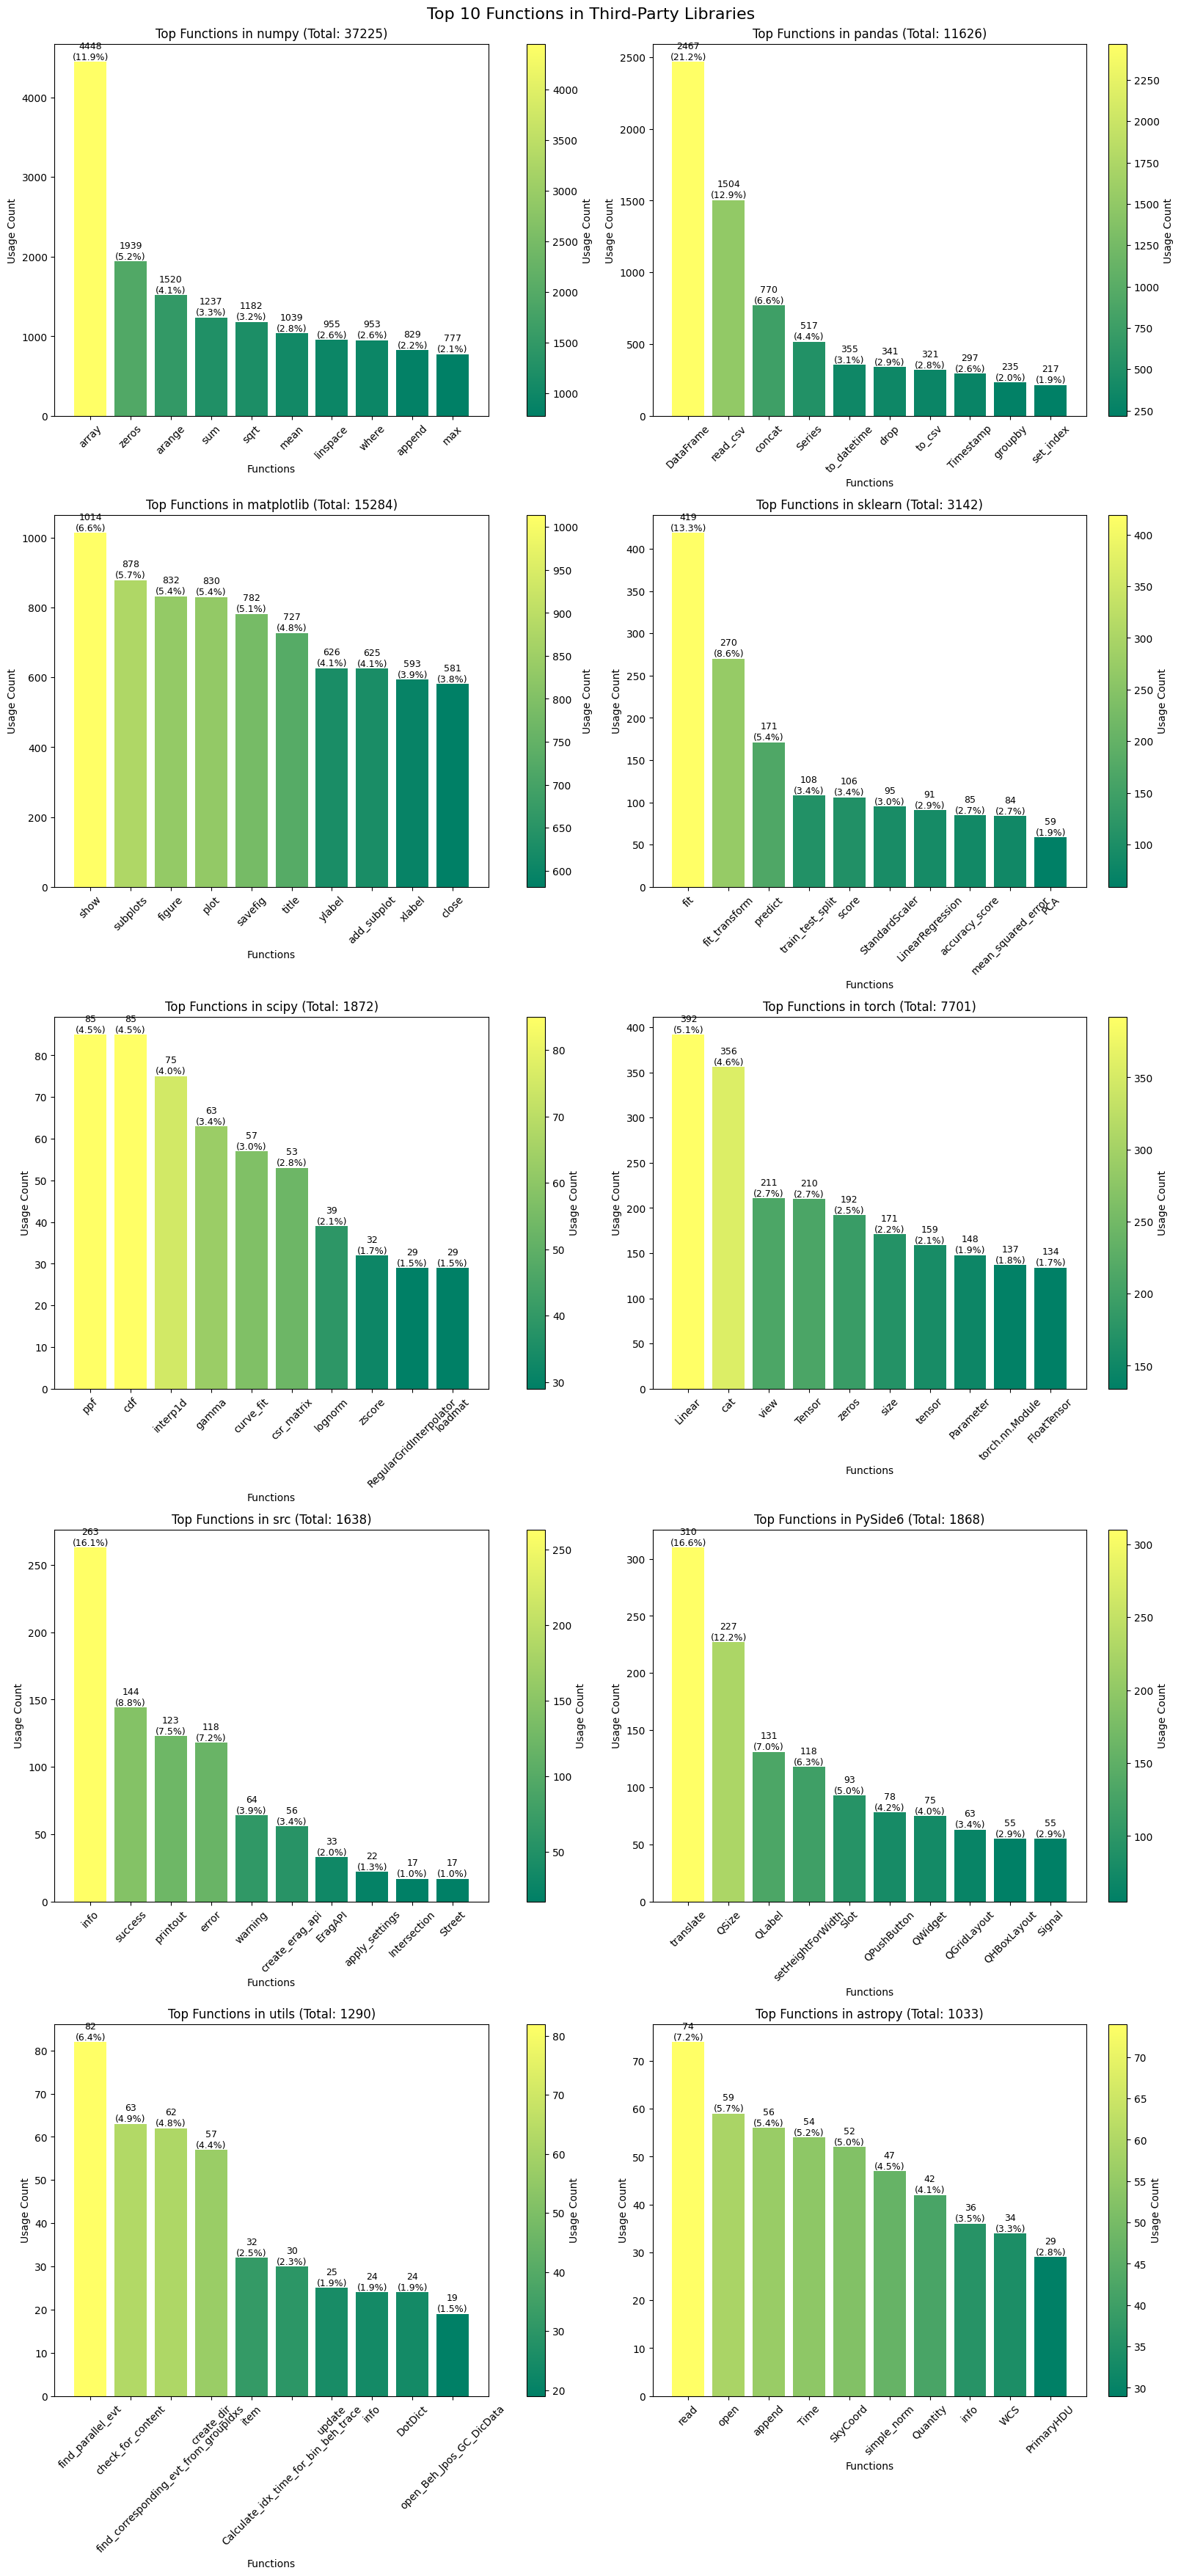

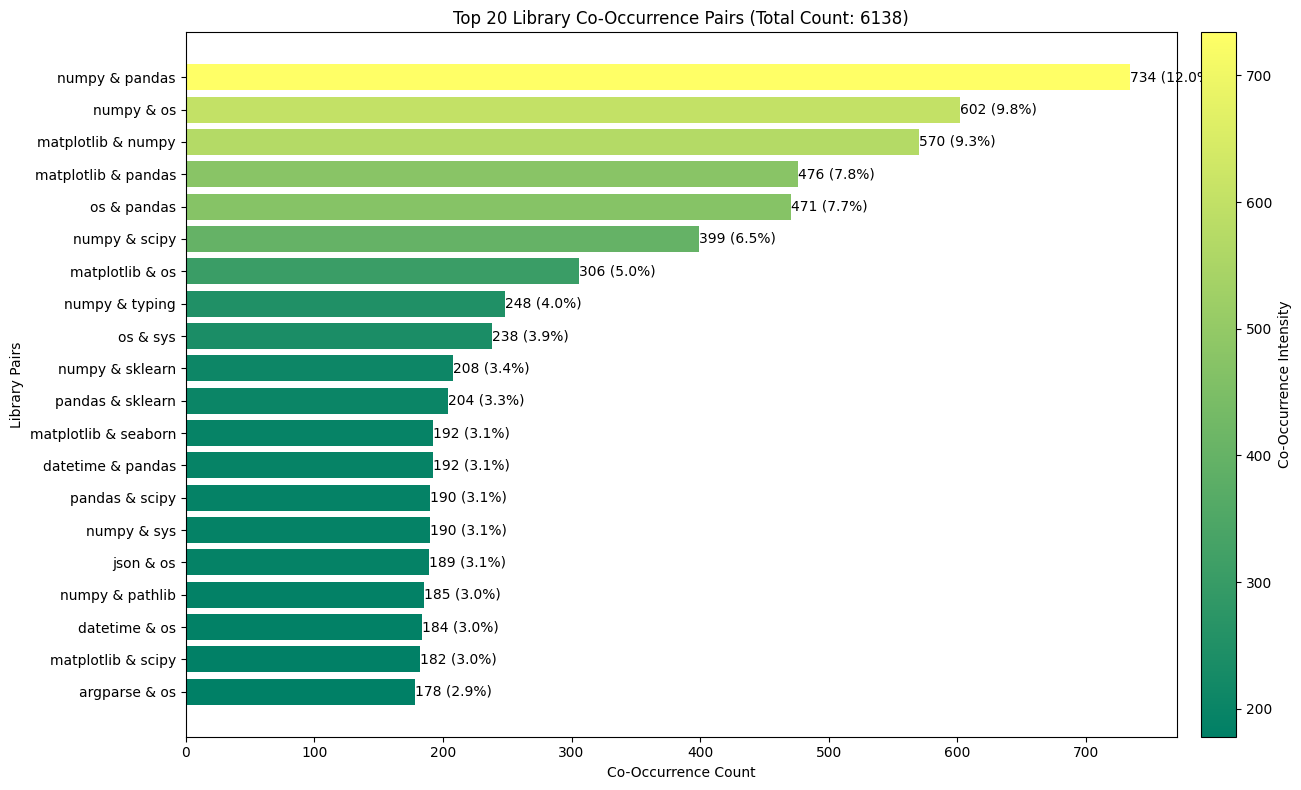

C:\Users\hkp10\AppData\Local\Temp\ipykernel_5852\3268144146.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_aliases_with_libraries['label'] = top_aliases_with_libraries['Alias'] + " (" + top_aliases_with_libraries['Core Imported Library'] + ")"


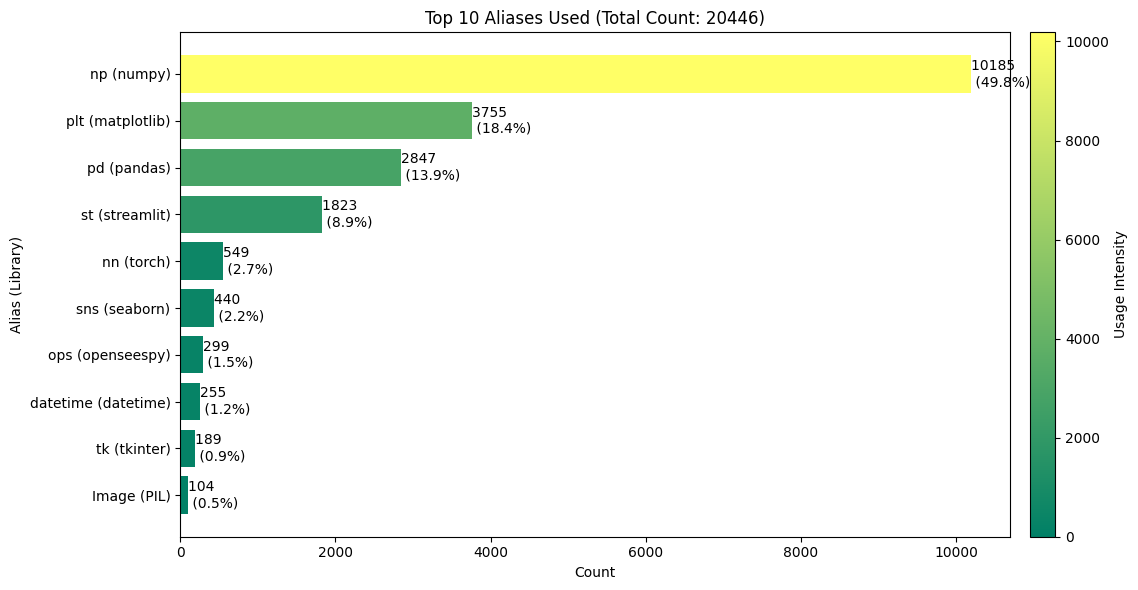

Imports per File:
+--------------------------------------+----------+
| Metric                               |    Count |
+======================================+==========+
| Average Imports per File             | 7.87701  |
+--------------------------------------+----------+
| Average Standard Imports per File    | 2.19564  |
+--------------------------------------+----------+
| Average Third-Party Imports per File | 5.16071  |
+--------------------------------------+----------+
| Average Relative Imports per File    | 0.520663 |
+--------------------------------------+----------+


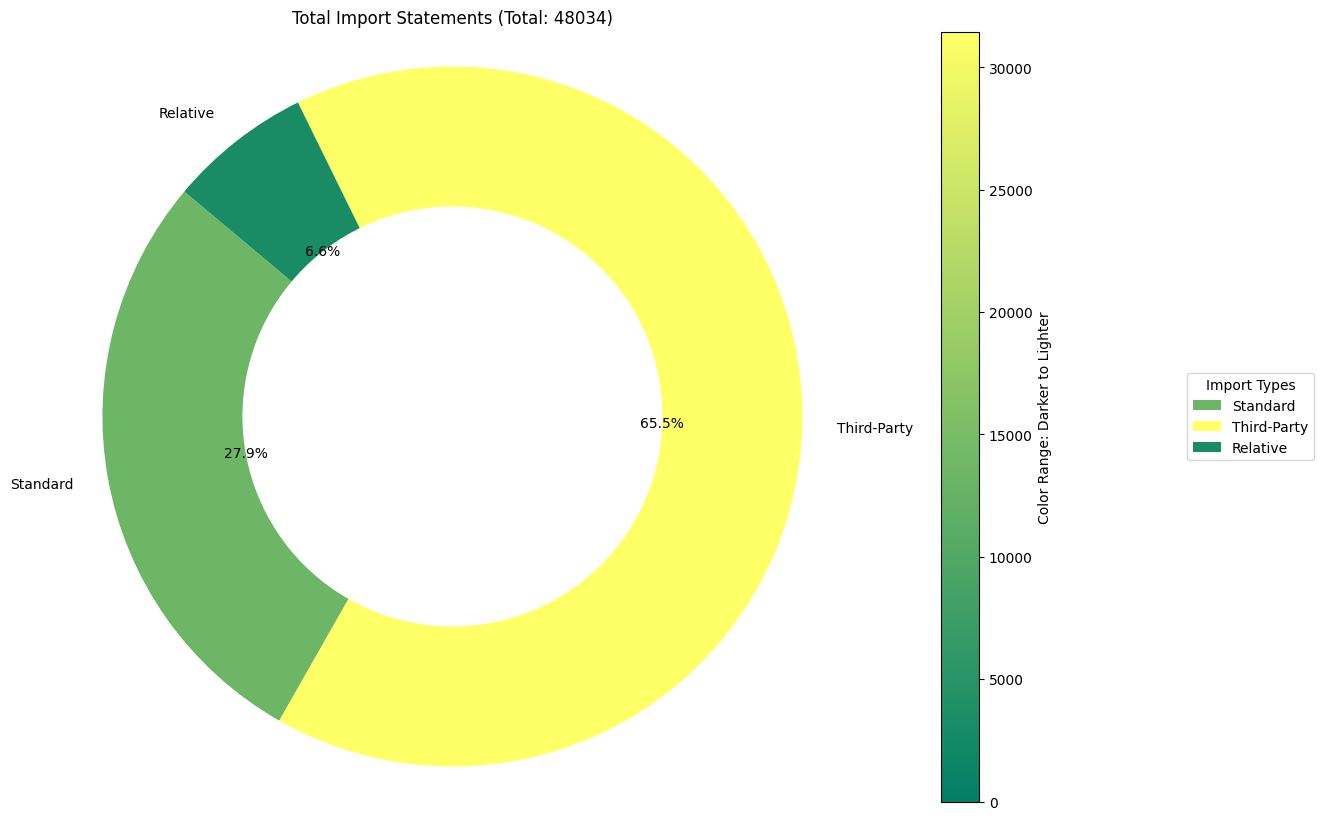

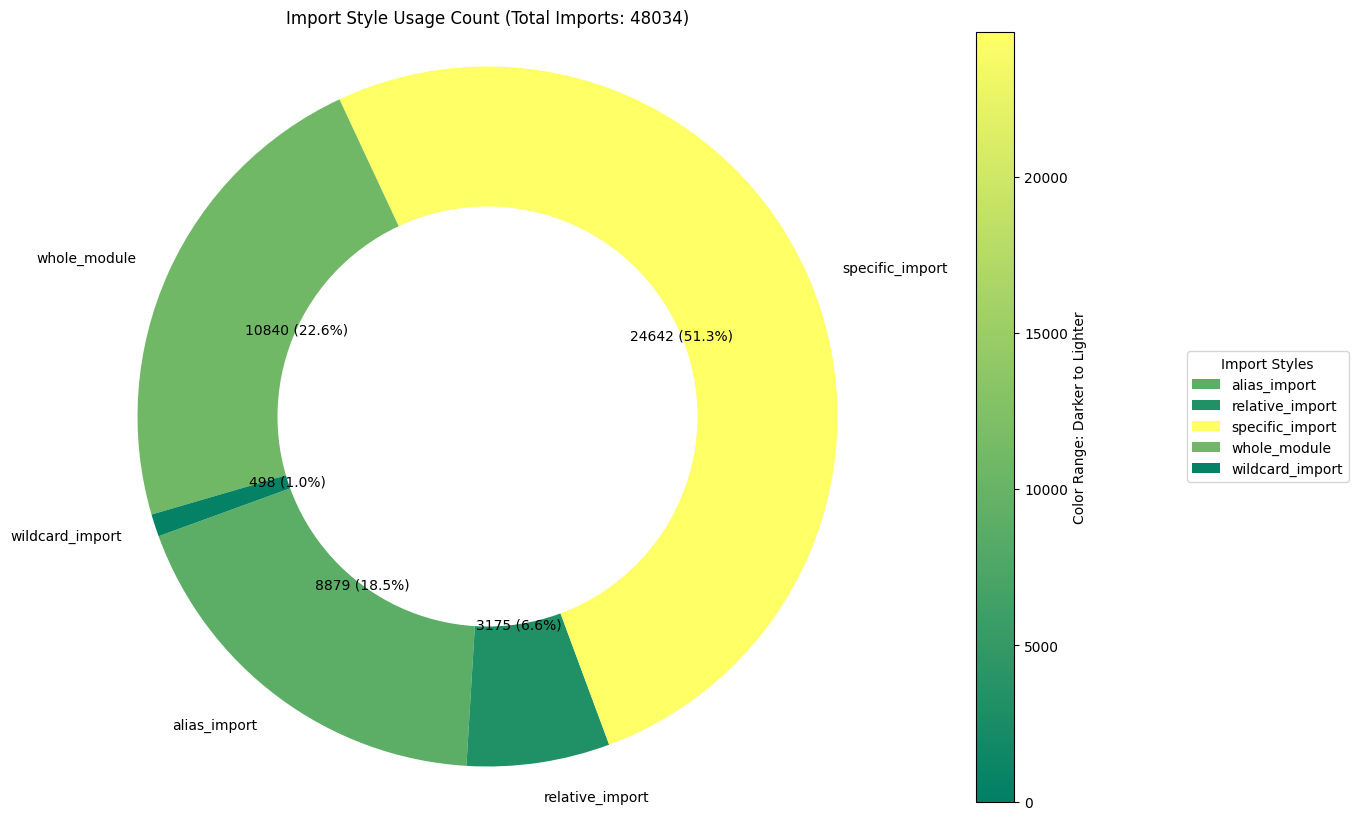

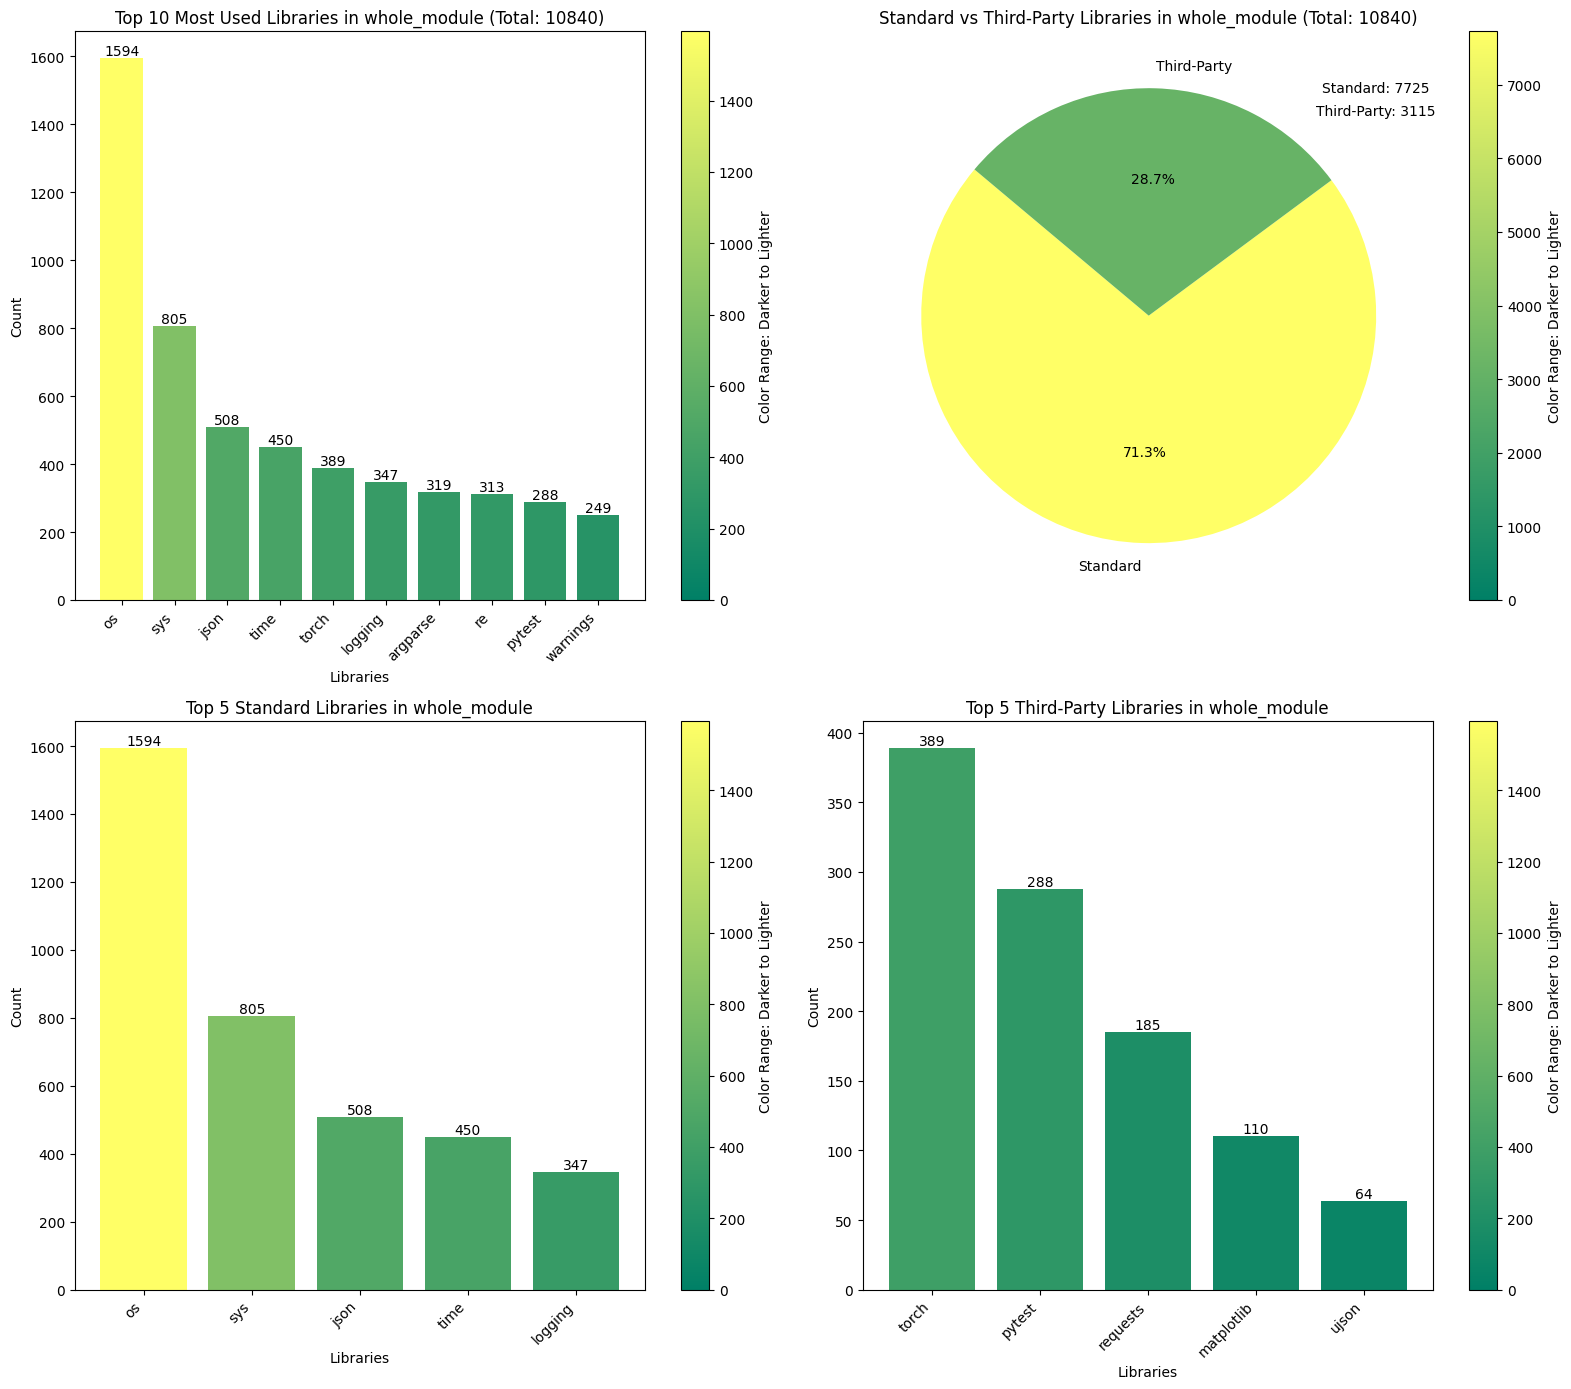

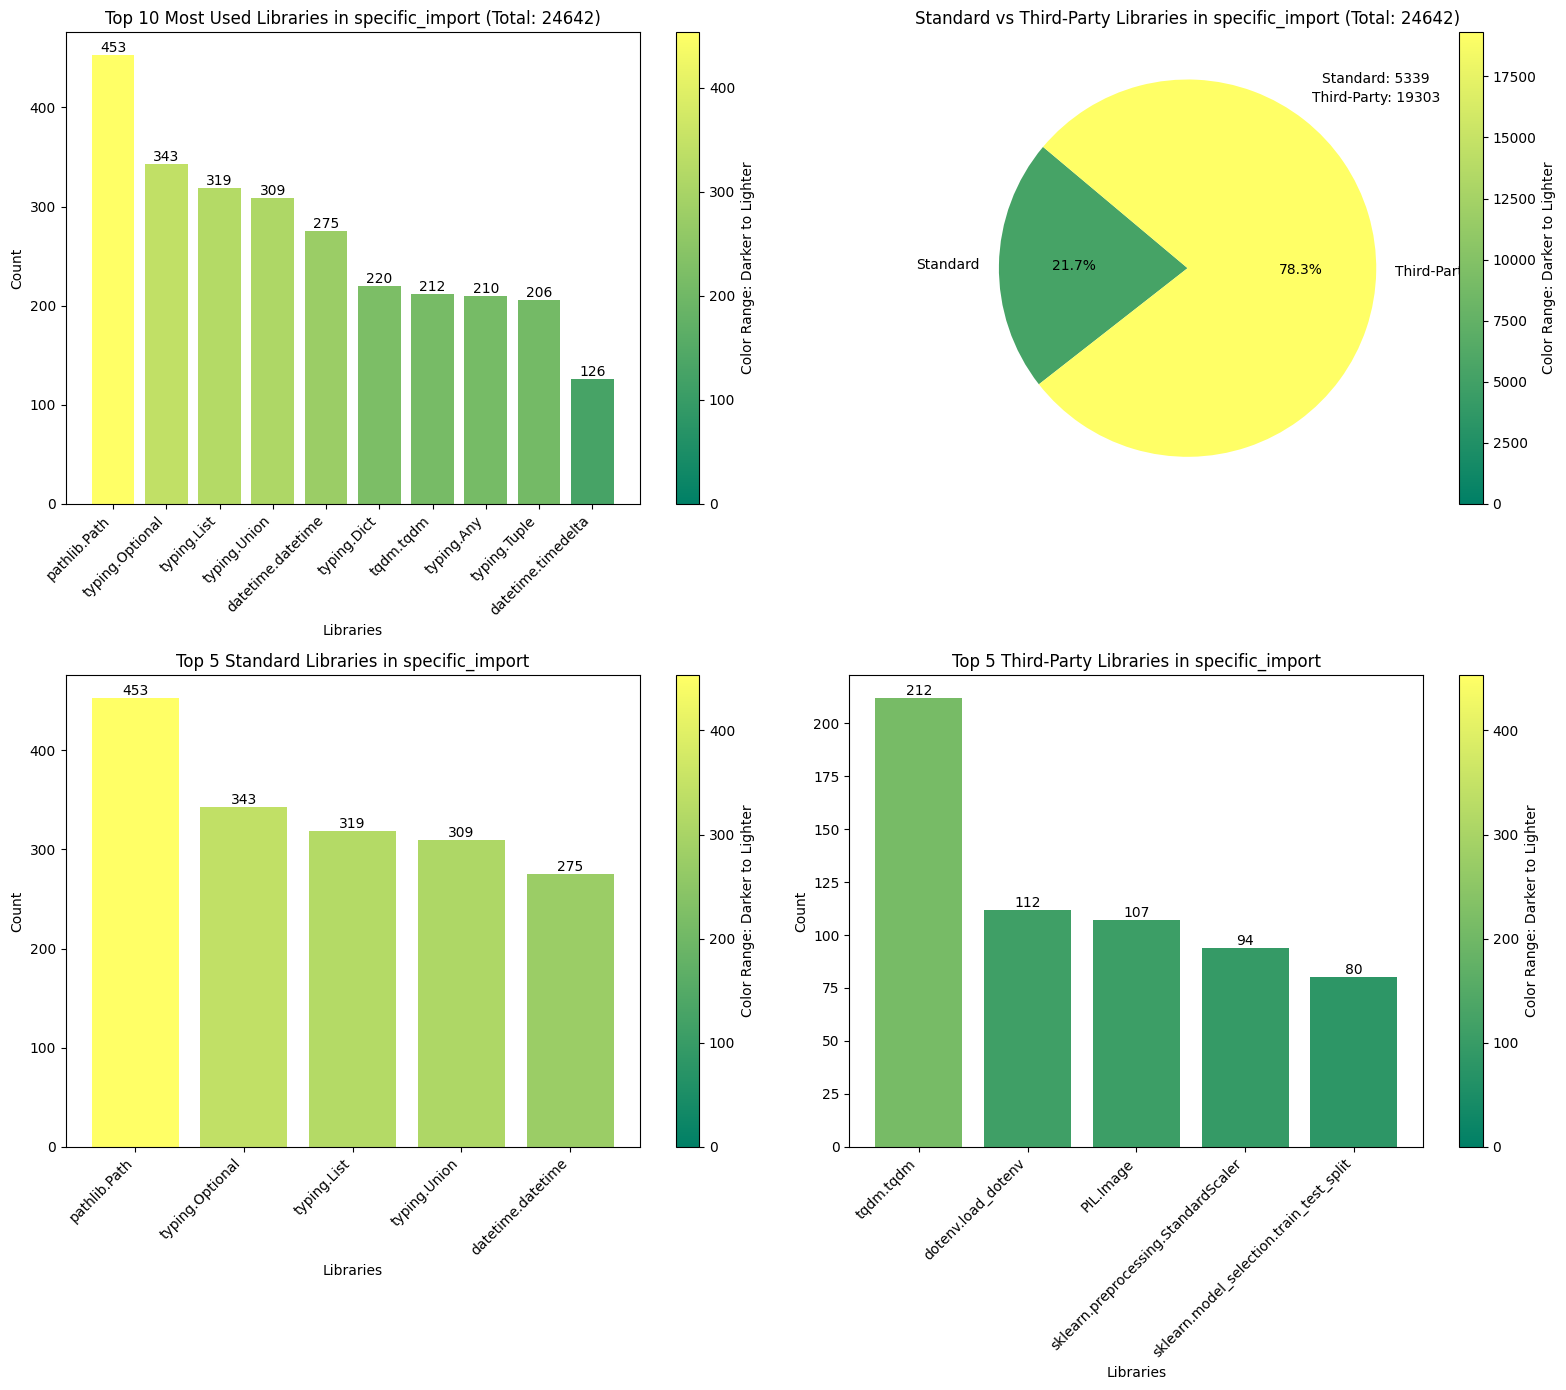

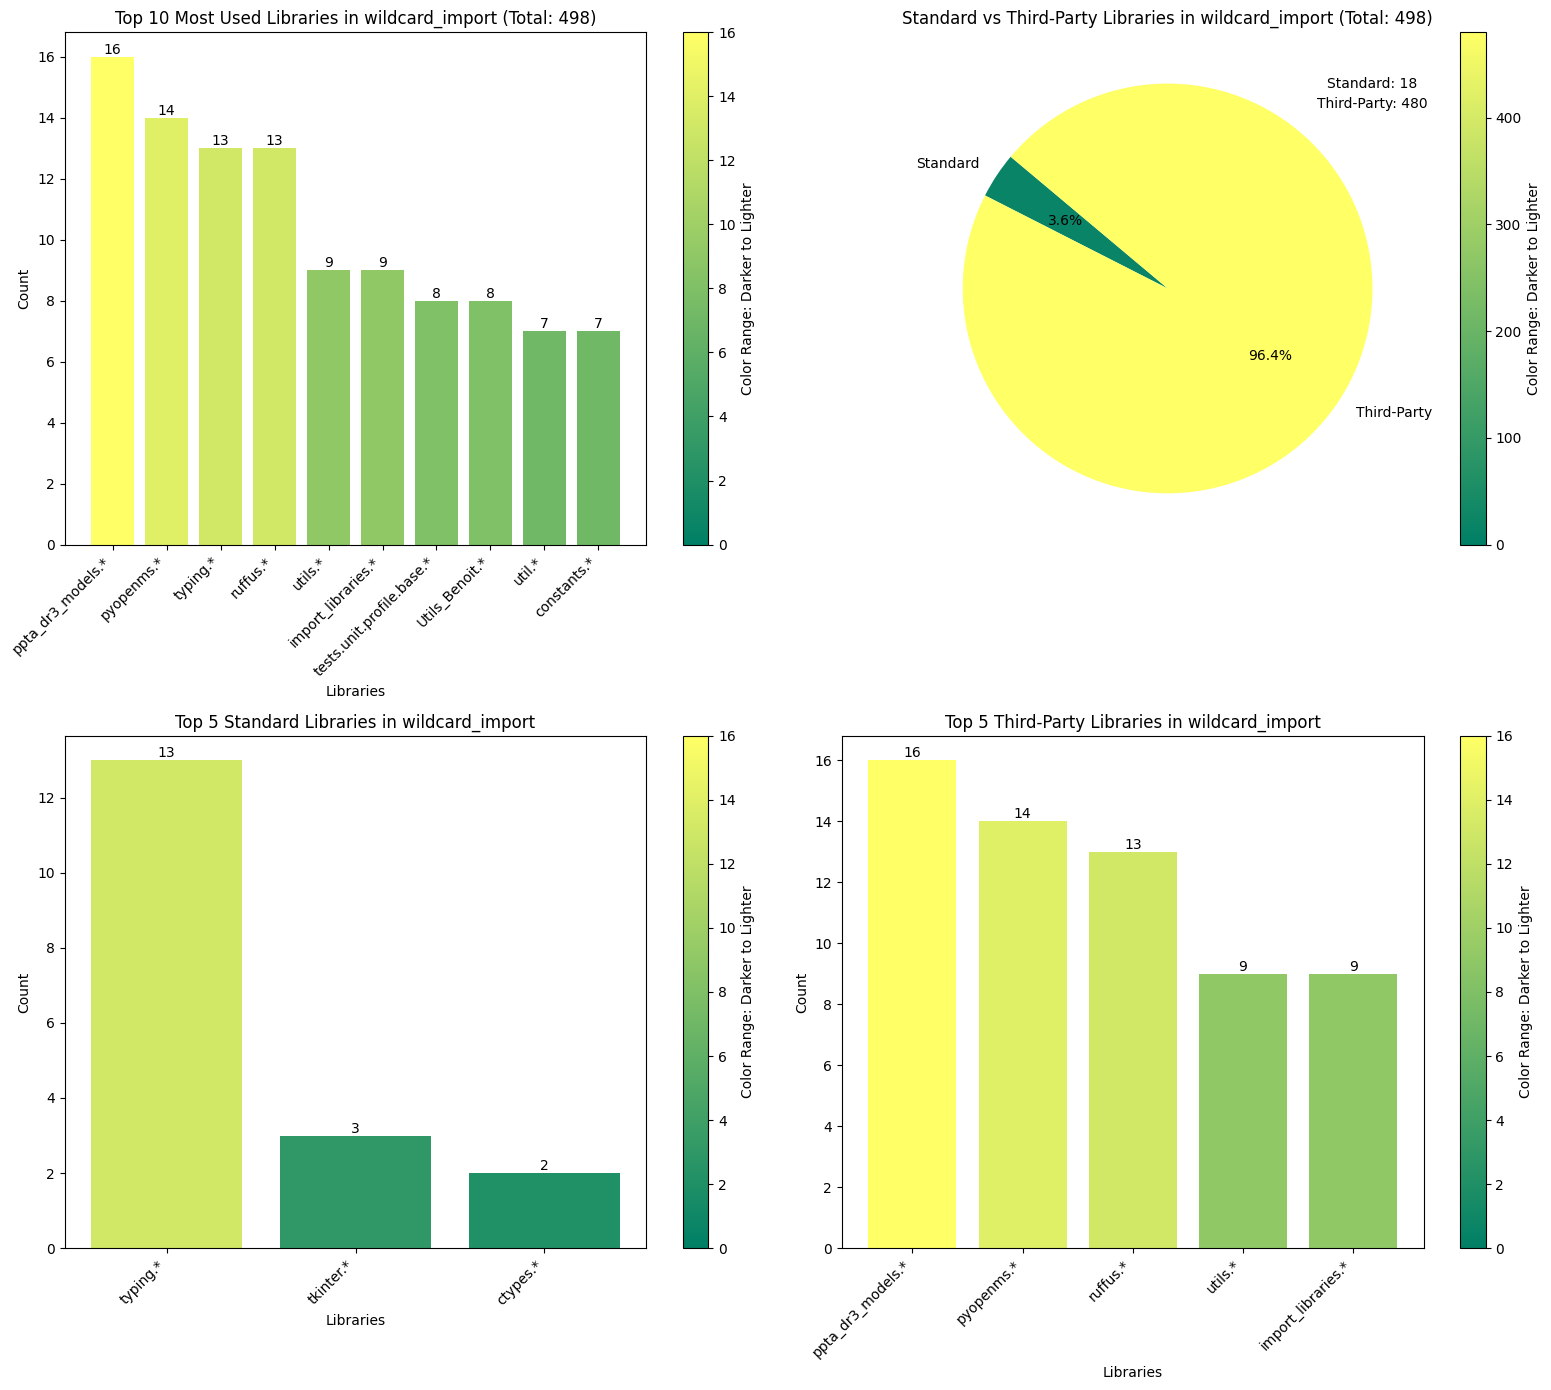

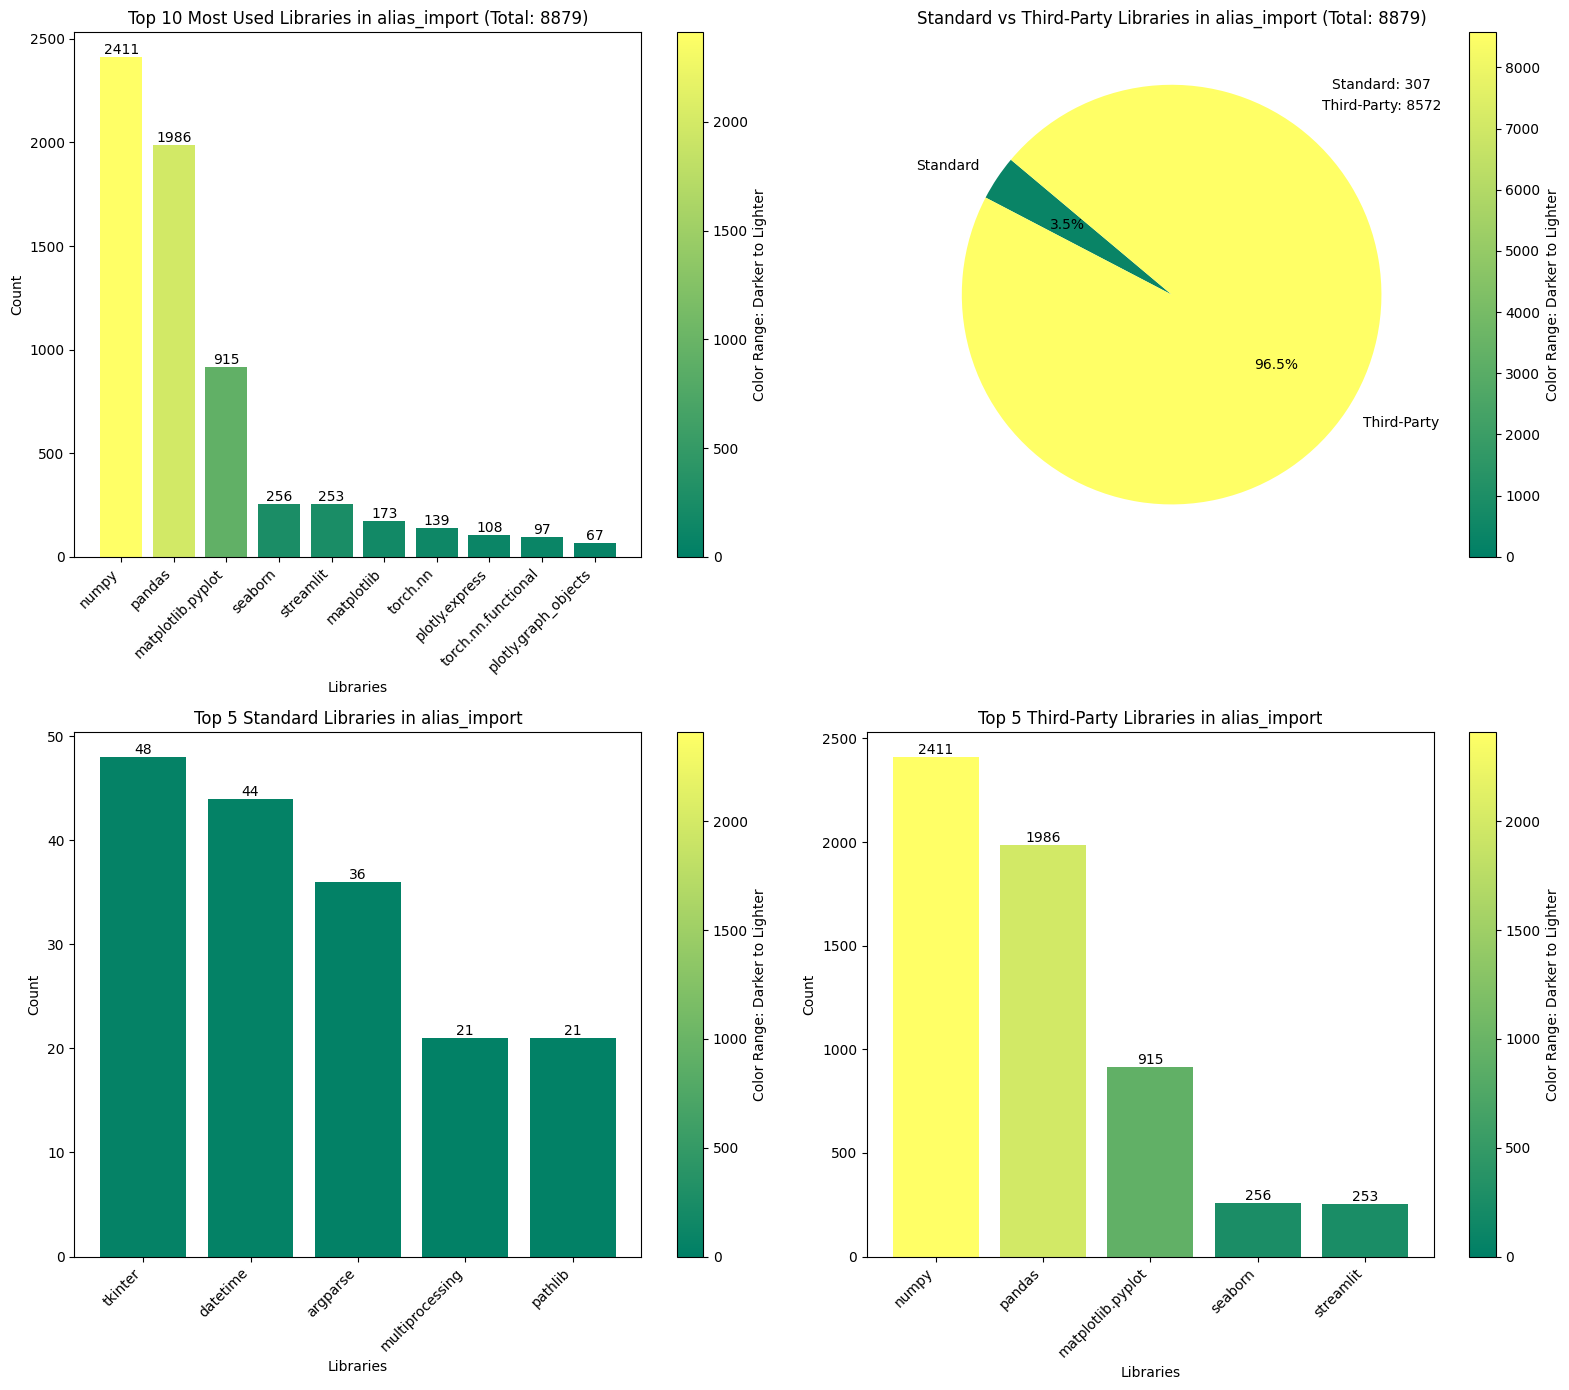

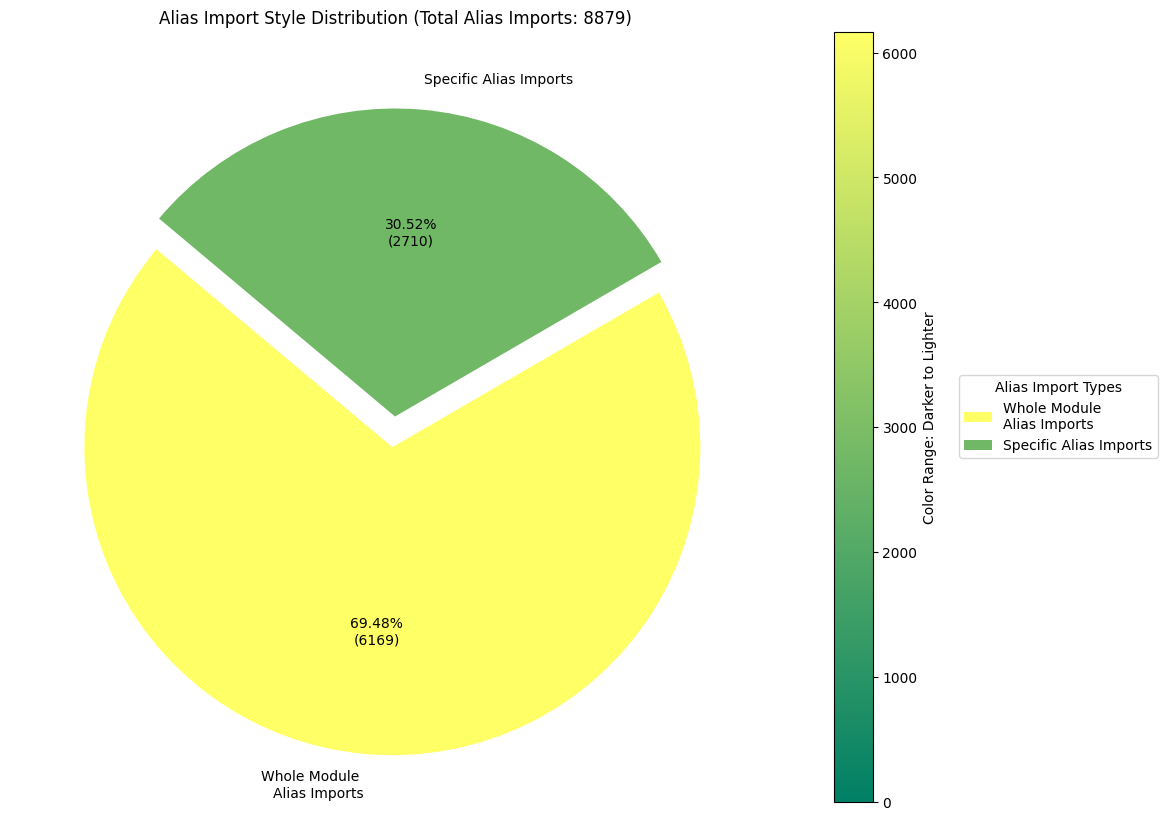

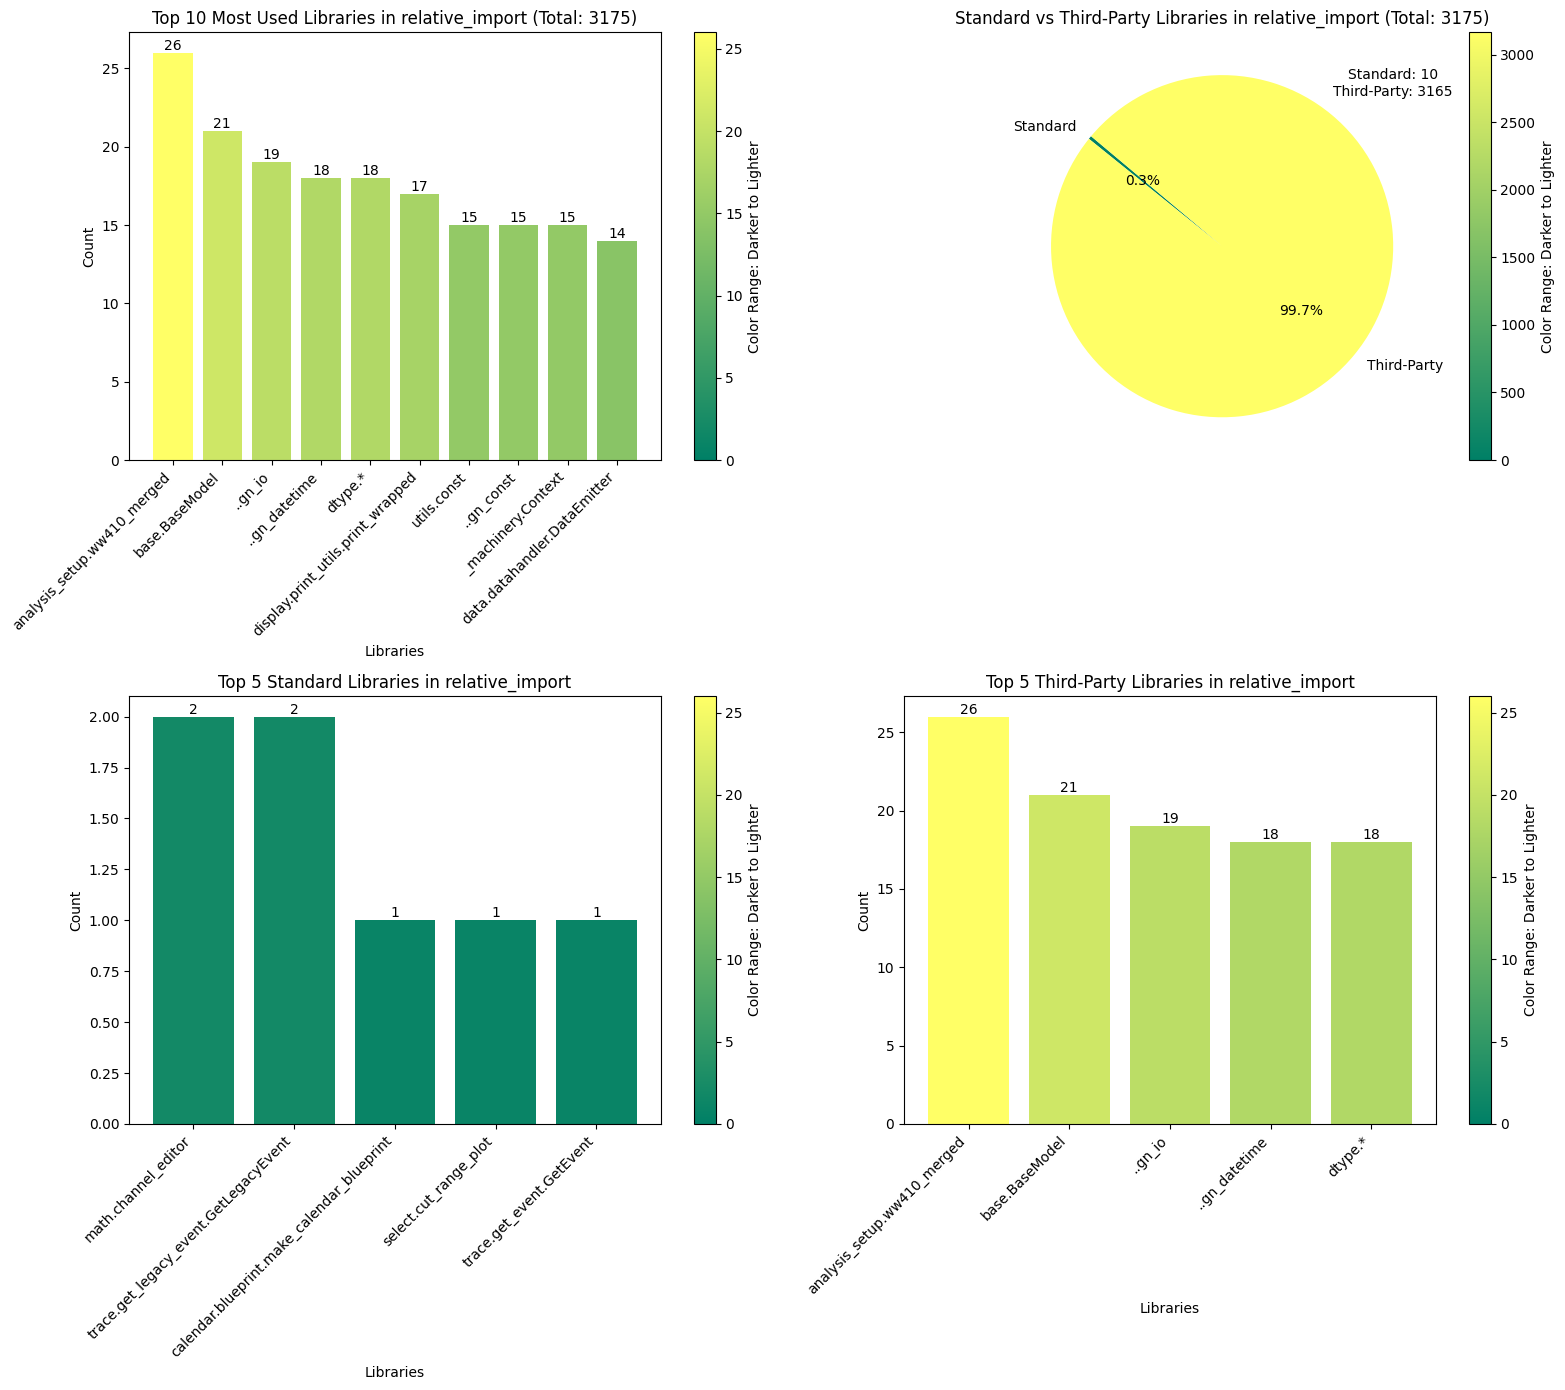

In [1]:
import pandas as pd
import sys
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import cm
from tabulate import tabulate
import numpy as np
from matplotlib import cm
from matplotlib.colors import Normalize
import seaborn as sns

# Read the data from the provided file
# file_path = '../MEET11WORKJULY/DataAnalysis_import_styles_report.txt'
# file_path = 'ML_import_styles_report.txt'
# file_path = 'Test_import_styles_report.txt'
file_path = 'DA_import_styles_report.txt'
# file_path = 'WEB_import_styles_report.txt'
# file_path = 'FINAL_WEBimport_styles_report.txt'
# file_path = 'After_import_styles_report.txt'

# # Read the CSV file
# file_path2 = 'Test_function_usage_report.csv'
# file_path2 = 'WEB_function_usage_report.csv'
file_path2 = 'DA_function_usage_report.csv'
# file_path2 = 'ML_function_usage_report.csv'
# file_path2 = 'FINAL_WEBfunction_usage_report.csv'
# file_path2 = 'After_function_usage_report.csv'


# file_path3 = pd.read_csv('Test_repo_analysis.csv')
# file_path3 = pd.read_csv('WEB_repo_analysis.csv')
file_path3 = pd.read_csv('DA_repo_analysis.csv')
# file_path3 = pd.read_csv('ML_repo_analysis.csv')
# file_path3 = pd.read_csv('FINAL_WEBrepo_analysis.csv')
# file_path3 = pd.read_csv('After_repo_analysis.csv')

# file_path4 = pd.read_csv('Test_function_usage_report.csv')
# file_path4 = pd.read_csv('WEB_function_usage_report.csv')
file_path4 = pd.read_csv('DA_repo_analysis.csv')
# file_path4 = pd.read_csv('ML_repo_analysis.csv')
# file_path4 = pd.read_csv('FINAL_WEBrepo_analysis.csv')
# file_path4 = pd.read_csv('After_repo_analysis.csv')


# Open the file with UTF-8 encoding
with open(file_path, 'r', encoding='utf-8') as file:
    data = file.read()

# Extract relevant information
def extract_value(keyword):
    return int(data.split(f"{keyword}: ")[1].split("\n")[0])

total_files_accessed = extract_value("Total number of files accessed")
files_with_no_imports = extract_value("Count for files with no imports")
files_not_accessed_due_to_errors = extract_value("Total files not accessed due to errors")
total_files = extract_value("Total number of files scanned")
total_repos_scanned = extract_value("Total repositories scanned")
total_repos_skipped = extract_value("Total repositories skipped")


# File Counts Table
file_counts = {
    'Category': ['Total Repositories Scanned', 'Total Repositories Skipped', 'Total Number of Files Scanned', 'Files Accessed', f'Files with No Imports out of Files Accessed', 'Files Not Accessed Due to Errors'],
    'Count': [total_repos_scanned ,total_repos_skipped , total_files, total_files_accessed, f"{files_with_no_imports}", files_not_accessed_due_to_errors]
}
file_counts_df = pd.DataFrame(file_counts)
print("File Counts:")
print(tabulate(file_counts_df.values.tolist(), headers=file_counts_df.columns.tolist(), tablefmt="grid"))


# Extract import styles information
import_styles_data = data.split("Import Styles Analysis:\n")[1].strip()
import_styles_lines = import_styles_data.split("\n")[1:]
# print(f"{import_styles_data}\n")
# print(import_styles_lines)

# Create a DataFrame from the import styles data
df = pd.DataFrame([line.split(",") for line in import_styles_lines], columns=["style", "module", "count"])
df["count"] = df["count"].astype(int)
# print(df)
# Calculate total imports
total_imports = df["count"].sum()
# print(total_imports)
# Define import styles
import_styles = ["whole_module", "specific_import", "wildcard_import", "alias_import", "relative_import"]

# Separate imports into standard, third-party, and relative libraries
standard_libs = set(sys.stdlib_module_names)
standard_imports = Counter()
third_party_imports = Counter()
relative_imports = Counter()

for _, row in df.iterrows():
    module_base = row["module"].split('.')[0] if row["module"] else ''
    if row["style"] in ["relative_import"]:
        relative_imports[row["module"]] += row["count"]
    elif module_base in standard_libs:
        standard_imports[row["module"]] += row["count"]
    elif row["module"] != 'None':
        third_party_imports[row["module"]] += row["count"]

# Calculate total imports for standard, third-party, and relative imports
total_standard_imports = sum(standard_imports.values())
total_third_party_imports = sum(third_party_imports.values())
total_relative_imports = sum(relative_imports.values())
# print(standard_imports)
# Calculate averages
average_imports_per_file = total_imports / total_files_accessed
average_standard_imports_per_file = total_standard_imports / total_files_accessed
average_third_party_imports_per_file = total_third_party_imports / total_files_accessed
average_relative_imports_per_file = total_relative_imports / total_files_accessed

# Aggregate counts for base modules
aggregated_standard_imports = Counter()
aggregated_third_party_imports = Counter()

for module, count in standard_imports.items():
    base_module = module.split('.')[0]
    aggregated_standard_imports[base_module] += count

for module, count in third_party_imports.items():
    base_module = module.split('.')[0]
    aggregated_third_party_imports[base_module] += count

# Function to get color from count
def get_color_from_count(count, max_count):
    return cm.summer(count / max_count if max_count else 0)



# Plotting top 20 standard modules and top 20 third-party modules
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

def plot_top_modules(ax, title, imports, top_n=20):
    top_modules = imports.most_common(top_n)
    total_count = sum(imports.values())
    max_count = max(count for _, count in top_modules)
    ax.bar([module for module, _ in top_modules], [count for _, count in top_modules],
           color=[get_color_from_count(count, max_count) for _, count in top_modules])
    ax.set_xlabel('Modules')
    ax.set_ylabel('Count')
    ax.set_title(f'{title} (Total: {total_count})')
    for i, (module, count) in enumerate(top_modules):
        ax.text(i, count, str(count), ha='center', va='bottom')
    ax.set_xticks(range(len(top_modules)))
    ax.set_xticklabels([module for module, _ in top_modules], rotation=45, ha='right')
    sm = plt.cm.ScalarMappable(cmap=cm.summer, norm=plt.Normalize(vmin=0, vmax=max_count))
    sm.set_array([])
    fig.colorbar(sm, ax=ax, orientation='vertical', label='Color Range: Darker to Lighter')

plot_top_modules(axes[0, 0], 'Top 20 Standard Modules', standard_imports)
plot_top_modules(axes[0, 1], 'Top 20 Third-Party Modules', third_party_imports)
plot_top_modules(axes[1, 0], 'Top 20 Aggregated Standard Modules', aggregated_standard_imports)
plot_top_modules(axes[1, 1], 'Top 20 Aggregated Third-Party Modules', aggregated_third_party_imports)

plt.tight_layout()
plt.show()



# Plot top 5 libraries and their specific parts
def plot_top_5_libraries_parts(lib_imports, title, all_libs):
    fig, axs = plt.subplots(3, 2, figsize=(16, 12))
    max_count = max(count for _, count in lib_imports)
    for i, (lib, count) in enumerate(lib_imports):
        lib_parts = Counter({full_lib: all_libs[full_lib] for full_lib in all_libs if full_lib.startswith(lib)})
        top_lib_parts = lib_parts.most_common(10)
        total_lib_count = sum(lib_parts.values())
        ax = axs[i // 2, i % 2]
        bars = ax.barh([lib for lib, _ in top_lib_parts], [count for _, count in top_lib_parts],
                       color=[get_color_from_count(count, max_count) for _, count in top_lib_parts])
        ax.set_xlabel('Count')
        ax.set_xlim(0, max(count for _, count in top_lib_parts))
        ax.set_title(f'{title}: {lib} (Total: {total_lib_count})')
        for j, (lib, count) in enumerate(top_lib_parts):
            percentage = count / total_lib_count * 100
            ax.text(count, j, f" {count} ({percentage:.2f}%)", va='center', ha='left')
        sm = plt.cm.ScalarMappable(cmap=cm.summer, norm=plt.Normalize(vmin=0, vmax=max_count))
        sm.set_array([])
        fig.colorbar(sm, ax=ax, orientation='horizontal', label='Color Range: Darker to Lighter', pad=0.2)
    plt.tight_layout()
    plt.show()

plot_top_5_libraries_parts(aggregated_standard_imports.most_common(5), 'Top Standard Library', standard_imports)
plot_top_5_libraries_parts(aggregated_third_party_imports.most_common(5), 'Top Third-Party Library', third_party_imports)




# Extracting top libraries
top_standard_libraries = [lib for lib, _ in aggregated_standard_imports.most_common(10)]
top_third_party_libraries = [lib for lib, _ in aggregated_third_party_imports.most_common(10)]


df_functions = pd.read_csv(file_path2)

# Function to plot top functions for each library with a color bar
def plot_functions(fig, axs, library_list, df):
    for i, library in enumerate(library_list):
        # Filter functions for the specific library
        function_usage = Counter()
        for _, row in df.iterrows():
            if row["Core Imported Library"] == library:
                function_usage[row["Function"]] += row["Usage Count"]

        # Get top 10 functions
        top_functions = function_usage.most_common(10)
        if not top_functions:
            continue  # Skip if no functions are recorded for the library

        ax = axs[i]
        names = [func for func, _ in top_functions]
        values = [count for _, count in top_functions]
        total_usage = sum(function_usage.values())

        if values:  # Check if values list is not empty
            # Color mapping based on values
            norm = Normalize(vmin=min(values), vmax=max(values))
            colors = [cm.summer(norm(value)) for value in values]
            bars = ax.bar(names, values, color=colors)
            ax.set_title(f'Top Functions in {library} (Total: {total_usage})')
            ax.set_xlabel('Functions')
            ax.set_ylabel('Usage Count')
            ax.tick_params(axis='x', rotation=45)

            # Add count and percentage as labels
            for bar in bars:
                yval = bar.get_height()
                percentage = (yval / total_usage) * 100 if total_usage > 0 else 0
                ax.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval)}\n({percentage:.1f}%)', ha='center', va='bottom', fontsize=9, color='black')

            # Adding a color bar
            sm = cm.ScalarMappable(cmap=cm.summer, norm=norm)
            sm.set_array([])
            cbar = fig.colorbar(sm, ax=ax, orientation='vertical', pad=0.05)
            cbar.set_label('Usage Count')

# Create separate figures for standard and third-party libraries
fig1, axs1 = plt.subplots(nrows=5, ncols=2, figsize=(16, 35), constrained_layout=True)
fig2, axs2 = plt.subplots(nrows=5, ncols=2, figsize=(16, 35), constrained_layout=True)

plot_functions(fig1, axs1.flat, top_standard_libraries, df_functions)
plot_functions(fig2, axs2.flat, top_third_party_libraries, df_functions)

fig1.suptitle('Top 10 Functions in Standard Libraries', fontsize=16)
fig2.suptitle('Top 10 Functions in Third-Party Libraries', fontsize=16)

plt.show()


import networkx as nx
from itertools import combinations

df_functions['Core Imported Library'] = df_functions['Core Imported Library'].astype(str)

# Group data by Repository and File Path, and collect all libraries used in the same file
co_occurrence = df_functions.groupby(['Repository', 'File Path'])['Core Imported Library'].apply(set).reset_index()

# Generate pairs of libraries that appear together in the same file
co_occurrence['Library Pairs'] = co_occurrence['Core Imported Library'].apply(lambda x: list(combinations(sorted(x), 2)))

# Flatten the list of pairs and count occurrences
pairs_list = [pair for sublist in co_occurrence['Library Pairs'] for pair in sublist]
pairs_count = Counter(pairs_list)

# Get the top 20 pairs based on co-occurrence count
top_20_pairs = pairs_count.most_common(20)
pairs, counts = zip(*top_20_pairs)
total_count = sum(counts)
percentages = [count / total_count * 100 for count in counts]

# Plot the bar chart
plt.figure(figsize=(14, 8))
norm = Normalize(vmin=min(counts), vmax=max(counts))
colors = [cm.summer(norm(value)) for value in counts]

bars = plt.barh([f"{pair[0]} & {pair[1]}" for pair in reversed(pairs)], list(reversed(counts)), color=list(reversed(colors)))
plt.xlabel('Co-Occurrence Count')
plt.ylabel('Library Pairs')
plt.title(f'Top 20 Library Co-Occurrence Pairs (Total Count: {total_count})')

# Add count and percentage as labels on the bars
for bar, count, percentage in zip(bars, reversed(counts), reversed(percentages)):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{count} ({percentage:.1f}%)', va='center', ha='left', fontsize=10)

# Add a color bar
sm = cm.ScalarMappable(cmap=cm.summer, norm=norm)
sm.set_array(counts)
cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical', pad=0.02)
cbar.set_label('Co-Occurrence Intensity')

plt.tight_layout()
# plt.gca().invert_yaxis()  # Invert y-axis to have the top library at the top
plt.show()





# Filter out empty aliases
df_functions = df_functions[df_functions['Alias'].notna() & (df_functions['Alias'] != '')]

# Count the usage of each alias with its associated library
alias_library_counts = df_functions.groupby(['Alias', 'Core Imported Library']).size().reset_index(name='count')

# Get the top 10 aliases with their associated libraries
top_aliases = alias_library_counts.groupby('Alias')['count'].sum().nlargest(10).index
top_aliases_with_libraries = alias_library_counts[alias_library_counts['Alias'].isin(top_aliases)]

# Prepare labels combining alias and library name
top_aliases_with_libraries['label'] = top_aliases_with_libraries['Alias'] + " (" + top_aliases_with_libraries['Core Imported Library'] + ")"

# Aggregate counts for these top aliases
aggregated_alias_counts = top_aliases_with_libraries.groupby('label')['count'].sum().sort_values(ascending=False).head(10)

# Plot bar chart for top 10 aliases used with library names
fig, ax = plt.subplots(figsize=(12, 6))
norm = Normalize(vmin=0, vmax=aggregated_alias_counts.max())
colors = cm.summer(norm(aggregated_alias_counts.values))

bars = ax.barh(aggregated_alias_counts.index, aggregated_alias_counts.values, color=colors)
ax.set_xlabel('Count')
ax.set_ylabel('Alias (Library)')
ax.set_title(f'Top 10 Aliases Used (Total Count: {sum(aggregated_alias_counts)})')
plt.tight_layout()

# Add count and percentage as labels on the bars
total_alias_count = aggregated_alias_counts.sum()
for index, value in enumerate(aggregated_alias_counts.values):
    ax.text(value, index, f'{value} \n ({value / total_alias_count * 100:.1f}%)', va='center')

# Add a color bar
sm = cm.ScalarMappable(cmap=cm.summer, norm=norm)
sm.set_array(aggregated_alias_counts.values)
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('Usage Intensity')

ax.invert_yaxis()  # Invert y-axis to have the top item at the top
plt.show()




# Imports per File Table
average_imports_data = {
    'Metric': ['Average Number of Imports per File', 'Average Number of Standard Libraries Imported per File', 'Average Number of Third-Party Libraries Imported per File', 'Average Number of Relative Imports per File'],
    'Count': [average_imports_per_file, average_standard_imports_per_file, average_third_party_imports_per_file, average_relative_imports_per_file]
}
average_imports_df = pd.DataFrame(average_imports_data)
print("Imports per File:")
print(tabulate(average_imports_df.values.tolist(), headers=average_imports_df.columns.tolist(), tablefmt="grid"))


# Pie chart for total import statements
plt.figure(figsize=(14, 10))
total_import_counts = [total_standard_imports, total_third_party_imports, total_relative_imports]
total_import_labels = ['Standard', 'Third-Party', 'Relative']
wedges, texts, autotexts = plt.pie(
    total_import_counts,
    labels=total_import_labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=[get_color_from_count(count, max(total_import_counts)) for count in total_import_counts]
)
plt.axis('equal')
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(wedges, total_import_labels, title="Import Types", loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
sm = plt.cm.ScalarMappable(cmap=cm.summer, norm=plt.Normalize(vmin=0, vmax=max(total_import_counts)))
sm.set_array([])
fig.colorbar(sm, ax=plt.gca(), orientation='vertical', label='Color Range: Darker to Lighter')
plt.title(f'Total Import Statements (Total: {total_imports})')
plt.show()

# Plotting import style usage counts
import_style_counts = df.groupby("style")["count"].sum().to_dict()
plt.figure(figsize=(14, 10))
styles = list(import_style_counts.keys())
counts = list(import_style_counts.values())
total_imports = sum(counts)
max_count_style = max(counts)

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{val} ({pct:.1f}%)'
    return my_format

wedges, texts, autotexts = plt.pie(
    counts,
    labels=styles,
    autopct=autopct_format(counts),
    startangle=200,
    colors=[get_color_from_count(count, max_count_style) for count in counts]
)
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.legend(wedges, styles, title="Import Styles", loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
sm = plt.cm.ScalarMappable(cmap=cm.summer, norm=plt.Normalize(vmin=0, vmax=max(counts)))
sm.set_array([])
fig.colorbar(sm, ax=plt.gca(), orientation='vertical', label='Color Range: Darker to Lighter')
plt.title(f'Import Style Usage Count (Total Imports: {total_imports})')
plt.show()

# Plotting graphs for each import style showing top 10 most used libraries and their classification
for style in import_styles:
    style_df = df[df["style"] == style]
    style_counts = Counter()
    standard_counts = Counter()
    third_party_counts = Counter()
    
    for _, row in style_df.iterrows():
        module_base = row["module"].split('.')[0] if row["module"] else ''
        if module_base in standard_libs:
            standard_counts[row["module"]] += row["count"]
        else:
            third_party_counts[row["module"]] += row["count"]
        style_counts[row["module"]] += row["count"]

    if not style_counts:
        continue  # Skip plotting if no counts available

    total_style_imports = sum(style_counts.values())
    top_10_style_counts = style_counts.most_common(10)
    top_5_standard_counts = standard_counts.most_common(5)
    top_5_third_party_counts = third_party_counts.most_common(5)
    max_count_style = max(count for _, count in top_10_style_counts)

    fig, axes = plt.subplots(2, 2, figsize=(16, 14))

    def plot_bar(ax, title, counts):
        bars = ax.bar([module for module, _ in counts], [count for _, count in counts],
                      color=[get_color_from_count(count, max_count_style) for _, count in counts])
        ax.set_xlabel('Libraries')
        ax.set_ylabel('Count')
        ax.set_title(title)
        for i, (module, count) in enumerate(counts):
            ax.text(i, count, str(count), ha='center', va='bottom')
        ax.set_xticks(range(len(counts)))
        ax.set_xticklabels([module for module, _ in counts], rotation=45, ha='right')
        sm = plt.cm.ScalarMappable(cmap=cm.summer, norm=plt.Normalize(vmin=0, vmax=max_count_style))
        sm.set_array([])
        fig.colorbar(sm, ax=ax, orientation='vertical', label='Color Range: Darker to Lighter')

    plot_bar(axes[0, 0], f'Top 10 Most Used Libraries in {style} (Total: {total_style_imports})', top_10_style_counts)

    std_vs_tp_counts = [sum(standard_counts.values()), sum(third_party_counts.values())]
    if sum(std_vs_tp_counts) > 0:
        std_vs_tp_labels = ['Standard', 'Third-Party']
        axes[0, 1].pie(std_vs_tp_counts, labels=std_vs_tp_labels, autopct='%1.1f%%', startangle=140,
                       colors=[get_color_from_count(count, max(std_vs_tp_counts)) for count in std_vs_tp_counts])
        axes[0, 1].set_title(f'Standard vs Third-Party Libraries in {style} (Total: {sum(std_vs_tp_counts)})')
        for i, (label, count) in enumerate(zip(std_vs_tp_labels, std_vs_tp_counts)):
            axes[0, 1].text(1, 1 - i * 0.1, f'{label}: {count}', ha='center', va='center')
        # Add a color bar as a legend for Standard vs Third-Party Libraries Pie Chart
        sm = plt.cm.ScalarMappable(cmap=cm.summer, norm=plt.Normalize(vmin=0, vmax=max(std_vs_tp_counts)))
        sm.set_array([])
        fig.colorbar(sm, ax=axes[0, 1],  orientation='vertical', label='Color Range: Darker to Lighter')
    
    plot_bar(axes[1, 0], f'Top 5 Standard Libraries in {style}', top_5_standard_counts)
    plot_bar(axes[1, 1], f'Top 5 Third-Party Libraries in {style}', top_5_third_party_counts)

    plt.tight_layout()

    if style == "alias_import":
        alias_imports = df[df["style"] == "alias_import"]
        whole_module_alias_imports = Counter()
        specific_alias_imports = Counter()

        for _, row in alias_imports.iterrows():
            if '.' in row["module"]:
                specific_alias_imports[row["module"]] += row["count"]
            else:
                whole_module_alias_imports[row["module"]] += row["count"]

        total_alias_imports = sum(whole_module_alias_imports.values()) + sum(specific_alias_imports.values())
        alias_counts = [sum(whole_module_alias_imports.values()), sum(specific_alias_imports.values())]
        alias_labels = ['Whole Module \nAlias Imports', 'Specific Alias Imports']

        fig, ax = plt.subplots(figsize=(14, 10), subplot_kw=dict(aspect="equal"))
        wedges, texts, autotexts = ax.pie(alias_counts, labels=alias_labels, autopct=lambda p: f'{p:.2f}%\n({int(p * total_alias_imports / 100)})',
                                         colors=[get_color_from_count(count, max(alias_counts)) for count in alias_counts],
                                         startangle=140, explode=(0.1, 0))
        ax.legend(wedges, alias_labels, title="Alias Import Types", loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
        ax.set_title(f'Alias Import Style Distribution (Total Alias Imports: {total_alias_imports})', fontdict={'fontsize': 12})
        sm = plt.cm.ScalarMappable(cmap=cm.summer, norm=plt.Normalize(vmin=0, vmax=max(alias_counts)))
        sm.set_array([])
        fig.colorbar(sm, ax=plt.gca(), orientation='vertical', label='Color Range: Darker to Lighter')
        plt.show()

    plt.show()


C:\Users\hkp10\AppData\Local\Temp\ipykernel_10444\1610939050.py:94: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  file_counts_df = file_counts_df.applymap(bold)


File Counts:
+----------+-----------------------------------+---------+
|  Sr. No  |              Metric               |  Count  |
+==========+===================================+=========+
|    1     |    Total Repositories Analyzed    |   600   |
+----------+-----------------------------------+---------+
|    2     | Repositories Successfully Scanned |   571   |
+----------+-----------------------------------+---------+
|    3     |       Repositories Skipped        |   29    |
+----------+-----------------------------------+---------+
|    4     |       Total Files Analyzed        |  10003  |
+----------+-----------------------------------+---------+
|    5     |    Files Successfully Accessed    |  8798   |
+----------+-----------------------------------+---------+
|    6     |       Files with No Imports       |   582   |
+----------+-----------------------------------+---------+
|    7     |    Files Skipped Due to Errors    |   623   |
+----------+-------------------------------

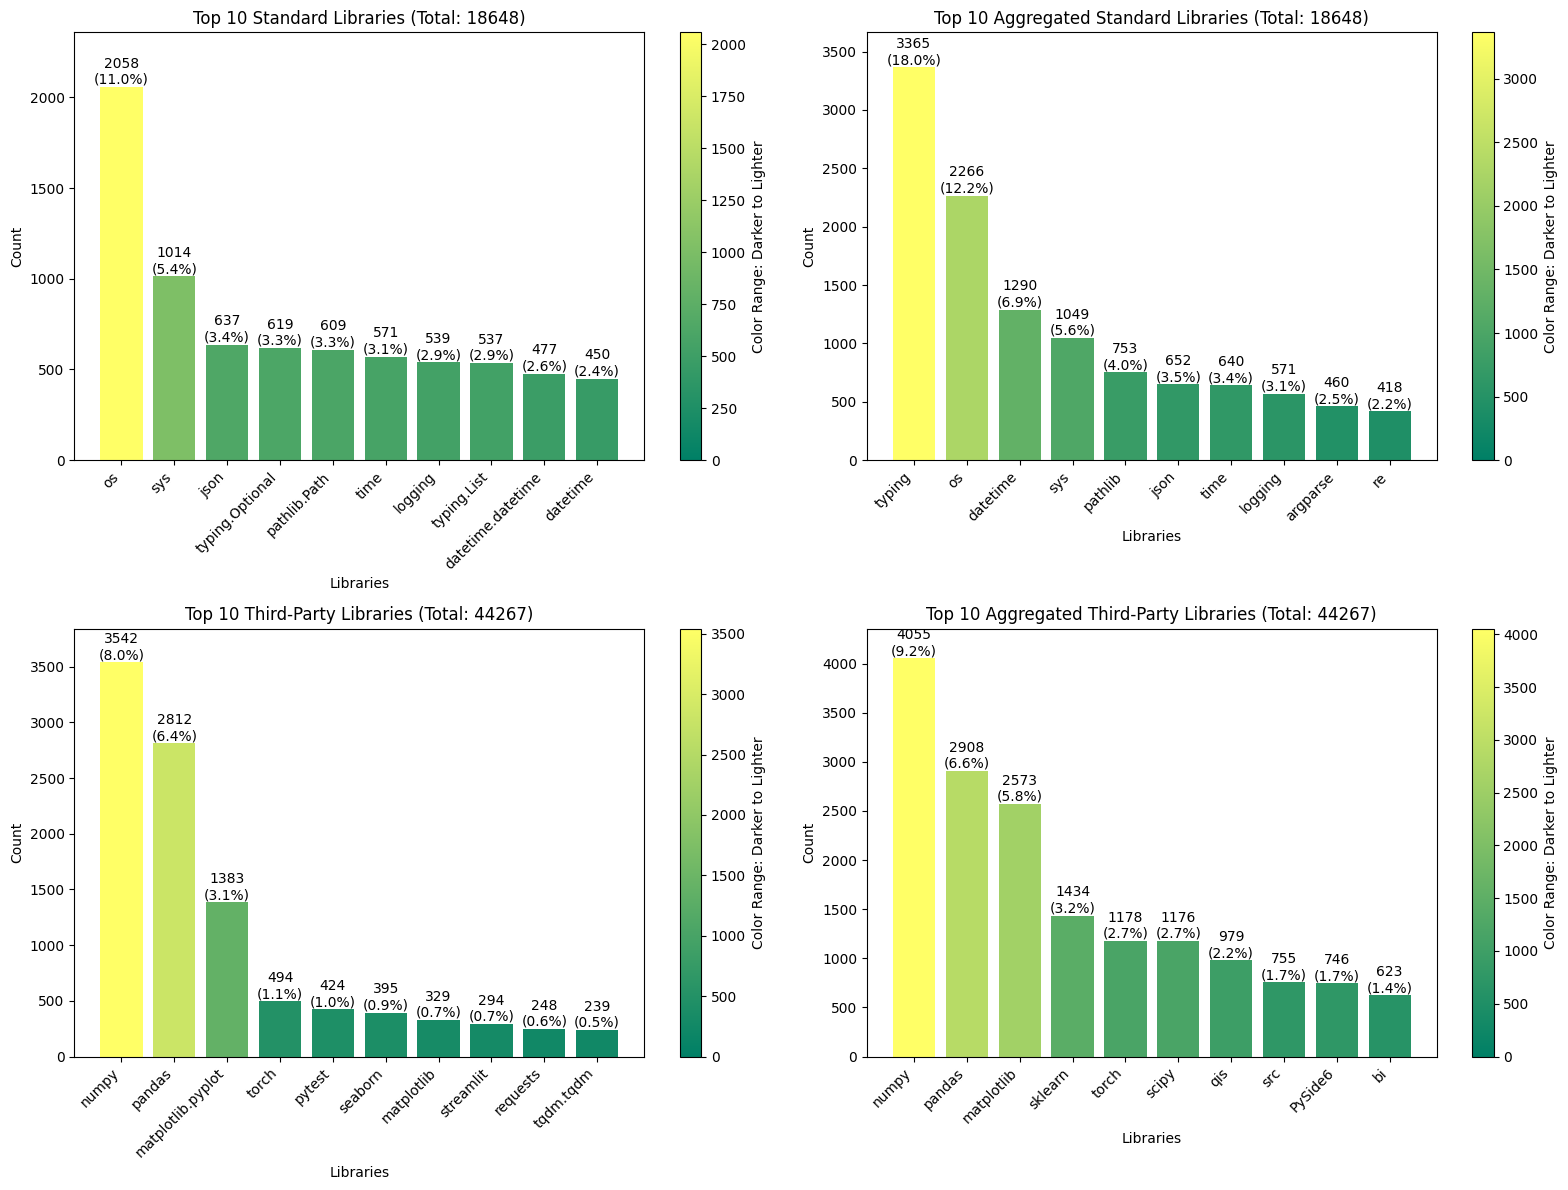

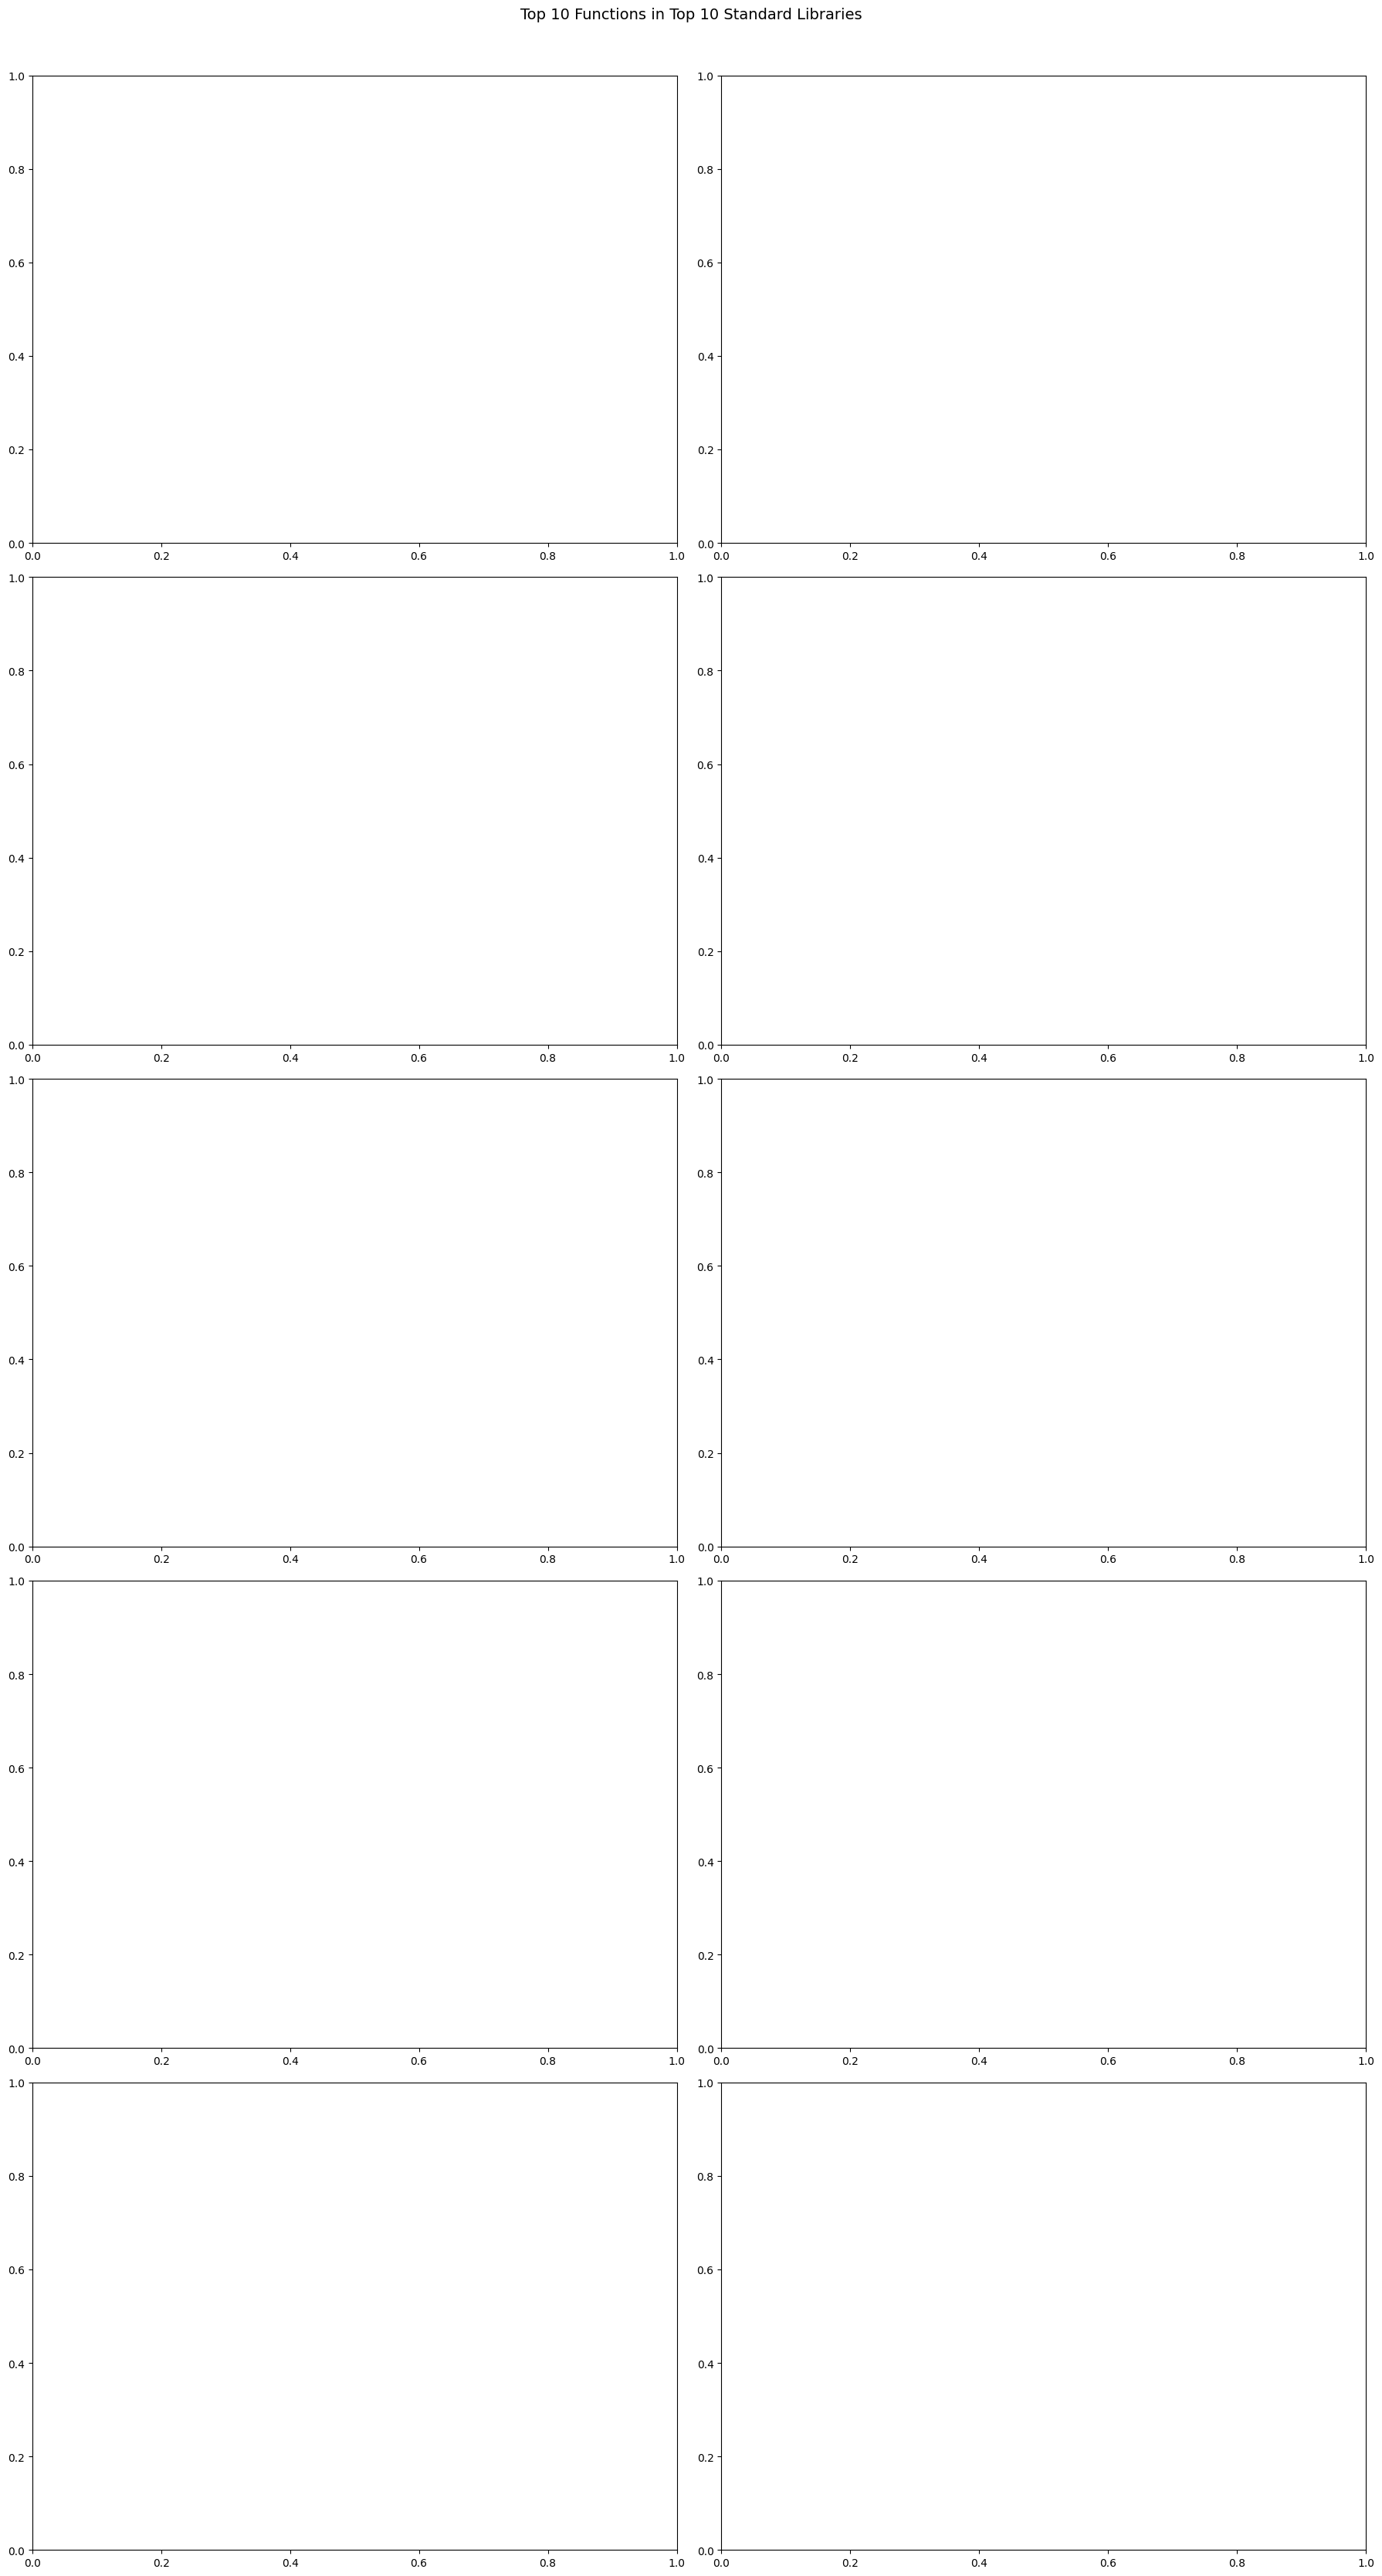

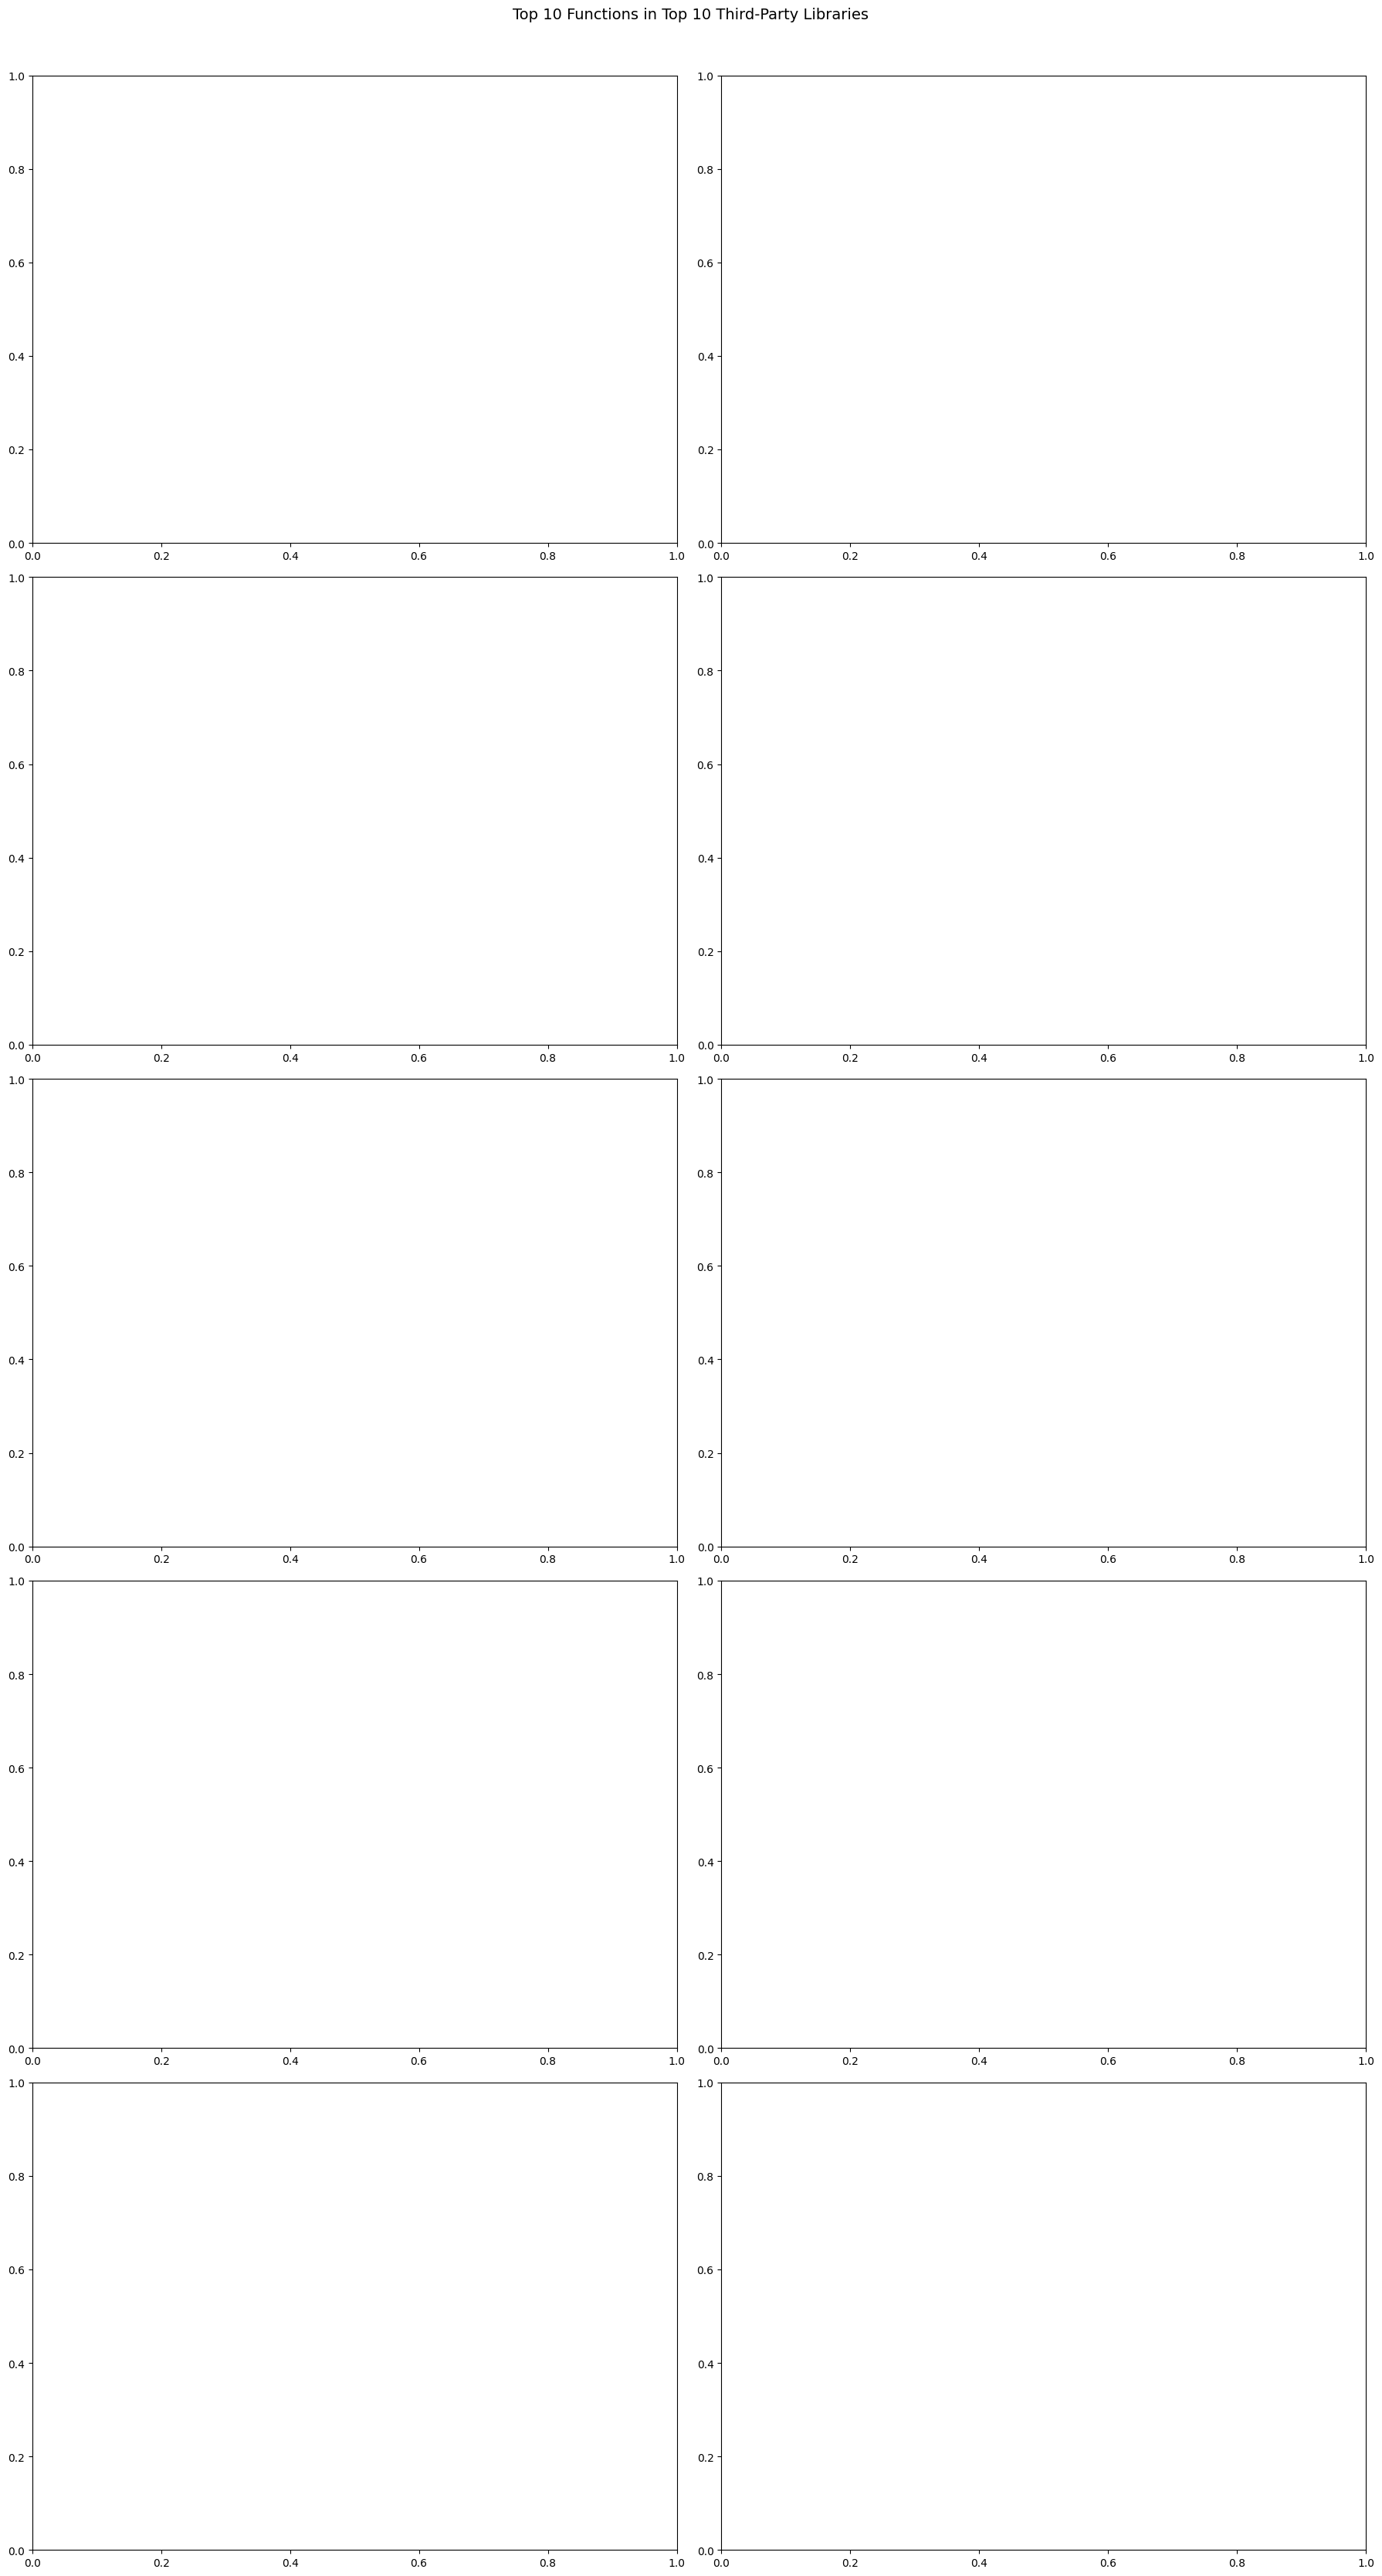

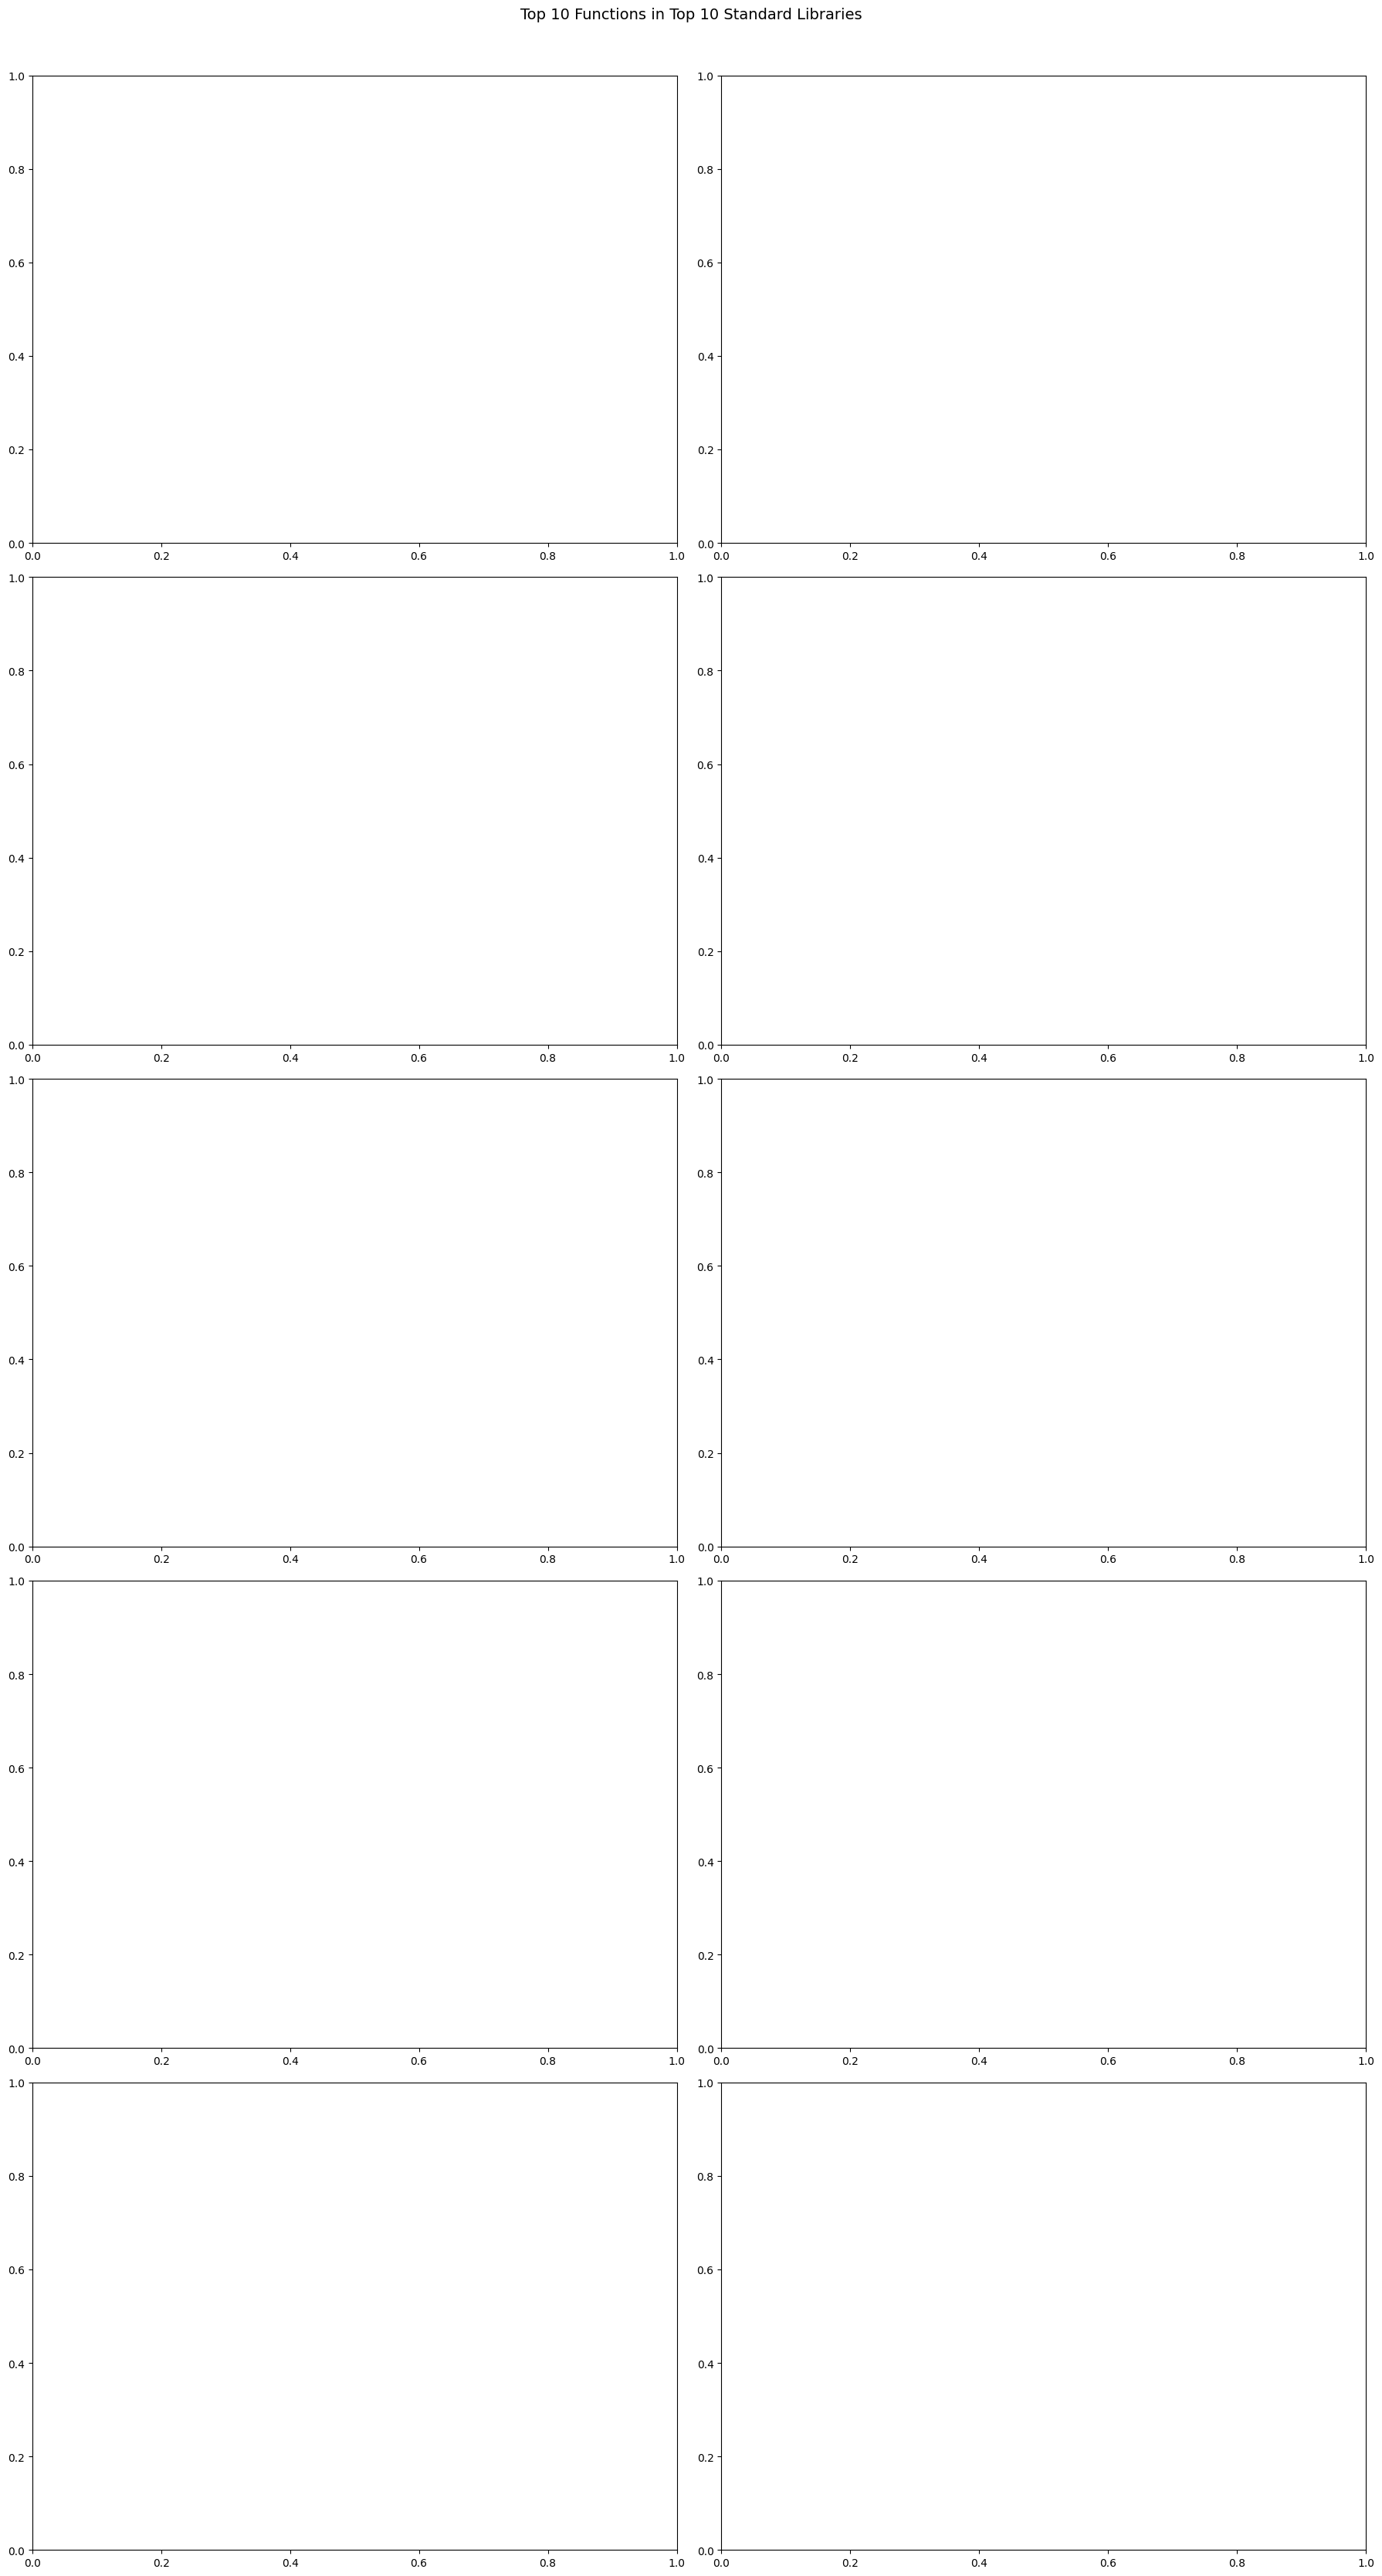

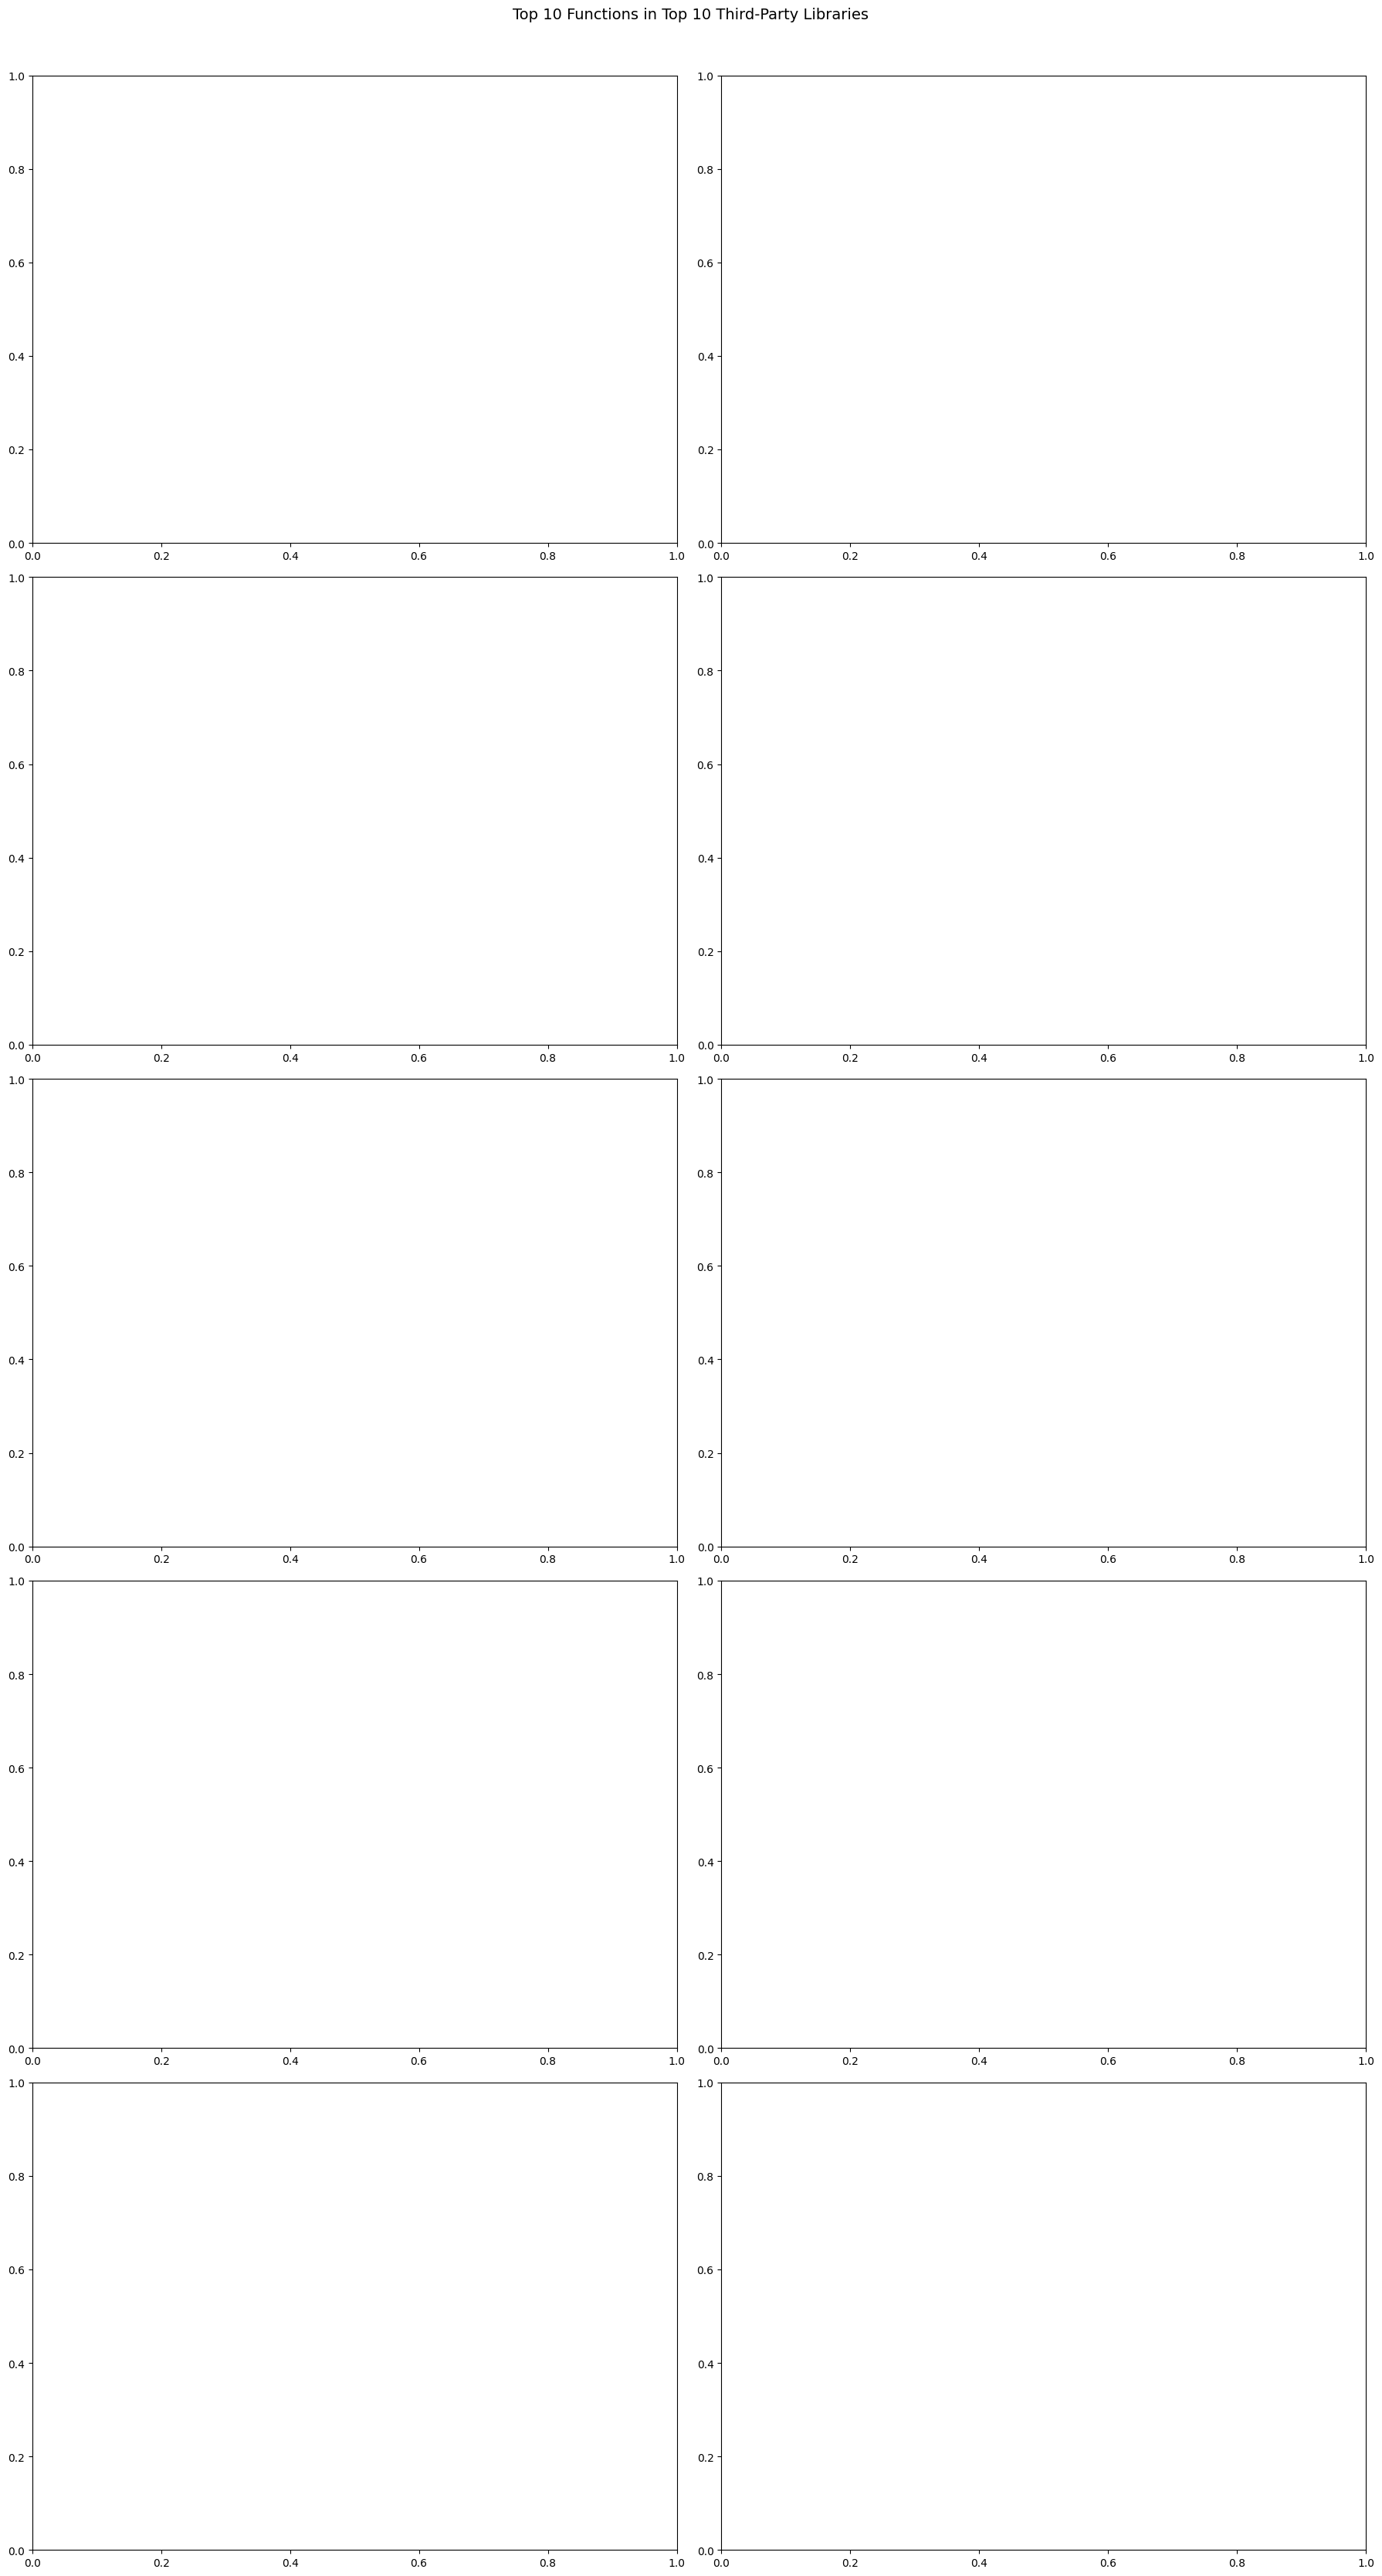

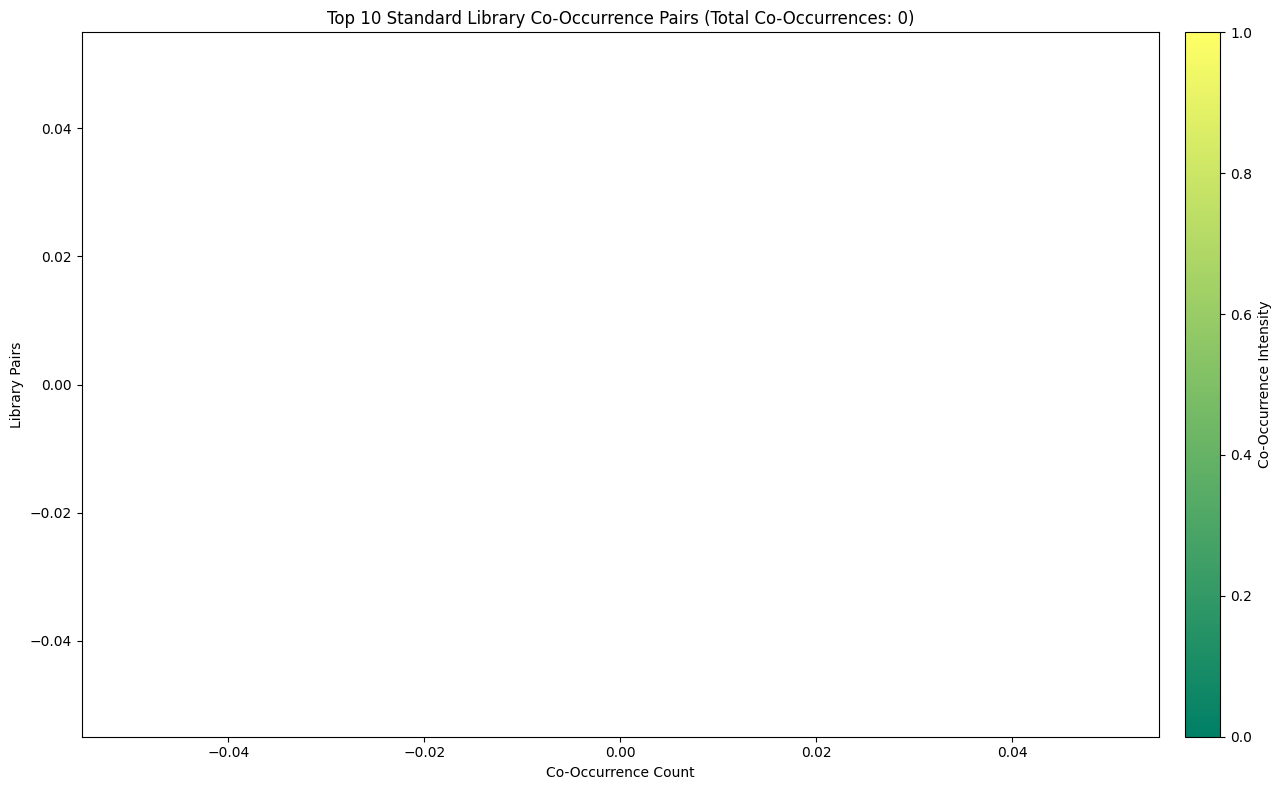

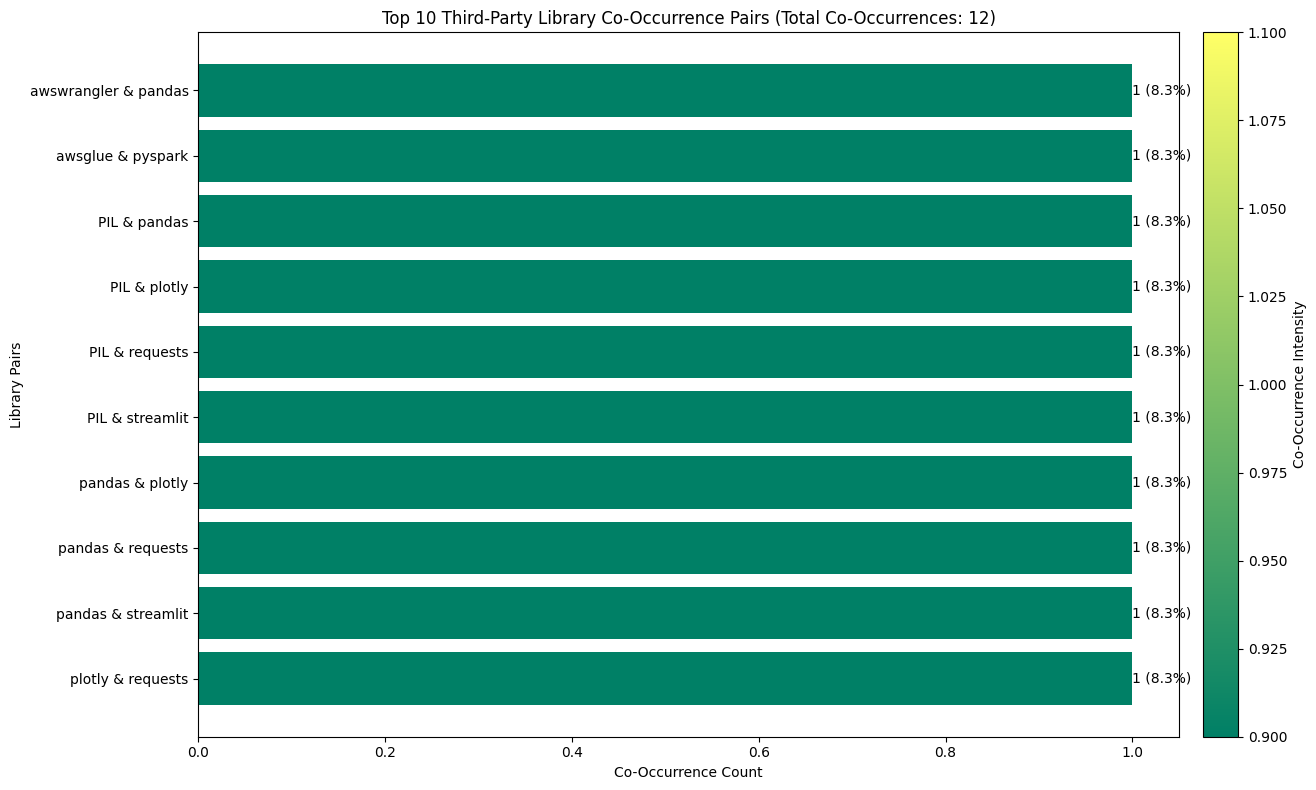

Counter({('awswrangler', 'pandas'): 1, ('awswrangler', 'urllib'): 1, ('pandas', 'urllib'): 1, ('awsglue', 'pyspark'): 1, ('PIL', 'pandas'): 1, ('PIL', 'plotly'): 1, ('PIL', 'requests'): 1, ('PIL', 'streamlit'): 1, ('pandas', 'plotly'): 1, ('pandas', 'requests'): 1, ('pandas', 'streamlit'): 1, ('plotly', 'requests'): 1, ('plotly', 'streamlit'): 1, ('requests', 'streamlit'): 1})


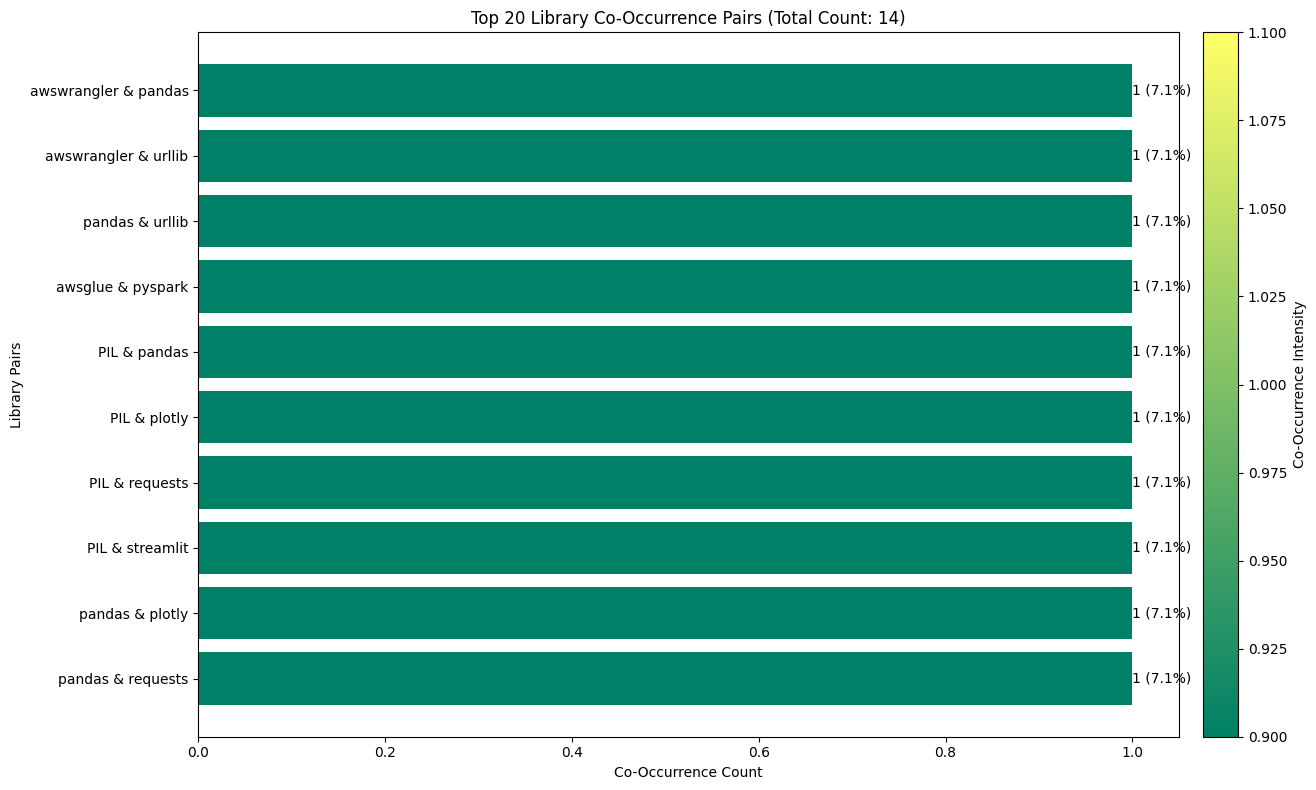

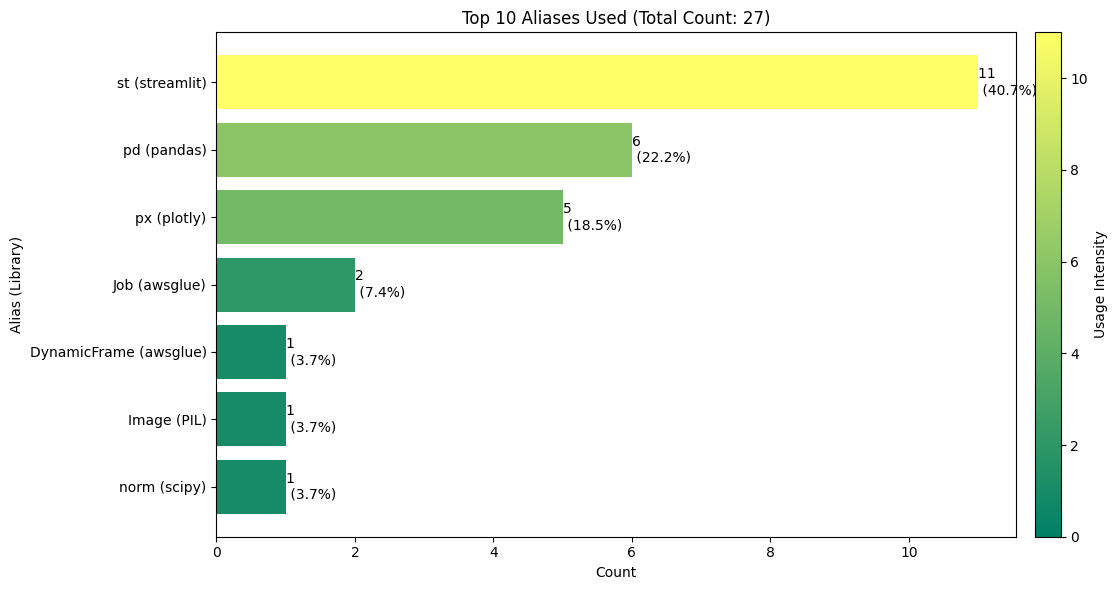

C:\Users\hkp10\AppData\Local\Temp\ipykernel_10444\1610939050.py:552: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  average_imports_df = average_imports_df.applymap(bold)


Imports per File:
+----------+-----------------------------+--------------------------+---------------------------------+-----------------------------------+
|  Sr. No  |           Metric            |  Average Count per File  |  Total Count (Number of Files)  |  Percentage of Total Imports (%)  |
+==========+=============================+==========================+=================================+===================================+
|    1     |      Number of Imports      |           7.78           |              68408              |                100                |
|          |          per File           |                          |                                 |                                   |
+----------+-----------------------------+--------------------------+---------------------------------+-----------------------------------+
|    2     |     Number of Standard      |           2.12           |              18648              |               27.26               |
| 

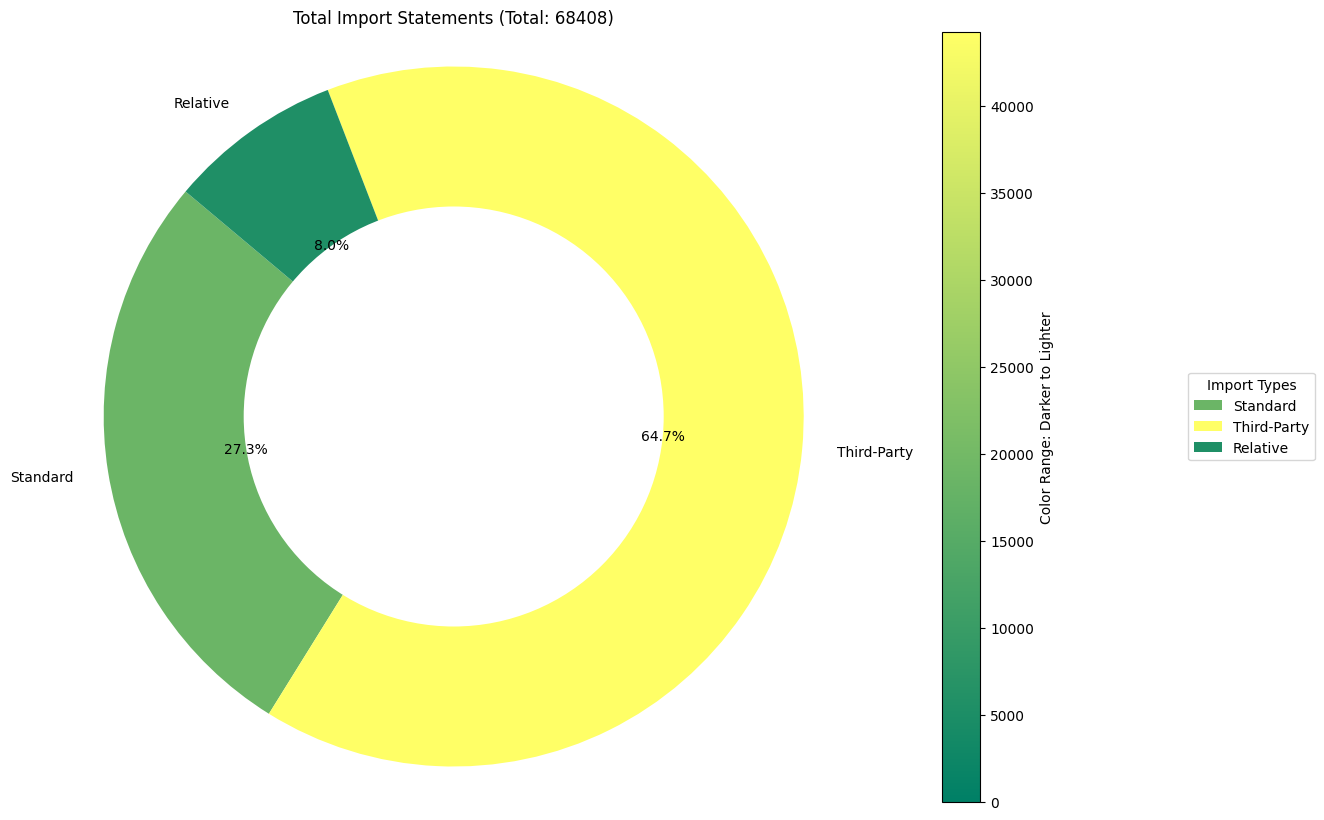

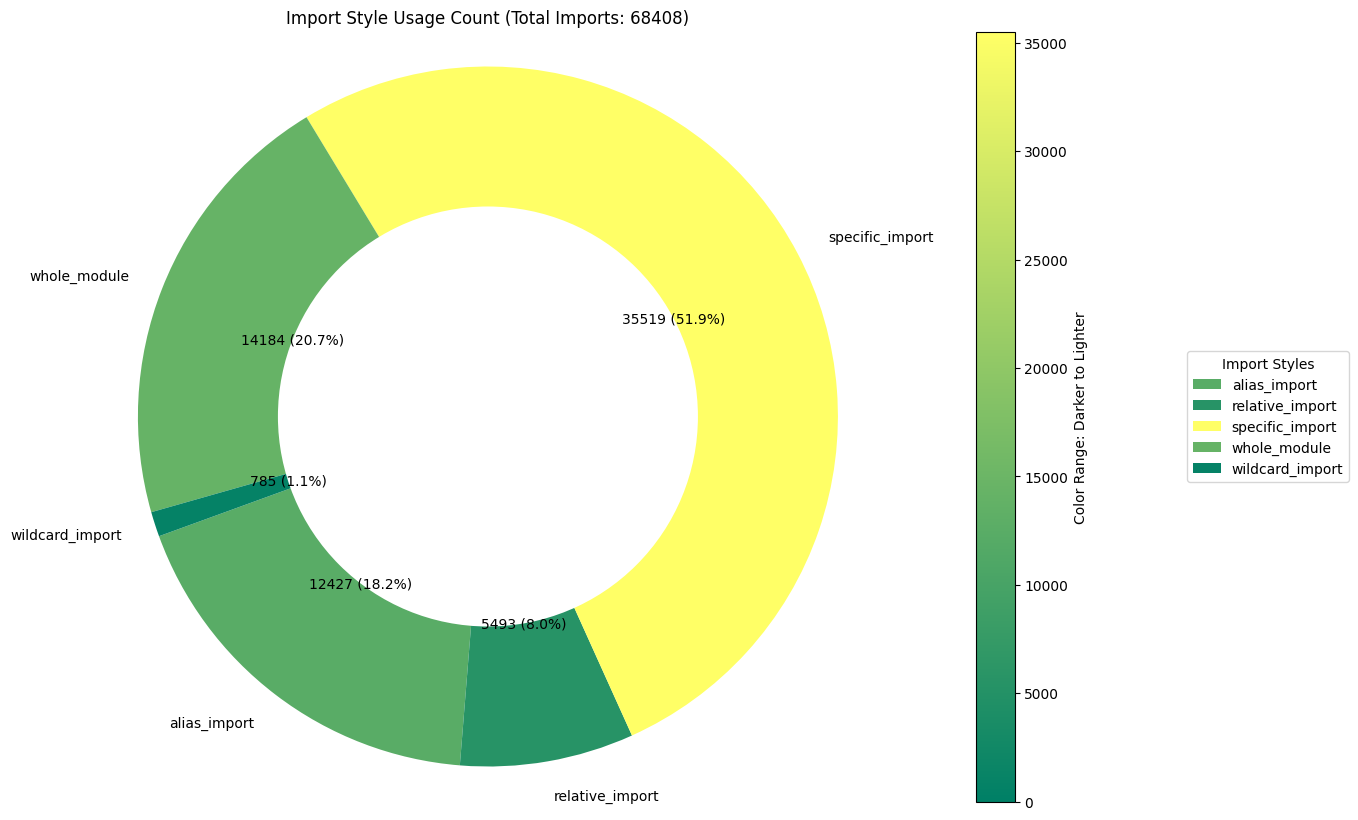

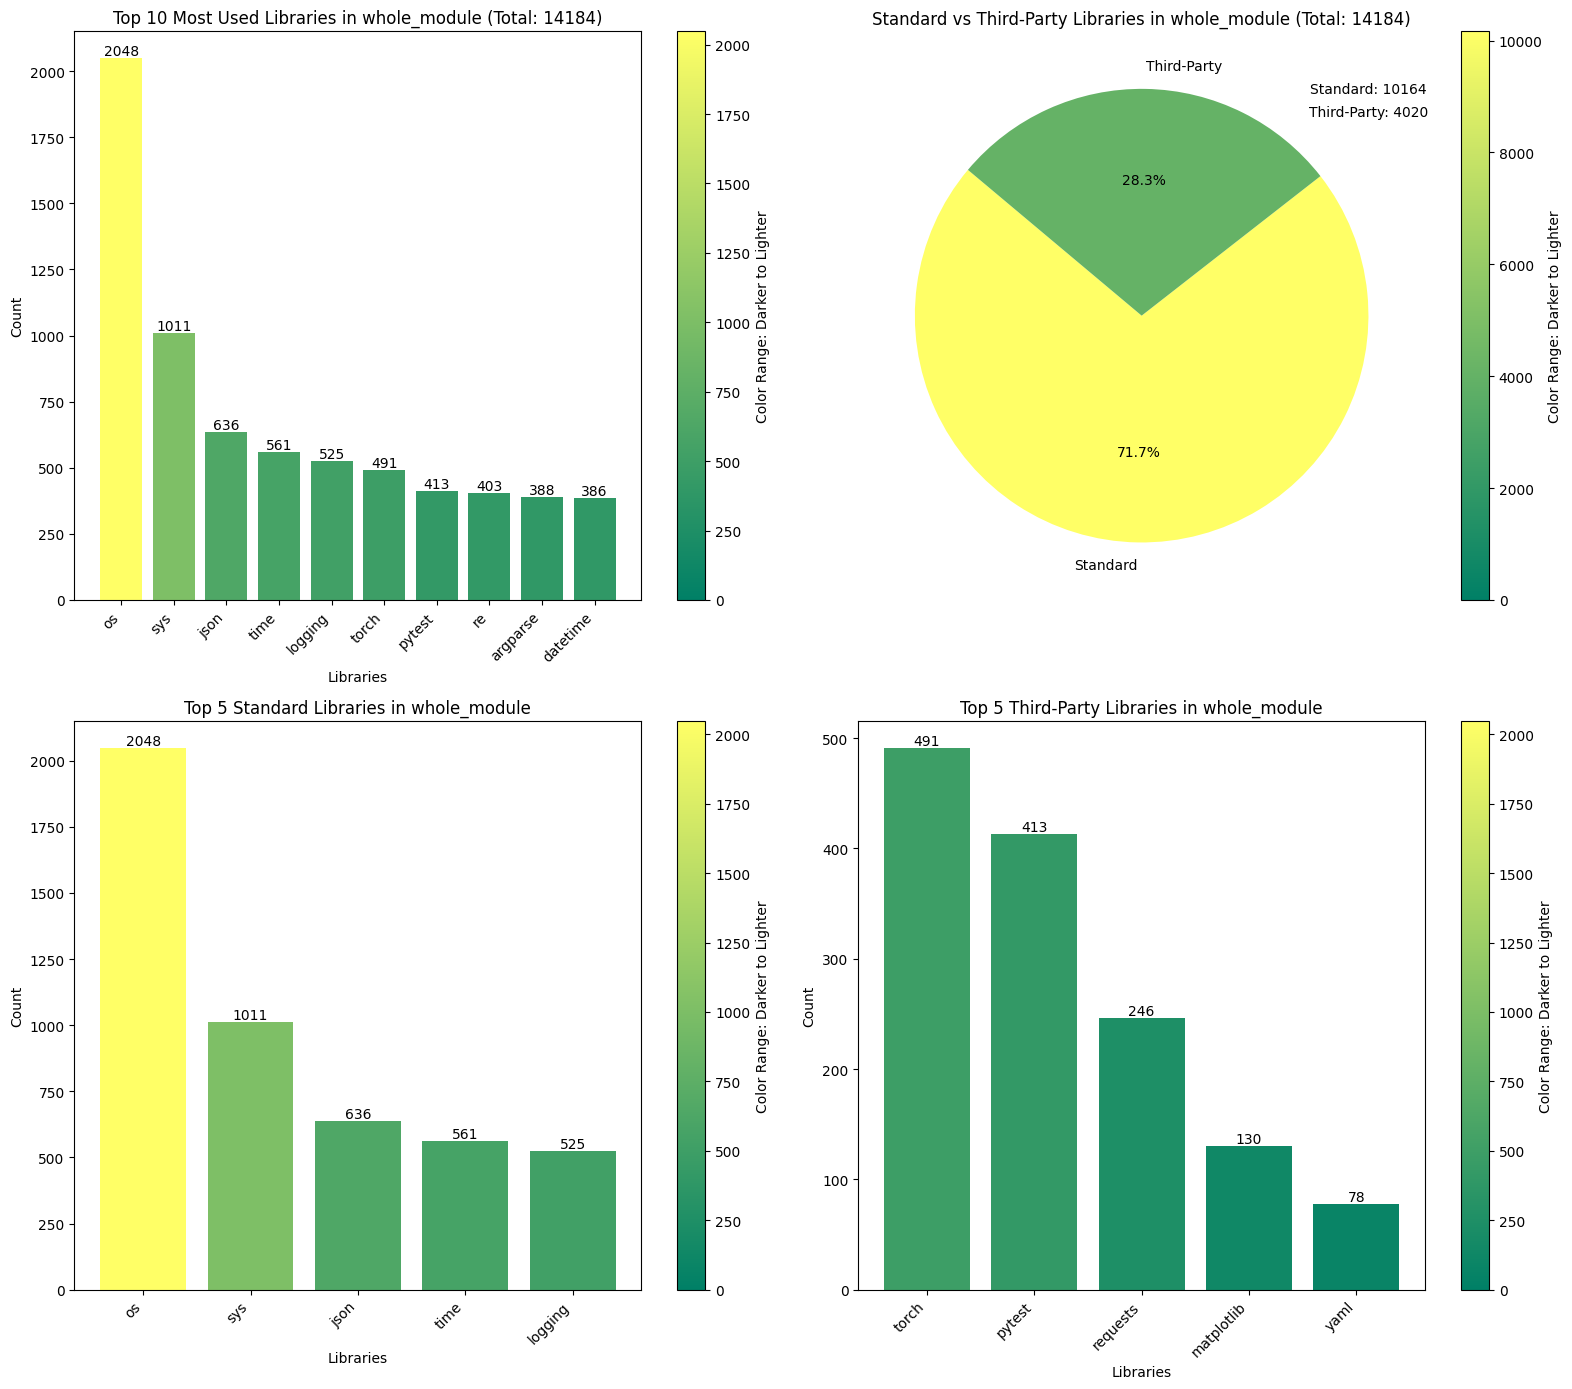

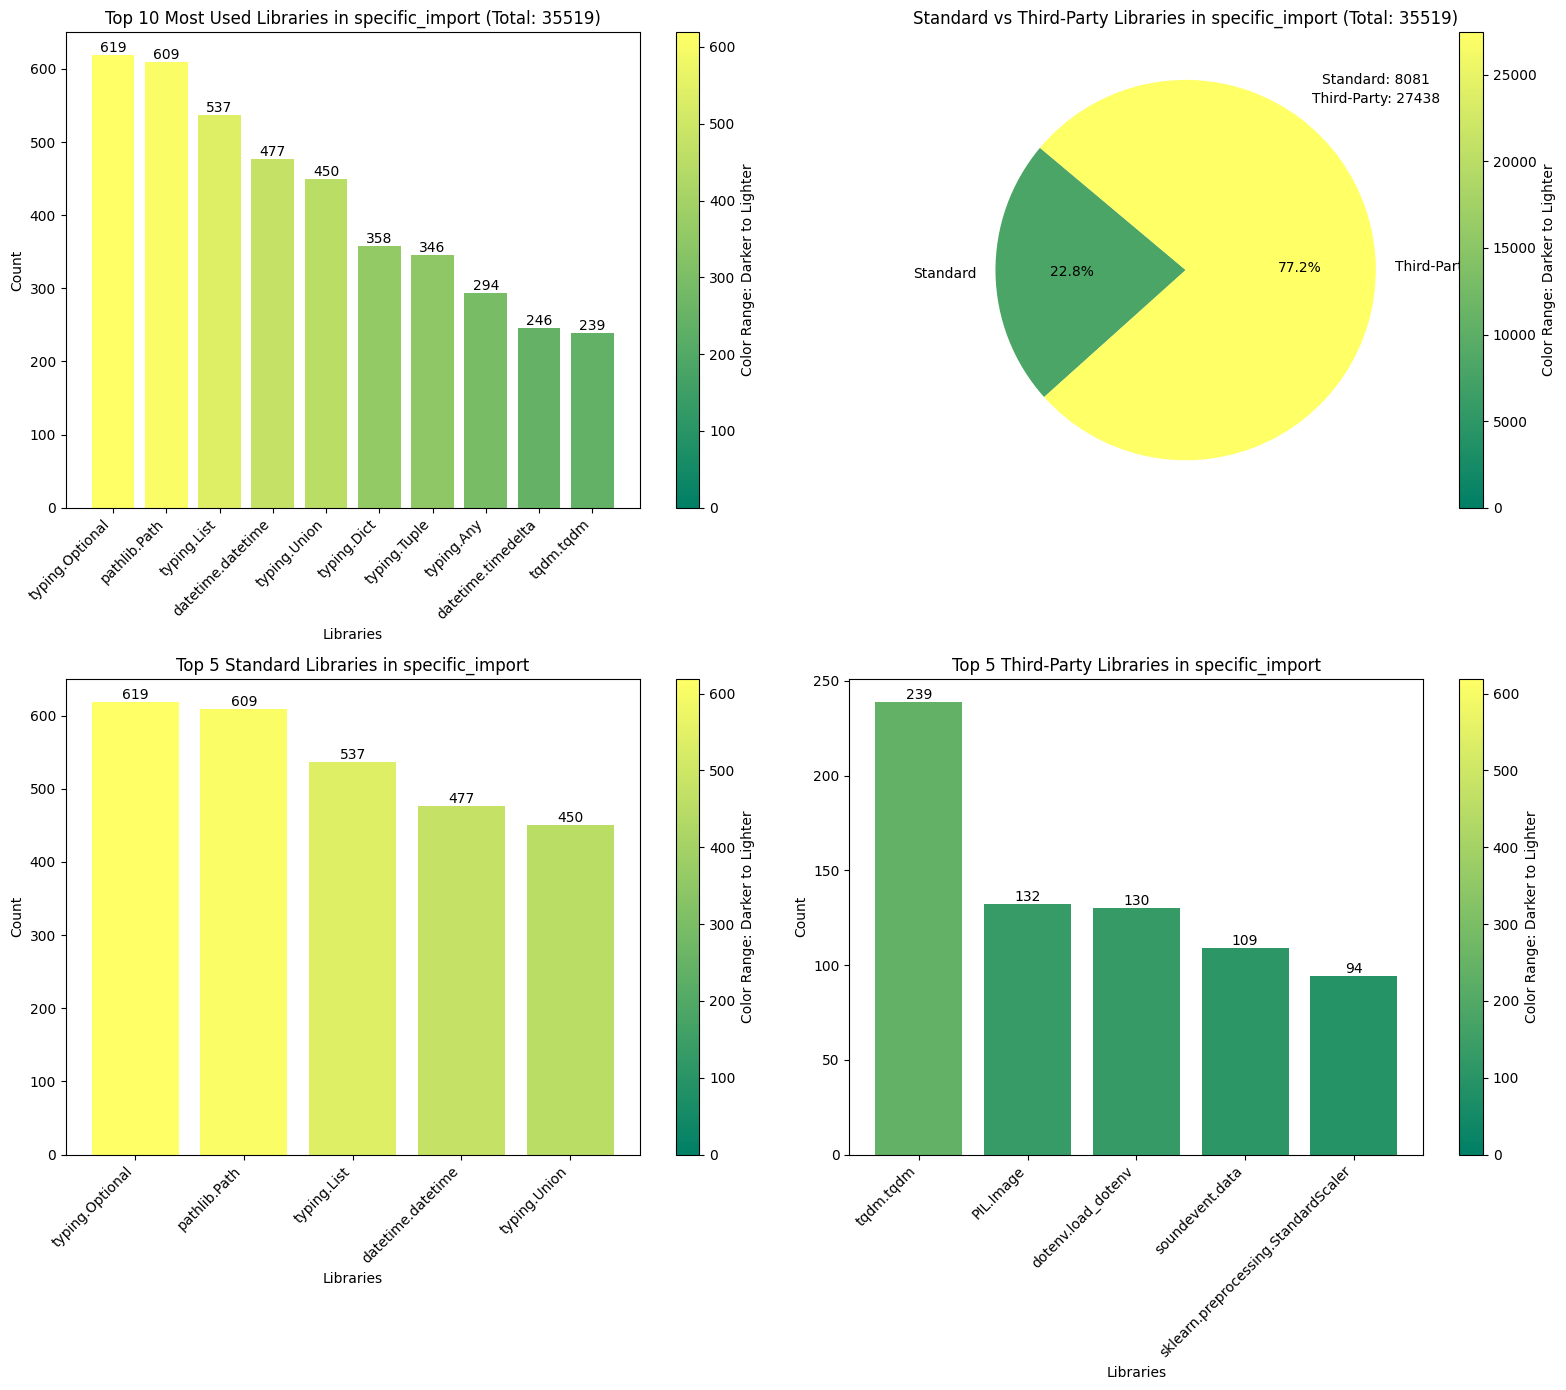

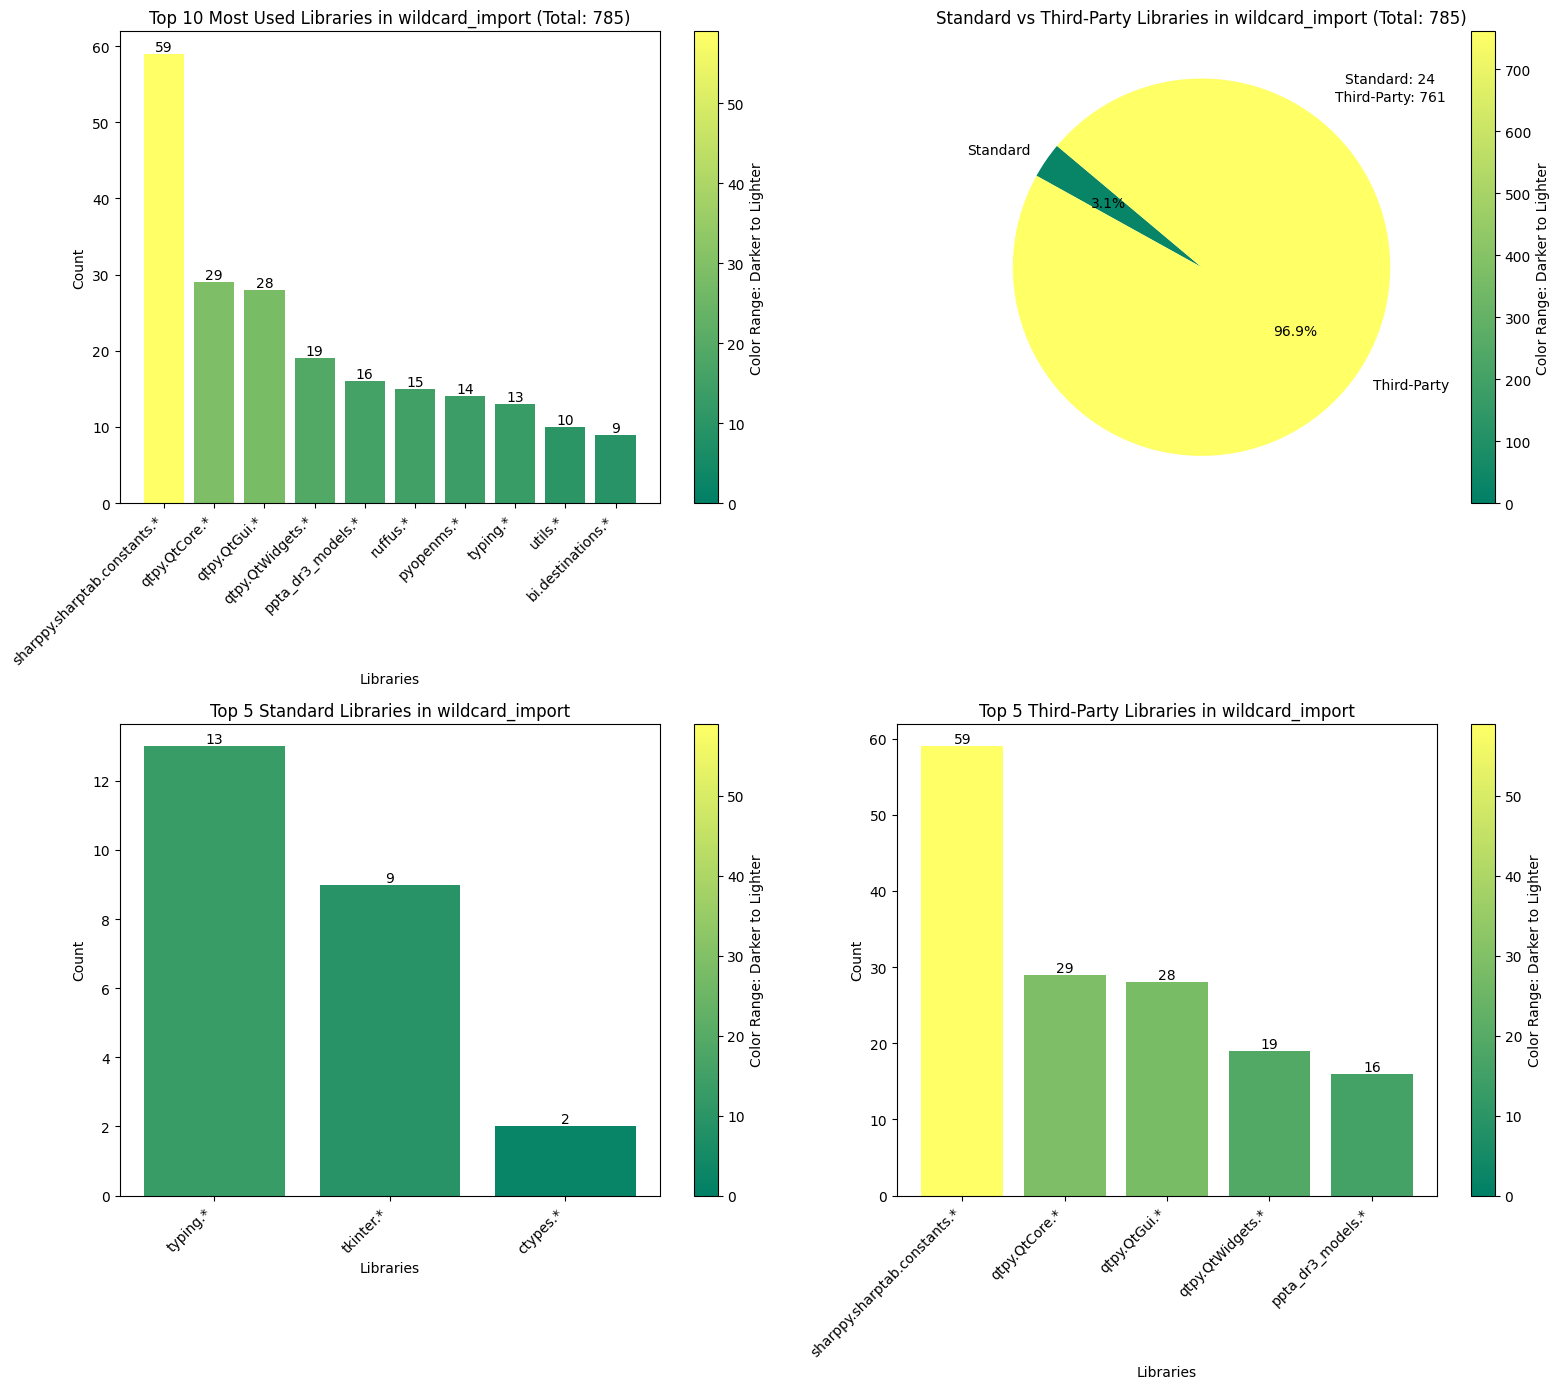

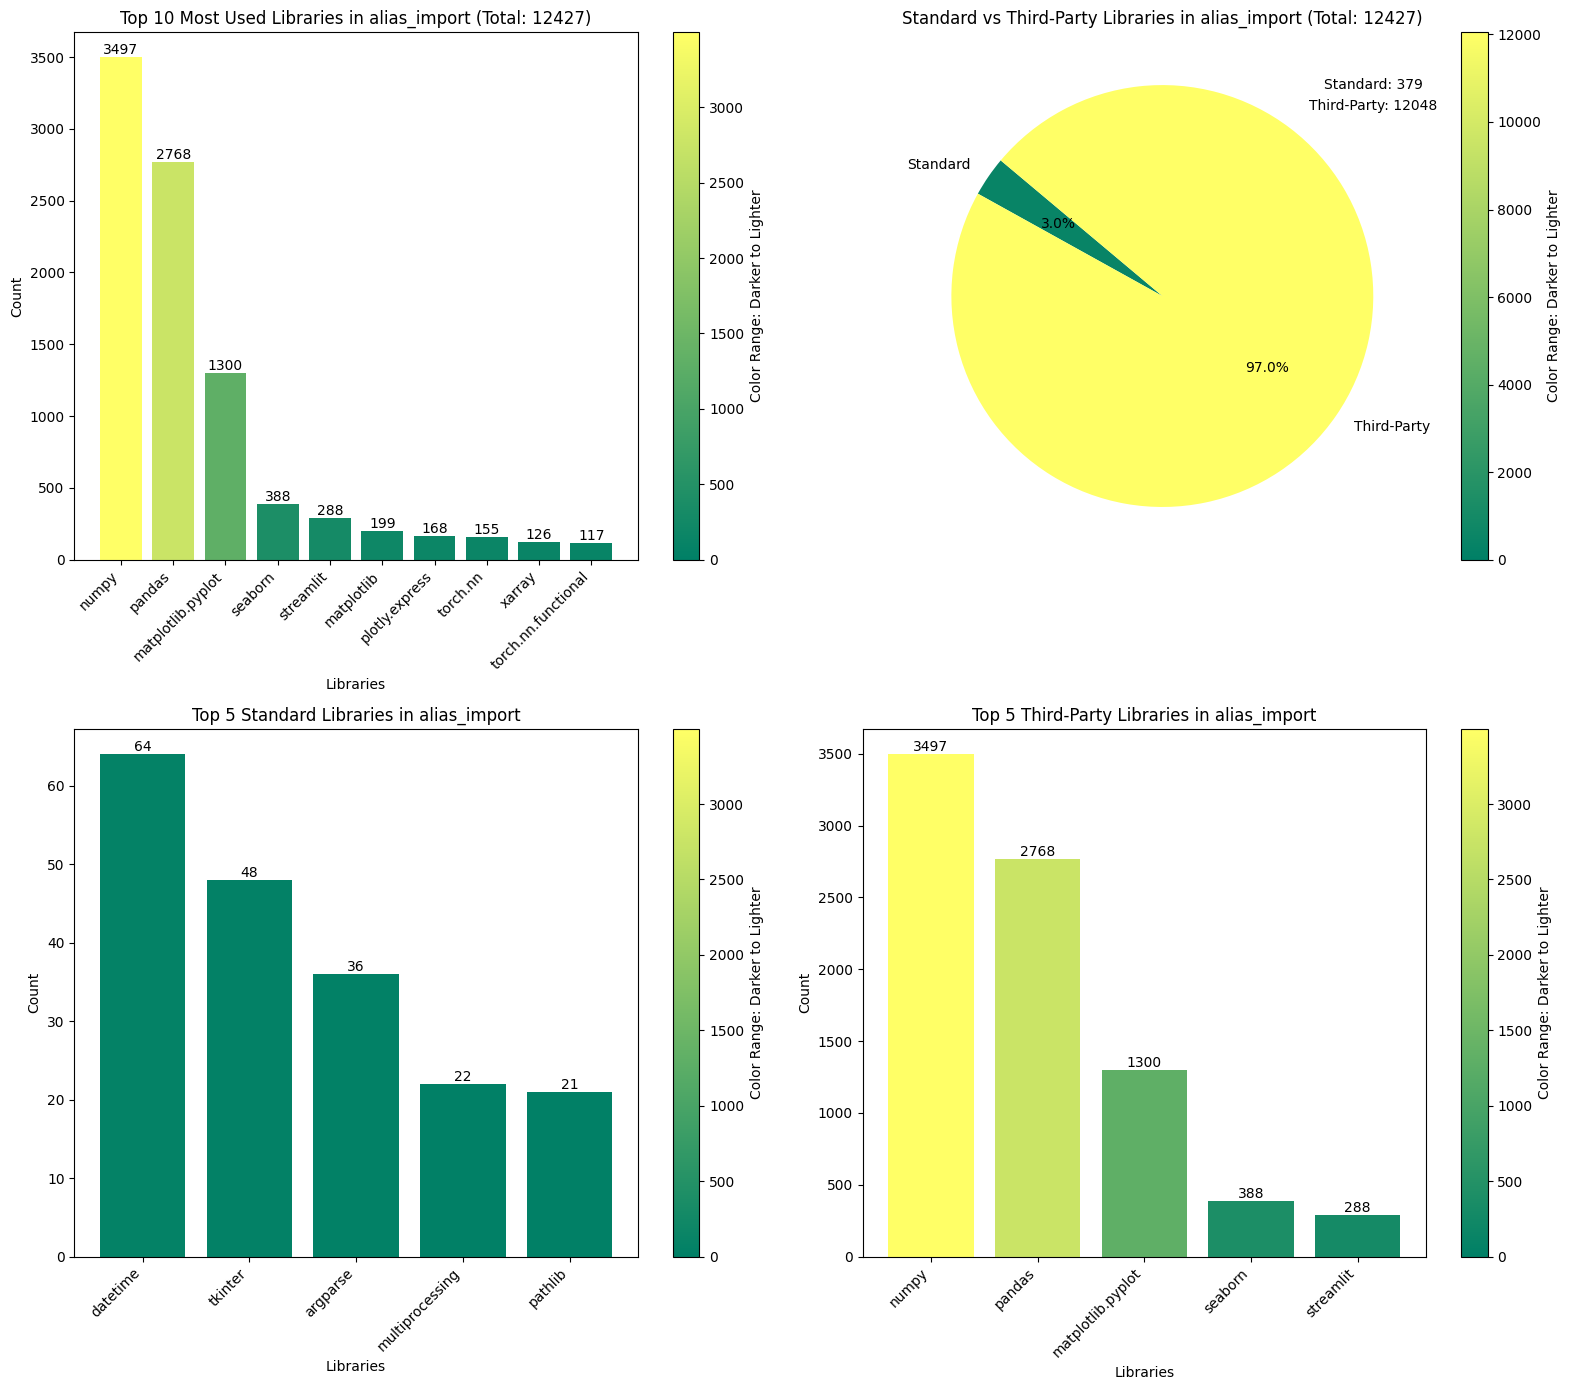

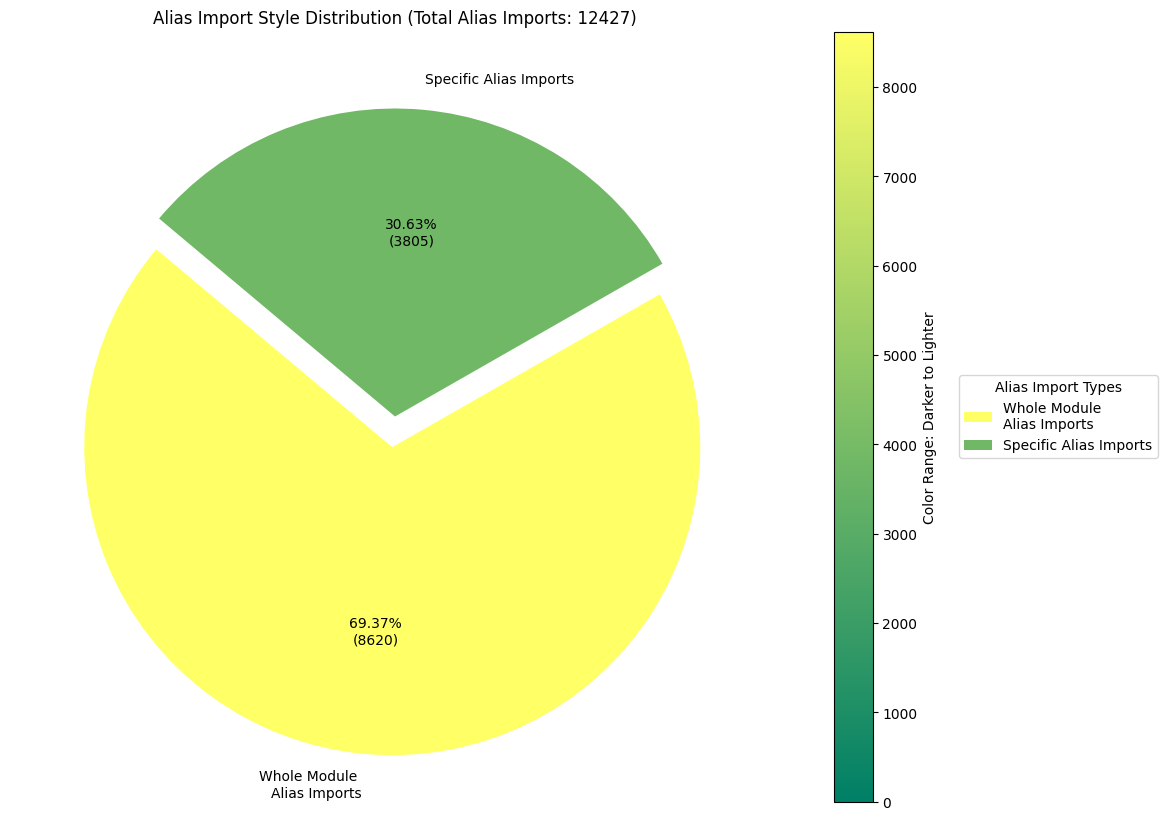

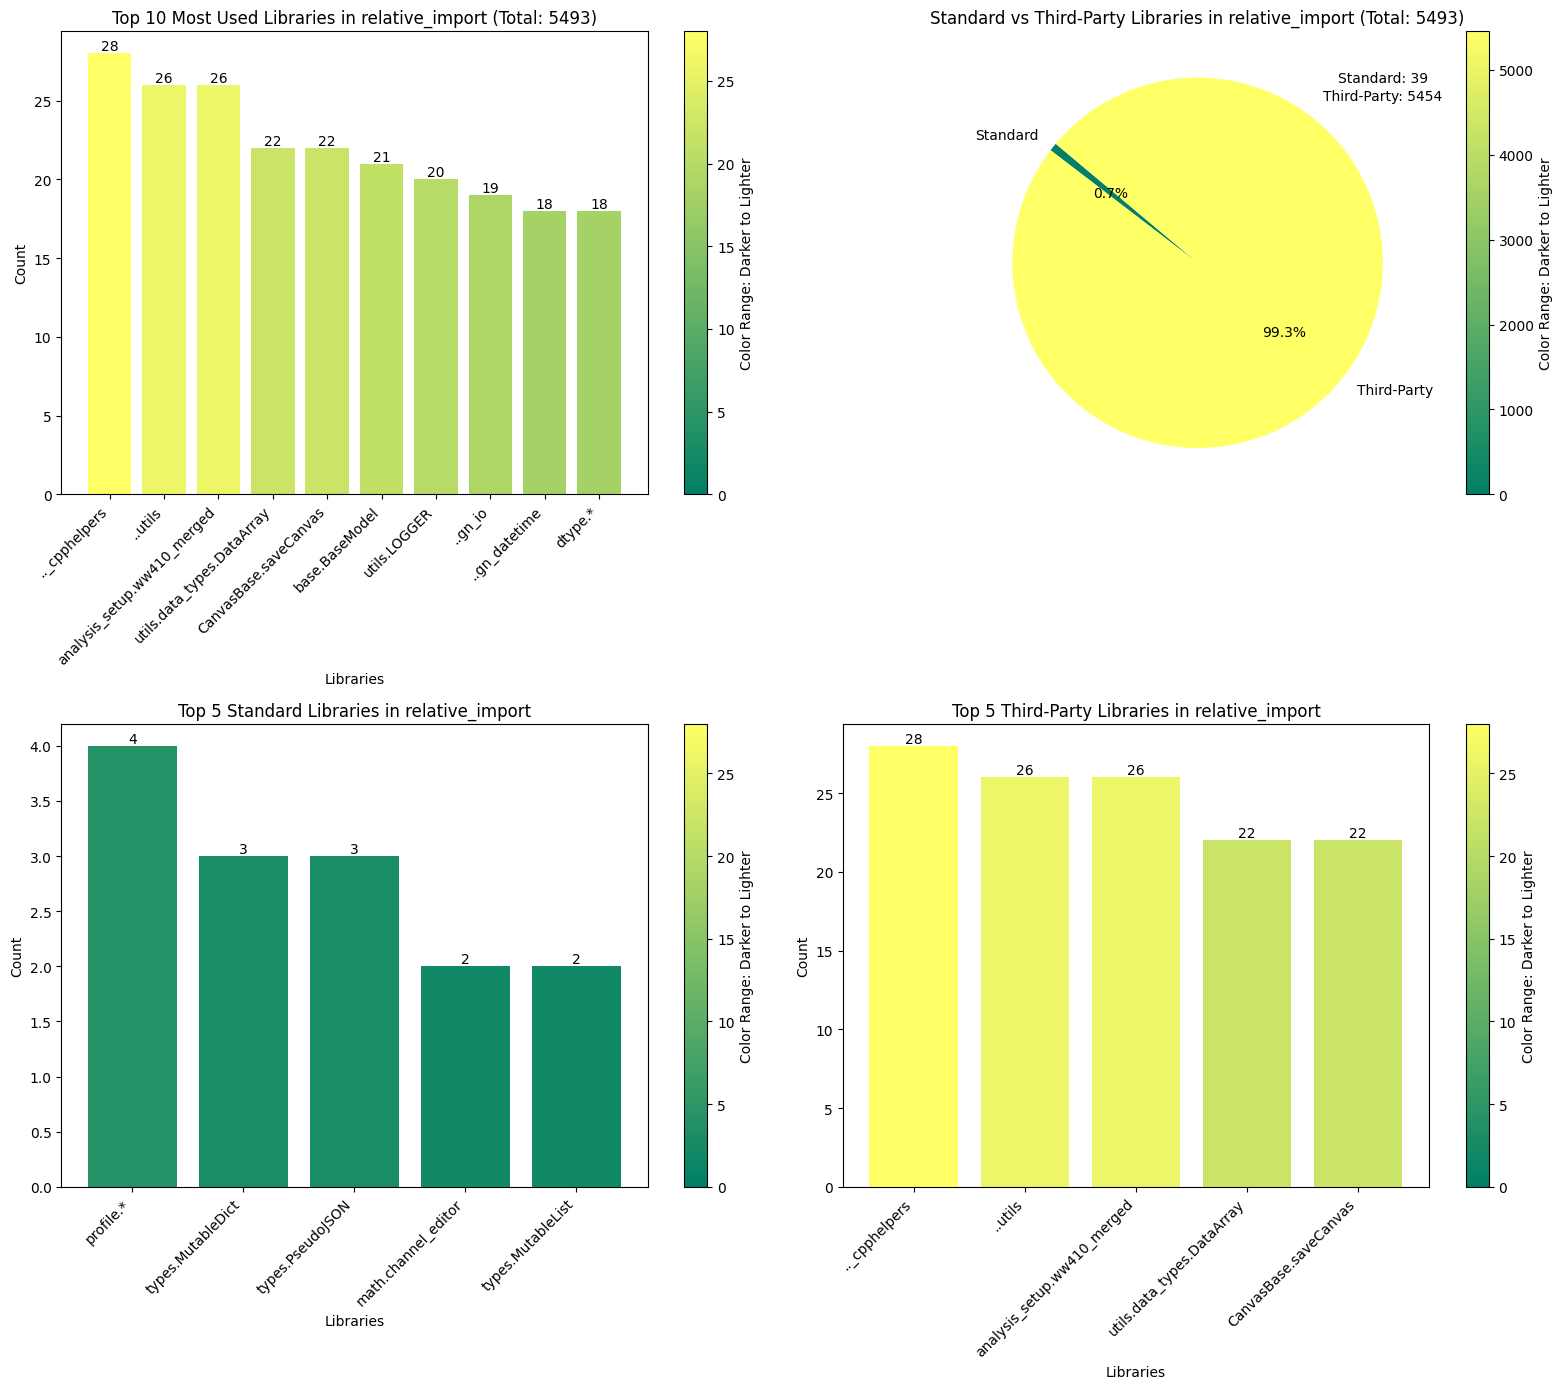

In [164]:
import pandas as pd
import sys
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import cm
from tabulate import tabulate
import numpy as np
from matplotlib import cm
from matplotlib.colors import Normalize
import seaborn as sns

# Read the data from the provided file
# file_path = '../MEET11WORKJULY/DataAnalysis_import_styles_report.txt'
# file_path = 'ML_import_styles_report.txt'
# file_path = 'Test_import_styles_report.txt'
file_path = 'DA_New2_import_styles_report.txt'
# file_path = 'WEB_import_styles_report.txt'
# file_path = 'FINAL_WEBimport_styles_report.txt'
# file_path = 'After_import_styles_report.txt'

# # Read the CSV file
# file_path2 = 'Test_function_usage_report.csv'
# file_path2 = 'WEB_function_usage_report.csv'
file_path2 = 'DA_New2_function_usage_report.csv'
# file_path2 = 'ML_function_usage_report.csv'
# file_path2 = 'FINAL_WEBfunction_usage_report.csv'
# file_path2 = 'After_function_usage_report.csv'


# file_path3 = pd.read_csv('Test_repo_analysis.csv')
# file_path3 = pd.read_csv('WEB_repo_analysis.csv')
file_path3 = pd.read_csv('DA_New2_repo_analysis.csv')
# file_path3 = pd.read_csv('ML_repo_analysis.csv')
# file_path3 = pd.read_csv('FINAL_WEBrepo_analysis.csv')
# file_path3 = pd.read_csv('After_repo_analysis.csv')

# file_path4 = pd.read_csv('Test_function_usage_report.csv')
# file_path4 = pd.read_csv('WEB_function_usage_report.csv')
file_path4 = pd.read_csv('DA_New2_repo_analysis.csv')
# file_path4 = pd.read_csv('ML_repo_analysis.csv')
# file_path4 = pd.read_csv('FINAL_WEBrepo_analysis.csv')
# file_path4 = pd.read_csv('After_repo_analysis.csv')


# Open the file with UTF-8 encoding
with open(file_path, 'r', encoding='utf-8') as file:
    data = file.read()

# Extract relevant information
def extract_value(keyword):
    return int(data.split(f"{keyword}: ")[1].split("\n")[0])

total_files_accessed = extract_value("Total number of files accessed")
files_with_no_imports = extract_value("Count for files with no imports")
files_not_accessed_due_to_errors = extract_value("Total files not accessed due to errors")
total_files = extract_value("Total number of files scanned")
total_repos_scanned = extract_value("Total repositories scanned")
total_repos_skipped = extract_value("Total repositories skipped")
total_repos = total_repos_scanned + total_repos_skipped



# Enhanced ANSI escape sequence for bold text that supports all types
def bold(x):
    if isinstance(x, (int, float)):
        x = f"{x:.2f}"  # Format numbers to two decimal places
    return f"\033[1m{x}\033[0m"

# File Counts Table with Serial Numbers
file_counts = {
    'Sr. No': list(range(1, 8)),  # Adding serial numbers
    'Metric': [
        'Total Repositories Analyzed', 
        'Repositories Successfully Scanned', 
        'Repositories Skipped', 
        'Total Files Analyzed', 
        'Files Successfully Accessed', 
        'Files with No Imports', 
        'Files Skipped Due to Errors'
    ],
    'Count': [
        total_repos,
        total_repos_scanned,
        total_repos_skipped,
        total_files,
        total_files_accessed,
        files_with_no_imports,
        files_not_accessed_due_to_errors
    ]
}

# Create DataFrame and apply bold formatting
file_counts_df = pd.DataFrame(file_counts)
file_counts_df = file_counts_df.applymap(bold)

# Print the table with center alignment and bold formatting
print("File Counts:")
print(tabulate(
    file_counts_df.values.tolist(),
    headers=[bold(header) for header in file_counts_df.columns],
    tablefmt="grid",
    stralign="center",  # Center-align text columns
    numalign="center"   # Center-align numeric columns
))

# Extract import styles information
import_styles_data = data.split("Import Styles Analysis:\n")[1].strip()
import_styles_lines = import_styles_data.split("\n")[1:]
# print(f"{import_styles_data}\n")
# print(import_styles_lines)

# Create a DataFrame from the import styles data
df = pd.DataFrame([line.split(",") for line in import_styles_lines], columns=["style", "module", "count"])
df["count"] = df["count"].astype(int)
# print(df)
# Calculate total imports
total_imports = df["count"].sum()
# print(total_imports)
# Define import styles
import_styles = ["whole_module", "specific_import", "wildcard_import", "alias_import", "relative_import"]

# Separate imports into standard, third-party, and relative libraries
standard_libs = set(sys.stdlib_module_names)
standard_imports = Counter()
third_party_imports = Counter()
relative_imports = Counter()

for _, row in df.iterrows():
    module_base = row["module"].split('.')[0] if row["module"] else ''
    if row["style"] in ["relative_import"]:
        relative_imports[row["module"]] += row["count"]
    elif module_base in standard_libs:
        standard_imports[row["module"]] += row["count"]
    elif row["module"] != 'None':
        third_party_imports[row["module"]] += row["count"]

# Calculate total imports for standard, third-party, and relative imports
total_standard_imports = sum(standard_imports.values())
total_third_party_imports = sum(third_party_imports.values())
total_relative_imports = sum(relative_imports.values())
# print(standard_imports)
# Calculate averages
average_imports_per_file = total_imports / total_files_accessed
average_standard_imports_per_file = total_standard_imports / total_files_accessed
average_third_party_imports_per_file = total_third_party_imports / total_files_accessed
average_relative_imports_per_file = total_relative_imports / total_files_accessed

# Aggregate counts for base modules
aggregated_standard_imports = Counter()
aggregated_third_party_imports = Counter()

for module, count in standard_imports.items():
    base_module = module.split('.')[0]
    aggregated_standard_imports[base_module] += count

for module, count in third_party_imports.items():
    base_module = module.split('.')[0]
    aggregated_third_party_imports[base_module] += count

# Function to get color from count
def get_color_from_count(count, max_count):
    return cm.summer(count / max_count if max_count else 0)


# print(aggregated_standard_imports)
# print(aggregated_third_party_imports)
# for library, count in aggregated_standard_imports.items():
#     print(f"{library}: {count}")
# for library, count in aggregated_third_party_imports.items():
#     print(f"{library}: {count}")

# Function to print the sorted libraries with ranks and percentages
def print_ranked_libraries(counter_data, title):
    sorted_imports = counter_data.most_common()
    total_count = sum(counter_data.values())

    print(f"{title}")
    print("Rank | Library           | Count | Percentage (%)")
    print("----------------------------------------------")
    for rank, (library, count) in enumerate(sorted_imports, start=1):
        percentage = (count / total_count) * 100
        print(f"{rank:4} | {library:<15} | {count:<5} | {percentage:>10.2f}")
    print("\n")  # Add a newline for better readability


# Print Standard Libraries
print_ranked_libraries(aggregated_standard_imports, "Standard Libraries:")

# Print Third-Party Libraries
print_ranked_libraries(aggregated_third_party_imports, "Third-Party Libraries:")

# Plotting top 20 standard modules and top 20 third-party modules
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

def plot_top_modules(ax, title, imports, top_n=10):
    top_modules = imports.most_common(top_n)
    total_count = sum(imports.values())
    max_count = max(count for _, count in top_modules)
    ax.bar([module for module, _ in top_modules], [count for _, count in top_modules],
           color=[get_color_from_count(count, max_count) for _, count in top_modules])
    ax.set_xlabel('Libraries')
    ax.set_ylabel('Count')
    ax.set_title(f'{title} (Total: {total_count})')
    # Set y-axis limits
    ax.set_ylim(0, max_count + 300)  
    # Add text for percentage
    for i, (module, count) in enumerate(top_modules):
        percentage = (count / total_count) * 100  # Calculate percentage
            # Apply color based on the percentage value
        if percentage > 10:
            color = 'green'  # More common modules in green
        elif percentage > 5:
            color = 'blue'   # Moderately common modules in blue
        else:
            color = 'red'    # Less common modules in red
        ax.text(i, count, f'{count}\n({percentage:.1f}%)', ha='center', va='bottom')  # Show count and percentage
    
    
    # for i, (module, count) in enumerate(top_modules):
    #     ax.text(i, count, str(count), ha='center', va='bottom')
    ax.set_xticks(range(len(top_modules)))
    ax.set_xticklabels([module for module, _ in top_modules], rotation=45, ha='right')
    sm = plt.cm.ScalarMappable(cmap=cm.summer, norm=plt.Normalize(vmin=0, vmax=max_count))
    sm.set_array([])
    fig.colorbar(sm, ax=ax, orientation='vertical', label='Color Range: Darker to Lighter')

plot_top_modules(axes[0, 0], 'Top 10 Standard Libraries', standard_imports)
plot_top_modules(axes[0, 1], 'Top 10 Aggregated Standard Libraries', aggregated_standard_imports)
plot_top_modules(axes[1, 0], 'Top 10 Third-Party Libraries', third_party_imports)
plot_top_modules(axes[1, 1], 'Top 10 Aggregated Third-Party Libraries', aggregated_third_party_imports)

plt.tight_layout()
plt.show()



# Load the data
df_functions = pd.read_csv(file_path2)

# Using sys.builtin_module_names
standard_libs = set(sys.stdlib_module_names)

# Function to categorize libraries
def categorize_library(row):
    if row['Core Imported Library'] in standard_libs:
        return 'standard'
    else:
        return 'third-party'

# Apply categorization
df_functions['Library Type'] = df_functions.apply(categorize_library, axis=1)

# Sum the usage counts for each library
library_usage = df_functions.groupby(['Core Imported Library', 'Library Type'])['Usage Count'].sum().reset_index(name='Total Usage')

# Select top 10 standard and third-party libraries based on their total usage counts
top_standard = library_usage[library_usage['Library Type'] == 'standard'].nlargest(10, 'Total Usage')['Core Imported Library'].tolist()
top_third_party = library_usage[library_usage['Library Type'] == 'third-party'].nlargest(10, 'Total Usage')['Core Imported Library'].tolist()

# Select standard libraries ranked from 11 to 20
standard_11_to_20 = library_usage[library_usage['Library Type'] == 'standard'].nlargest(20, 'Total Usage').iloc[10:20]['Core Imported Library'].tolist()

# Select third-party libraries ranked from 11 to 20
third_party_11_to_20 = library_usage[library_usage['Library Type'] == 'third-party'].nlargest(20, 'Total Usage').iloc[10:20]['Core Imported Library'].tolist()

def get_y_axis_padding(max_count):
    # Calculate padding as 30% of the max_count
    padding = int(max_count * 0.125)
    # Ensure padding is within the range 100 to 5000
    return max(100, min(padding, 10000))


def plot_functions(ax, library, df, library_type):
    sub_df = df[df['Core Imported Library'] == library]
    total_usage = sub_df['Usage Count'].sum()
    function_usage = sub_df.groupby('Function')['Usage Count'].sum().nlargest(10)
    names = function_usage.index.tolist()
    values = function_usage.values
    max_count = max(values, default=0)

    padding = get_y_axis_padding(max_count)
    ax.set_ylim(0, max_count + padding)

    colors = [cm.summer(value / max_count) for value in values]
    bars = ax.bar(names, values, color=colors)
    ax.set_title(f'Top 10 Functions in {library} (Total: {total_usage})', fontsize=14)
    ax.set_xlabel('Functions', fontsize=12)
    ax.set_ylabel('Usage Count', fontsize=12)
    ax.tick_params(axis='x', labelsize=10)  # Set tick label size

    for i, label in enumerate(ax.get_xticklabels()):
        if len(label.get_text()) > 5:
            label.set_rotation(45)
            label.set_ha('right')
        else:
            label.set_rotation(0)

    for bar, value in zip(bars, values):
        percentage = (value / sum(values)) * 100 if sum(values) > 0 else 0
        ax.text(bar.get_x() + bar.get_width() / 2, value, f'{int(value)}\n({percentage:.1f}%)', ha='center', va='bottom', fontsize=9)

    sm = cm.ScalarMappable(cmap=cm.summer, norm=Normalize(vmin=0, vmax=max_count))
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, orientation='vertical', label='Usage Count Scale')
    cbar.ax.set_ylabel('Usage Count Scale', fontsize=12)  # Set font size for color bar label

# Assuming top_standard and top_third_party are defined and df_functions is loaded
# Create and adjust the plots
fig1, axs1 = plt.subplots(5, 2, figsize=(18, 34))
fig2, axs2 = plt.subplots(5, 2, figsize=(18, 34))
fig1.subplots_adjust(hspace=0.5)
fig2.subplots_adjust(hspace=0.5)
fig3, axs3 = plt.subplots(5, 2, figsize=(18, 34))
fig4, axs4 = plt.subplots(5, 2, figsize=(18, 34))
fig3.subplots_adjust(hspace=0.5)
fig4.subplots_adjust(hspace=0.5)

# for i, lib in enumerate(top_standard):
#     plot_functions(axs1[i // 2, i % 2], lib, df_functions, 'Standard')
# for i, lib in enumerate(standard_11_to_20):
#     plot_functions(axs3[i // 2, i % 2], lib, df_functions, 'Standard')

# for i, lib in enumerate(top_third_party):
#     plot_functions(axs2[i // 2, i % 2], lib, df_functions, 'Third-party')
# for i, lib in enumerate(third_party_11_to_20):
#     plot_functions(axs4[i // 2, i % 2], lib, df_functions, 'Third-party')

fig1.suptitle('Top 10 Functions in Top 10 Standard Libraries', fontsize=14)
fig2.suptitle('Top 10 Functions in Top 10 Third-Party Libraries', fontsize=14)


fig1.tight_layout(rect=[0, 0, 1, 0.97])  # Tight layout with custom rect
fig2.tight_layout(rect=[0, 0, 1, 0.97])  # Tight layout with custom rect
fig3.suptitle('Top 10 Functions in Top 10 Standard Libraries', fontsize=14)
fig4.suptitle('Top 10 Functions in Top 10 Third-Party Libraries', fontsize=14)


fig3.tight_layout(rect=[0, 0, 1, 0.97])  # Tight layout with custom rect
fig4.tight_layout(rect=[0, 0, 1, 0.97])  # Tight layout with custom rect
# plt.show()


# plt.show()


from collections import Counter
import sys
import matplotlib.pyplot as plt
from itertools import combinations
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# Assuming df_functions DataFrame is already defined with necessary data
file_path2 = 'function_usage_report.csv'
# Load the data
df_functions = pd.read_csv(file_path2)

# Use sys.stdlib_module_names to get the standard libraries
standard_libs = set(sys.stdlib_module_names)

df_functions['Core Imported Library'] = df_functions['Core Imported Library'].astype(str)

# Group data by Repository and File Path, and collect all libraries used in the same file
co_occurrence = df_functions.groupby(['Repository', 'File Path'])['Core Imported Library'].apply(set).reset_index()

# Generate pairs of libraries that appear together in the same file
co_occurrence['Library Pairs'] = co_occurrence['Core Imported Library'].apply(lambda x: list(combinations(sorted(x), 2)))

# Flatten the list of pairs and count occurrences
pairs_list = [pair for sublist in co_occurrence['Library Pairs'] for pair in sublist]
pairs_count = Counter(pairs_list)

# Separate standard and third-party library pairs
standard_pairs = Counter({pair: count for pair, count in pairs_count.items() if pair[0] in standard_libs and pair[1] in standard_libs})
third_party_pairs = Counter({pair: count for pair, count in pairs_count.items() if pair[0] not in standard_libs and pair[1] not in standard_libs})
print(standard_pairs)
print(third_party_pairs)
# Calculate the total counts for all standard and third-party library pairs
total_standard_count = sum(standard_pairs.values())
total_third_party_count = sum(third_party_pairs.values())

# Function to plot co-occurrence graphs
def plot_co_occurrence(pairs_count, total_count, title):
    top_10_pairs = pairs_count.most_common(10)
    pairs, counts = zip(*top_10_pairs) if top_10_pairs else ([], [])
    percentages = [count / total_count * 100 for count in counts] if total_count > 0 else []

    plt.figure(figsize=(14, 8))
    norm = Normalize(vmin=min(counts) if counts else 0, vmax=max(counts) if counts else 1)
    colors = [cm.summer(norm(value)) for value in counts]

    bars = plt.barh([f"{pair[0]} & {pair[1]}" for pair in reversed(pairs)], list(reversed(counts)), color=list(reversed(colors)))
    plt.xlabel('Co-Occurrence Count')
    plt.ylabel('Library Pairs')
    plt.title(f'{title} (Total Co-Occurrences: {total_count})')

    # Add count and percentage as labels on the bars
    for bar, count, percentage in zip(bars, reversed(counts), reversed(percentages)):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{count} ({percentage:.1f}%)', va='center', ha='left', fontsize=10)

    # Add a color bar
    sm = cm.ScalarMappable(cmap=cm.summer, norm=norm)
    sm.set_array(counts)
    cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical', pad=0.02)
    cbar.set_label('Co-Occurrence Intensity')

    plt.tight_layout()
    plt.show()

# Plot for standard libraries
plot_co_occurrence(standard_pairs, total_standard_count, 'Top 10 Standard Library Co-Occurrence Pairs')

# Plot for third-party libraries
plot_co_occurrence(third_party_pairs, total_third_party_count, 'Top 10 Third-Party Library Co-Occurrence Pairs')


import networkx as nx
from itertools import combinations

df_functions['Core Imported Library'] = df_functions['Core Imported Library'].astype(str)

# Group data by Repository and File Path, and collect all libraries used in the same file
co_occurrence = df_functions.groupby(['Repository', 'File Path'])['Core Imported Library'].apply(set).reset_index()

# Generate pairs of libraries that appear together in the same file
co_occurrence['Library Pairs'] = co_occurrence['Core Imported Library'].apply(lambda x: list(combinations(sorted(x), 2)))

# Flatten the list of pairs and count occurrences
pairs_list = [pair for sublist in co_occurrence['Library Pairs'] for pair in sublist]
pairs_count = Counter(pairs_list)
total_count = sum(pairs_count.values())
print(pairs_count)
# Get the top 20 pairs based on co-occurrence count
top_20_pairs = pairs_count.most_common(10)
pairs, counts = zip(*top_20_pairs)
# total_count = sum(counts)
percentages = [count / total_count * 100 for count in counts]

# Plot the bar chart
plt.figure(figsize=(14, 8))
norm = Normalize(vmin=min(counts), vmax=max(counts))
colors = [cm.summer(norm(value)) for value in counts]

bars = plt.barh([f"{pair[0]} & {pair[1]}" for pair in reversed(pairs)], list(reversed(counts)), color=list(reversed(colors)))
plt.xlabel('Co-Occurrence Count')
plt.ylabel('Library Pairs')
plt.title(f'Top 20 Library Co-Occurrence Pairs (Total Count: {total_count})')

# Add count and percentage as labels on the bars
for bar, count, percentage in zip(bars, reversed(counts), reversed(percentages)):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{count} ({percentage:.1f}%)', va='center', ha='left', fontsize=10)

# Add a color bar
sm = cm.ScalarMappable(cmap=cm.summer, norm=norm)
sm.set_array(counts)
cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical', pad=0.02)
cbar.set_label('Co-Occurrence Intensity')

plt.tight_layout()
# plt.gca().invert_yaxis()  # Invert y-axis to have the top library at the top
plt.show()





# Filter out empty aliases
df_functions = df_functions[df_functions['Alias'].notna() & (df_functions['Alias'] != '')]

# Count the usage of each alias with its associated library
alias_library_counts = df_functions.groupby(['Alias', 'Core Imported Library']).size().reset_index(name='count')

# Get the top 10 aliases with their associated libraries
top_aliases = alias_library_counts.groupby('Alias')['count'].sum().nlargest(10).index
top_aliases_with_libraries = alias_library_counts[alias_library_counts['Alias'].isin(top_aliases)]

# Prepare labels combining alias and library name
top_aliases_with_libraries['label'] = top_aliases_with_libraries['Alias'] + " (" + top_aliases_with_libraries['Core Imported Library'] + ")"

# Aggregate counts for these top aliases
aggregated_alias_counts = top_aliases_with_libraries.groupby('label')['count'].sum().sort_values(ascending=False).head(10)

# Plot bar chart for top 10 aliases used with library names
fig, ax = plt.subplots(figsize=(12, 6))
norm = Normalize(vmin=0, vmax=aggregated_alias_counts.max())
colors = cm.summer(norm(aggregated_alias_counts.values))

bars = ax.barh(aggregated_alias_counts.index, aggregated_alias_counts.values, color=colors)
ax.set_xlabel('Count')
ax.set_ylabel('Alias (Library)')
ax.set_title(f'Top 10 Aliases Used (Total Count: {sum(aggregated_alias_counts)})')
plt.tight_layout()

# Add count and percentage as labels on the bars
total_alias_count = aggregated_alias_counts.sum()
for index, value in enumerate(aggregated_alias_counts.values):
    ax.text(value, index, f'{value} \n ({value / total_alias_count * 100:.1f}%)', va='center')

# Add a color bar
sm = cm.ScalarMappable(cmap=cm.summer, norm=norm)
sm.set_array(aggregated_alias_counts.values)
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('Usage Intensity')

ax.invert_yaxis()  # Invert y-axis to have the top item at the top
plt.show()

# Calculate percentages
percentage_standard_imports = (total_standard_imports / total_imports) * 100
percentage_third_party_imports = (total_third_party_imports / total_imports) * 100
percentage_relative_imports = (total_relative_imports / total_imports) * 100

# Enhanced ANSI escape sequence for bold text that supports all types
def bold(x):
    if isinstance(x, (int, float)):
        x = f"{x:.2f}"  # Format numbers to two decimal places for consistency
    return "\n".join([f"\033[1m{line}\033[0m" for line in str(x).split("\n")])

# Imports per File Table with Total Counts, Percentages, and Serial Numbers
average_imports_data = {
    'Sr. No': [1, 2, 3, 4],
    'Metric': [
        'Number of Imports\nper File',
        'Number of Standard\nLibraries Imported per File',
        'Number of Third-Party\nLibraries Imported per File',
        'Number of Relative\nImports per File'
    ],
    'Average Count per File': [
        round(average_imports_per_file, 2),
        round(average_standard_imports_per_file, 2),
        round(average_third_party_imports_per_file, 2),
        round(average_relative_imports_per_file, 2)
    ],
    'Total Count (Number of Files)': [
        total_imports,
        total_standard_imports,
        total_third_party_imports,
        total_relative_imports
    ],
    'Percentage of Total Imports (%)': [
        round(100.0, 2),  # Total imports represent 100% of the imports
        round(percentage_standard_imports, 2),
        round(percentage_third_party_imports, 2),
        round(percentage_relative_imports, 2)
    ]
}


# Create DataFrame
average_imports_df = pd.DataFrame(average_imports_data)
# Create DataFrame and apply bold formatting
average_imports_df = pd.DataFrame(average_imports_data)
average_imports_df = average_imports_df.applymap(bold)

# Print the table with center alignment
print("Imports per File:")
print(tabulate(
    average_imports_df.values.tolist(),
    headers=[bold(header) for header in average_imports_df.columns],
    tablefmt="grid",
    stralign="center",  # Center-align text columns
    numalign="center"   # Center-align numeric columns
))



# Pie chart for total import statements
plt.figure(figsize=(14, 10))
total_import_counts = [total_standard_imports, total_third_party_imports, total_relative_imports]
total_import_labels = ['Standard', 'Third-Party', 'Relative']
wedges, texts, autotexts = plt.pie(
    total_import_counts,
    labels=total_import_labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=[get_color_from_count(count, max(total_import_counts)) for count in total_import_counts]
)
plt.axis('equal')
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(wedges, total_import_labels, title="Import Types", loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
sm = plt.cm.ScalarMappable(cmap=cm.summer, norm=plt.Normalize(vmin=0, vmax=max(total_import_counts)))
sm.set_array([])
fig.colorbar(sm, ax=plt.gca(), orientation='vertical', label='Color Range: Darker to Lighter')
plt.title(f'Total Import Statements (Total: {total_imports})')
plt.show()

# Plotting import style usage counts
import_style_counts = df.groupby("style")["count"].sum().to_dict()
plt.figure(figsize=(14, 10))
styles = list(import_style_counts.keys())
counts = list(import_style_counts.values())
total_imports = sum(counts)
max_count_style = max(counts)

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{val} ({pct:.1f}%)'
    return my_format

wedges, texts, autotexts = plt.pie(
    counts,
    labels=styles,
    autopct=autopct_format(counts),
    startangle=200,
    colors=[get_color_from_count(count, max_count_style) for count in counts]
)
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.legend(wedges, styles, title="Import Styles", loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
sm = plt.cm.ScalarMappable(cmap=cm.summer, norm=plt.Normalize(vmin=0, vmax=max(counts)))
sm.set_array([])
fig.colorbar(sm, ax=plt.gca(), orientation='vertical', label='Color Range: Darker to Lighter')
plt.title(f'Import Style Usage Count (Total Imports: {total_imports})')
plt.show()

# Plotting graphs for each import style showing top 10 most used libraries and their classification
for style in import_styles:
    style_df = df[df["style"] == style]
    style_counts = Counter()
    standard_counts = Counter()
    third_party_counts = Counter()
    
    for _, row in style_df.iterrows():
        module_base = row["module"].split('.')[0] if row["module"] else ''
        if module_base in standard_libs:
            standard_counts[row["module"]] += row["count"]
        else:
            third_party_counts[row["module"]] += row["count"]
        style_counts[row["module"]] += row["count"]

    if not style_counts:
        continue  # Skip plotting if no counts available

    total_style_imports = sum(style_counts.values())
    top_10_style_counts = style_counts.most_common(10)
    top_5_standard_counts = standard_counts.most_common(5)
    top_5_third_party_counts = third_party_counts.most_common(5)
    max_count_style = max(count for _, count in top_10_style_counts)

    fig, axes = plt.subplots(2, 2, figsize=(16, 14))

    def plot_bar(ax, title, counts):
        bars = ax.bar([module for module, _ in counts], [count for _, count in counts],
                      color=[get_color_from_count(count, max_count_style) for _, count in counts])
        ax.set_xlabel('Libraries')
        ax.set_ylabel('Count')
        ax.set_title(title)
        for i, (module, count) in enumerate(counts):
            ax.text(i, count, str(count), ha='center', va='bottom')
        ax.set_xticks(range(len(counts)))
        ax.set_xticklabels([module for module, _ in counts], rotation=45, ha='right')
        sm = plt.cm.ScalarMappable(cmap=cm.summer, norm=plt.Normalize(vmin=0, vmax=max_count_style))
        sm.set_array([])
        fig.colorbar(sm, ax=ax, orientation='vertical', label='Color Range: Darker to Lighter')

    plot_bar(axes[0, 0], f'Top 10 Most Used Libraries in {style} (Total: {total_style_imports})', top_10_style_counts)

    std_vs_tp_counts = [sum(standard_counts.values()), sum(third_party_counts.values())]
    if sum(std_vs_tp_counts) > 0:
        std_vs_tp_labels = ['Standard', 'Third-Party']
        axes[0, 1].pie(std_vs_tp_counts, labels=std_vs_tp_labels, autopct='%1.1f%%', startangle=140,
                       colors=[get_color_from_count(count, max(std_vs_tp_counts)) for count in std_vs_tp_counts])
        axes[0, 1].set_title(f'Standard vs Third-Party Libraries in {style} (Total: {sum(std_vs_tp_counts)})')
        for i, (label, count) in enumerate(zip(std_vs_tp_labels, std_vs_tp_counts)):
            axes[0, 1].text(1, 1 - i * 0.1, f'{label}: {count}', ha='center', va='center')
        # Add a color bar as a legend for Standard vs Third-Party Libraries Pie Chart
        sm = plt.cm.ScalarMappable(cmap=cm.summer, norm=plt.Normalize(vmin=0, vmax=max(std_vs_tp_counts)))
        sm.set_array([])
        fig.colorbar(sm, ax=axes[0, 1],  orientation='vertical', label='Color Range: Darker to Lighter')
    
    plot_bar(axes[1, 0], f'Top 5 Standard Libraries in {style}', top_5_standard_counts)
    plot_bar(axes[1, 1], f'Top 5 Third-Party Libraries in {style}', top_5_third_party_counts)

    plt.tight_layout()

    if style == "alias_import":
        alias_imports = df[df["style"] == "alias_import"]
        whole_module_alias_imports = Counter()
        specific_alias_imports = Counter()

        for _, row in alias_imports.iterrows():
            if '.' in row["module"]:
                specific_alias_imports[row["module"]] += row["count"]
            else:
                whole_module_alias_imports[row["module"]] += row["count"]

        total_alias_imports = sum(whole_module_alias_imports.values()) + sum(specific_alias_imports.values())
        alias_counts = [sum(whole_module_alias_imports.values()), sum(specific_alias_imports.values())]
        alias_labels = ['Whole Module \nAlias Imports', 'Specific Alias Imports']

        fig, ax = plt.subplots(figsize=(14, 10), subplot_kw=dict(aspect="equal"))
        wedges, texts, autotexts = ax.pie(alias_counts, labels=alias_labels, autopct=lambda p: f'{p:.2f}%\n({int(p * total_alias_imports / 100)})',
                                         colors=[get_color_from_count(count, max(alias_counts)) for count in alias_counts],
                                         startangle=140, explode=(0.1, 0))
        ax.legend(wedges, alias_labels, title="Alias Import Types", loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
        ax.set_title(f'Alias Import Style Distribution (Total Alias Imports: {total_alias_imports})', fontdict={'fontsize': 12})
        sm = plt.cm.ScalarMappable(cmap=cm.summer, norm=plt.Normalize(vmin=0, vmax=max(alias_counts)))
        sm.set_array([])
        fig.colorbar(sm, ax=plt.gca(), orientation='vertical', label='Color Range: Darker to Lighter')
        plt.show()

    plt.show()
